**Problem Statement**  
Social Network Analytics for Predicting the Credit
Score: A Comprehensive and Sentiment-Analysis
driven Approach for Portfolio Management using
Multi-Modal Data



**Objective**  
The purpose of analyzing Twitter's influence on market prices is to help individual investors or possibly hedge funds have an accurate view in making their investment decisions.Moreover, if the accuracy of the analysis is high, it is possible to predict the market price, the traps set by the market makers, the kind of negative sentiment when investing, which will bring big prof its and minimize risks.From a more general perspective, with data on the internet such as articles, social networks, news, videos, by data mining we can determine if a piece of writing is positive, negative or neutral. It is also known as opinion mining, giving the opinion or attitude of the speaker, the writer.

Sentiment analysis also facilitates businesses such as their marketing campaigns, brands; politics such as determining the consistency between the policies and actions of politicians; the actions of the community such as: predicting dangerous actions that are about to explode.

**Our approach**
1. Exploratory Data Analysis
2. Preprocessing
3. Model building
4. Evaluate and Analysis

# Data exploration
- Visualize
- Find missing
- Look for correlations

### Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

### Load the datasets

In [ ]:
company_tweet = pd.read_csv('Company_Tweet.csv')
tweet = pd.read_csv('Tweet.csv')
company = pd.read_csv('Company.csv')
company_value = pd.read_csv('CompanyValues.csv')

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Exploratory Data Analysis (EDA)

In [ ]:
def quick_analysis(df):
    print("Data info:")
    print(df.info())
    print("-------------****----------------\n\nData Types:")
    print(df.dtypes)
    print("-------------****----------------\n\nRows and Columns:")
    print(df.shape)
    print("-------------****----------------\n\nColumn names:")
    print(df.columns)
    print("-------------****----------------\n\nNull Values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
    print("-------------****----------------\n\nUnique values:")
    print(df.nunique())
    print("-------------****----------------\n\nDescribes:")
    print(df.describe())


In [ ]:
def get_eda_features(df):
    print(list(set(df.dtypes.tolist())))
    df_object = df.select_dtypes(include=["object"]).copy()
    df_int = df.select_dtypes(include=['int64']).copy()

    categorical = df_object.columns
    numerical = df_int.columns

    print("Datashape of Object Dataframe:",df_object.shape)
    print("Datashape of Integer Dataframe:",df_int.shape)
    return categorical, numerical

In [ ]:
def univariate_analysis(df, categorical, row_num=1, col_num=2):
    fig,ax = plt.subplots(row_num,col_num, figsize=(20, 5*row_num))
    for variable,subplot in zip(categorical,ax.flatten()):
        sns.countplot(df[variable],ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(20)

In [ ]:
def univariate_analysis_on_numerial(df, numerical, row_num=1,col_num=2):
    df[numerical].hist(bins=50,figsize=(16 + (2*row_num),20),layout=(8, col_num))

In [ ]:
def column_distplot(df, column_name, bins=50, describe=True):
    if describe:
        print(df[column_name].describe())
    plt.figure(figsize=(9, 8))
    sns.distplot(df[column_name], color='g', bins=bins, hist_kws={'alpha': 0.4});

#### Company dataset

Quick analysis

In [ ]:
quick_analysis(company)
company.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticker_symbol  6 non-null      object
 1   company_name   6 non-null      object
dtypes: object(2)
memory usage: 228.0+ bytes
None
-------------****----------------

Data Types:
ticker_symbol    object
company_name     object
dtype: object
-------------****----------------

Rows and Columns:
(6, 2)
-------------****----------------

Column names:
Index(['ticker_symbol', 'company_name'], dtype='object')
-------------****----------------

Null Values:
ticker_symbol    0.0
company_name     0.0
dtype: float64
-------------****----------------

Unique values:
ticker_symbol    6
company_name     5
dtype: int64
-------------****----------------

Describes:
       ticker_symbol company_name
count              6            6
unique             6            5
top             AAPL   Google Inc
freq

ticker_symbol company_name
0          AAPL        apple
1          GOOG   Google Inc
2         GOOGL   Google Inc
3          AMZN   Amazon.com
4          TSLA    Tesla Inc

**Attributes:**
- **ticker_symbol:**
- **company_name:**

In [ ]:
company_categorial, company_numerical = get_eda_features(company)

[dtype('O')]
Datashape of Object Dataframe: (6, 2)
Datashape of Integer Dataframe: (6, 0)


In [ ]:
company_categorial

Index(['ticker_symbol', 'company_name'], dtype='object')

In [ ]:
company_numerical

Index([], dtype='object')

Because there are no any interger variable. So, we do not plot "Univariate Analysis on: Numerical Variables"

We just show categorical variables of Company dataset to obtain overview.

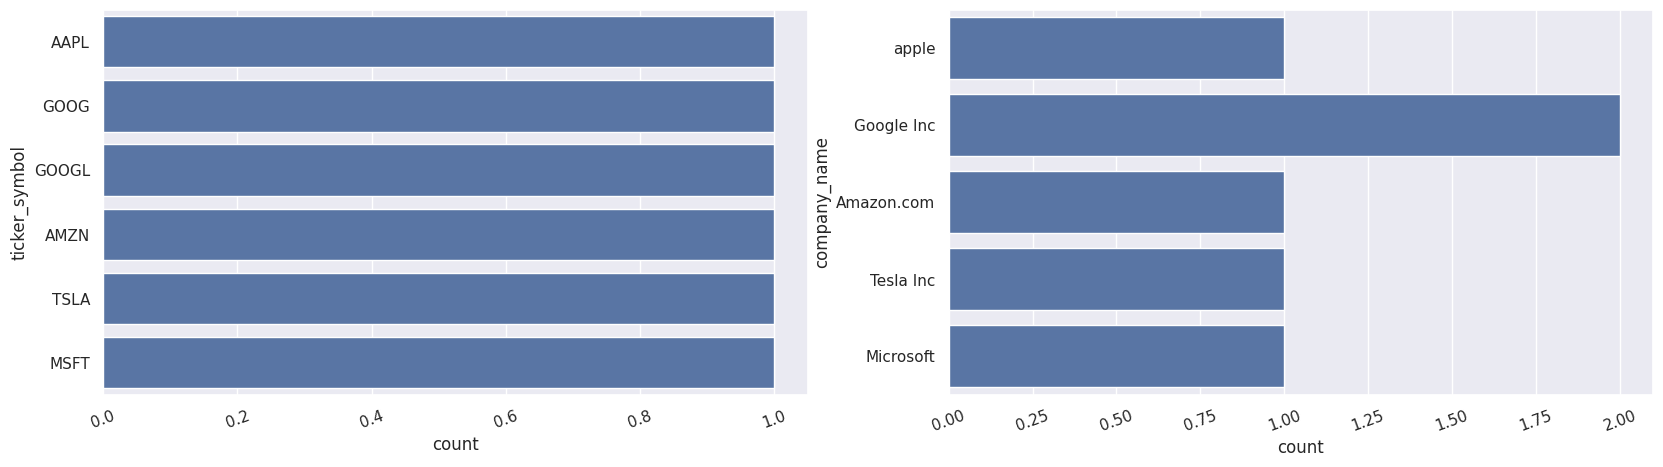

In [ ]:
univariate_analysis(company, company_categorial, row_num=1, col_num=2)

**Comments**: Company dataset have 5 companies. The google Inc have two ticket symbol which are GOOG and GOOGL.

#### Company tweet

In [ ]:
quick_analysis(company_tweet)
company_tweet

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
dtypes: int64(1), object(1)
memory usage: 66.2+ MB
None
-------------****----------------

Data Types:
tweet_id          int64
ticker_symbol    object
dtype: object
-------------****----------------

Rows and Columns:
(4336445, 2)
-------------****----------------

Column names:
Index(['tweet_id', 'ticker_symbol'], dtype='object')
-------------****----------------

Null Values:
tweet_id         0.0
ticker_symbol    0.0
dtype: float64
-------------****----------------

Unique values:
tweet_id         3717964
ticker_symbol          6
dtype: int64
-------------****----------------

Describes:
           tweet_id
count  4.336445e+06
mean   8.834282e+17
std    1.927735e+17
min    5.504415e+17
25%    7.185450e+17
50%    8.825934e+17
75%    1.054776e+18
max    1.212

tweet_id ticker_symbol
0         550803612197457920          AAPL
1         550803610825928706          AAPL
2         550803225113157632          AAPL
3         550802957370159104          AAPL
4         550802855129382912          AAPL
...                      ...           ...
4336440  1212158772015034369          TSLA
4336441  1212159099632267268          TSLA
4336442  1212159184931717120          TSLA
4336443  1212159838882533376          TSLA
4336444  1212160015332728833          TSLA

[4336445 rows x 2 columns]

There are **4336445** tweets from companies which two column tweet_id and ticket_symbol.

**Attributes:**
* **tweet_id**: Id of tweet post on Twitter
* **ticker_symbol**: Symbol of comapany which is same with stock symbol of that company.

#### Company values
This dataset is presented price of stock of the companies.

In [ ]:
quick_analysis(company_value)
company_value.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  17528 non-null  object 
 1   day_date       17528 non-null  object 
 2   close_value    17528 non-null  float64
 3   volume         17528 non-null  int64  
 4   open_value     17528 non-null  float64
 5   high_value     17528 non-null  float64
 6   low_value      17528 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 958.7+ KB
None
-------------****----------------

Data Types:
ticker_symbol     object
day_date          object
close_value      float64
volume             int64
open_value       float64
high_value       float64
low_value        float64
dtype: object
-------------****----------------

Rows and Columns:
(17528, 7)
-------------****----------------

Column names:
Index(['ticker_symbol', 'day_date', 'close_value', 'volume', 'open_

ticker_symbol    day_date  close_value    volume  open_value  high_value  \
0          AAPL  2020-05-29       317.94  38399530      319.25      321.15   
1          AAPL  2020-05-28       318.25  33449100      316.77      323.44   
2          AAPL  2020-05-27       318.11  28236270      316.14      318.71   
3          AAPL  2020-05-26       316.73  31380450      323.50      324.24   
4          AAPL  2020-05-22       318.89  20450750      315.77      319.23   

   low_value  
0     316.47  
1     315.63  
2     313.09  
3     316.50  
4     315.35

**Attributes:**
- **ticker_symbol**:
- **day_date**:
- **close_value**:

In [ ]:
company_value_categorial, company_value_numerical = get_eda_features(company_value)

[dtype('int64'), dtype('float64'), dtype('O')]
Datashape of Object Dataframe: (17528, 2)
Datashape of Integer Dataframe: (17528, 1)


In [ ]:
company_value_categorial

Index(['ticker_symbol', 'day_date'], dtype='object')

The "day_date" colume is not the categorial type. It is a datetime type. We will convert to datetime type later, but we will drop "day_date" colume for now to visulize data first.

In [ ]:
company_value_categorial = company_value_categorial.drop("day_date")

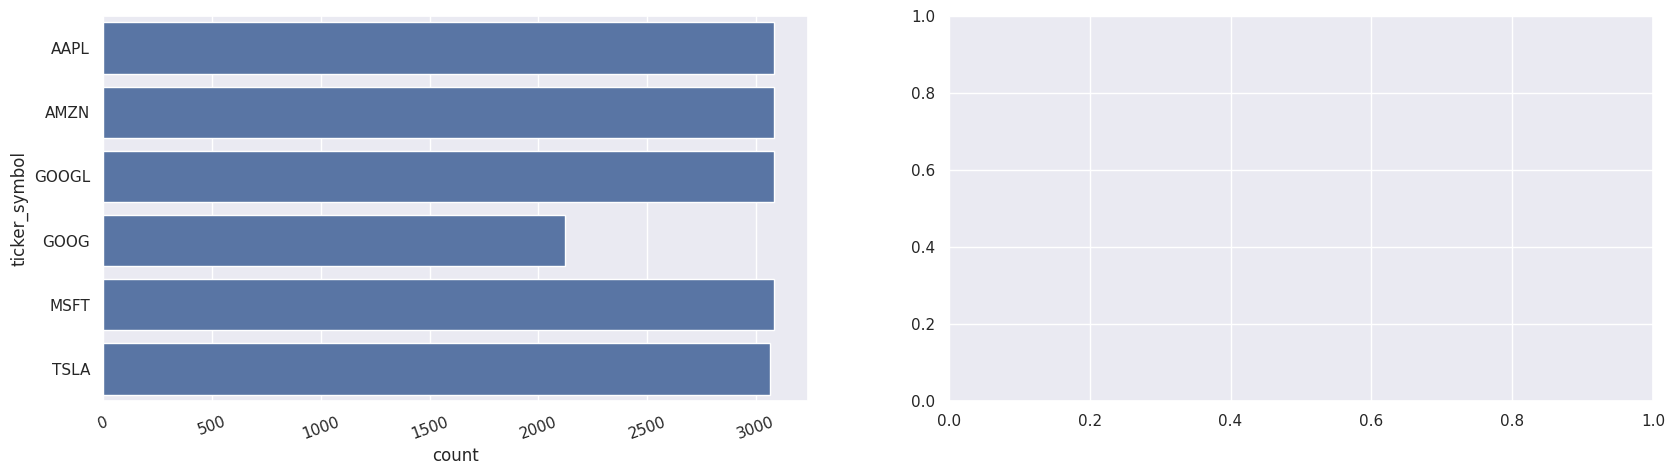

In [ ]:
univariate_analysis(company_value, company_value_categorial, row_num=1, col_num=2)

In [ ]:
company_value_numerical

Index(['volume'], dtype='object')

We just have a "volume" column which is numberial type.

count    1.752800e+04
mean     2.025441e+07
std      3.322733e+07
min      7.932000e+03
25%      2.075086e+06
50%      4.835618e+06
75%      2.704358e+07
max      4.624423e+08
Name: volume, dtype: float64


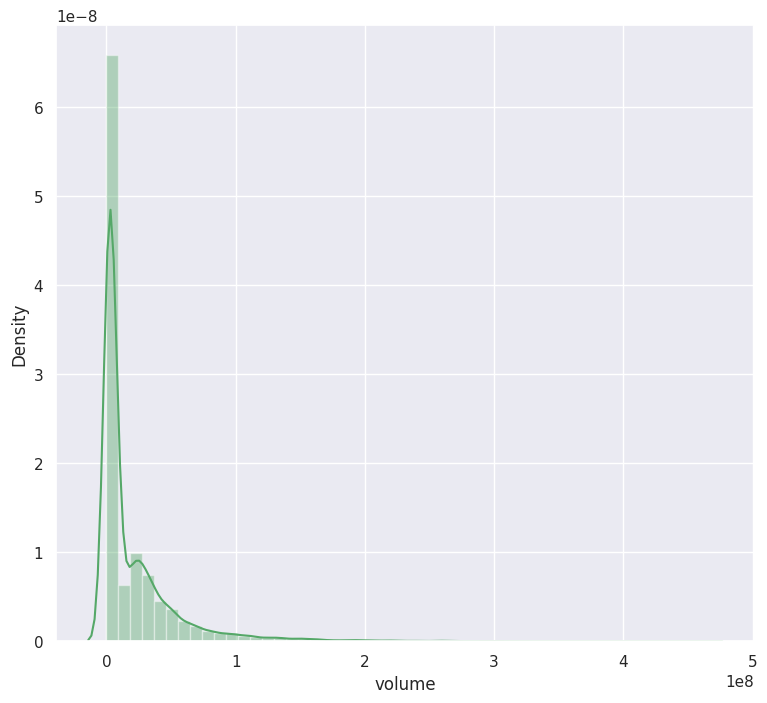

In [ ]:
column_distplot(company_value, "volume")

With the above chart, we can see that the volume are skewed right and some outliers lies above ~ $2*10^8$.

#### Tweet dataset

In [ ]:
# For get small data to testing
# tweet = tweet[:10000]

In [ ]:
quick_analysis(tweet)
tweet.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 198.6+ MB
None
-------------****----------------

Data Types:
tweet_id        int64
writer         object
post_date       int64
body           object
comment_num     int64
retweet_num     int64
like_num        int64
dtype: object
-------------****----------------

Rows and Columns:
(3717964, 7)
-------------****----------------

Column names:
Index(['tweet_id', 'writer', 'post_date', 'body', 'comment_num', 'retweet_num',
       'like_num'],
      dtype='object')
-------------****----------------

Null Values:
tweet_id       0.000000
writer         0.012715
post_date      0.000000
body           0.000000

tweet_id           writer   post_date  \
0  550441509175443456  VisualStockRSRC  1420070457   
1  550441672312512512      KeralaGuy77  1420070496   
2  550441732014223360      DozenStocks  1420070510   
3  550442977802207232     ShowDreamCar  1420070807   
4  550443807834402816     i_Know_First  1420071005   

                                                body  comment_num  \
0  lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1  Insanity of today weirdo massive selling. $aap...            0   
2  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4  Swing Trading: Up To 8.91% Return In 14 Days h...            0   

   retweet_num  like_num  
0            0         1  
1            0         0  
2            0         0  
3            0         1  
4            0         1

**Attributes**
- **id**:

We have "tweet_id" column in **tweet** dataset which is mapped to "tweet_id" in **company_tweet** dataset

In [ ]:
tweet_categorial, tweet_numerical = get_eda_features(tweet)

[dtype('int64'), dtype('O')]
Datashape of Object Dataframe: (3717964, 2)
Datashape of Integer Dataframe: (3717964, 5)


In [ ]:
tweet_categorial

Index(['writer', 'body'], dtype='object')

We do not visualize the overview of "writer" and "body" columns likes above due to they are not necessary.

But there are two information which need to know here. That are:
- How many writers tweet their posts?
- What is the average length of the sentences in each post?

In [ ]:
tweet['writer'].describe()

count     3670691
unique     140131
top       App_sw_
freq        91741
Name: writer, dtype: object

We have **X** author with total post is **Y** posts.

In [ ]:
tweet['body'].str.split().str.len()

0          17
1          20
2          21
3          13
4          16
           ..
3717959    53
3717960    40
3717961    10
3717962     9
3717963    17
Name: body, Length: 3717964, dtype: int64

In [ ]:
body_len = tweet['body'].str.split().str.len()
body_len.describe()

count    3.717964e+06
mean     1.758108e+01
std      9.618676e+00
min      1.000000e+00
25%      1.200000e+01
50%      1.500000e+01
75%      2.100000e+01
max      6.800000e+01
Name: body, dtype: float64

<Axes: >

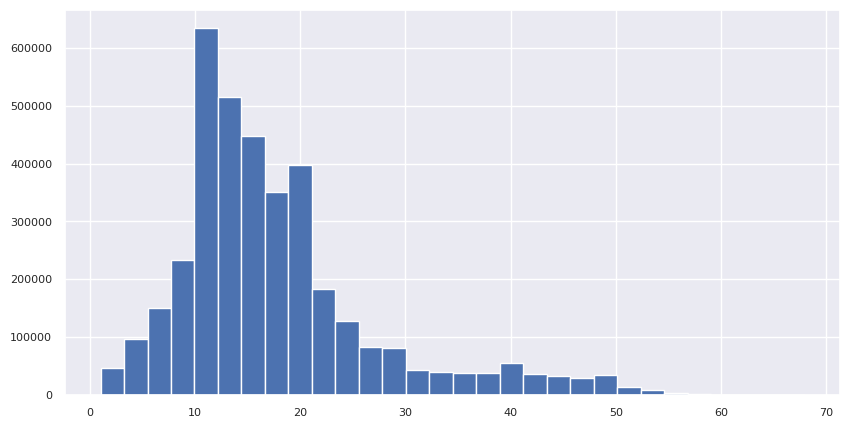

In [ ]:
body_len.hist(figsize=(10, 5), bins=30, xlabelsize=8, ylabelsize=8)

So the average length of the sentences is **X** words.

Next we will explore the numberial type column of dataset.

In [ ]:
tweet_numerical

Index(['tweet_id', 'post_date', 'comment_num', 'retweet_num', 'like_num'], dtype='object')

We will ignore "tweet_id", "post_date" columns.

In [ ]:
tweet_numerical = tweet_numerical.drop(['tweet_id'])

tweet_numerical

Index(['post_date', 'comment_num', 'retweet_num', 'like_num'], dtype='object')

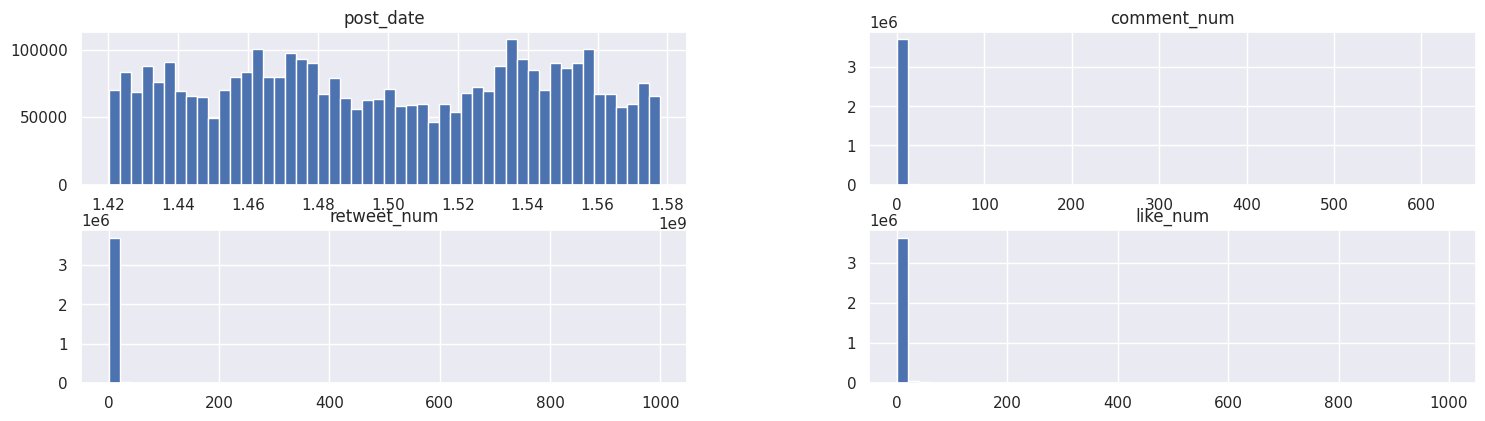

In [ ]:
univariate_analysis_on_numerial(tweet, tweet_numerical)

**Comments**

# Preprocessing

**Describtion:**


### Data Manipulation in the Dataset
We will keep two dataset which are **company_value** and **tweet** dataframe. And we will merge **company_tweet** and **tweet** dataframe via *tweet_id* to new dataframe which is **tweet_df** dataframe.


#### Tweet dataset

In [ ]:
tweet_df = pd.merge(company_tweet , tweet , on="tweet_id", how= "inner")
tweet_df.head(5)

tweet_id ticker_symbol         writer   post_date  \
0  550803612197457920          AAPL     SentiQuant  1420156789   
1  550803610825928706          AAPL     SentiQuant  1420156788   
2  550803225113157632          AAPL    MacHashNews  1420156696   
3  550802957370159104          AAPL  WaltLightShed  1420156633   
4  550802855129382912          AAPL   2waystrading  1420156608   

                                                body  comment_num  \
0  #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...            0   
1  #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   
2  Rumor Roundup: What to expect when you're expe...            0   
3  An $AAPL store line in Sapporo Japan for the "...            2   
4  $AAPL - Will $AAPL Give Second entry opportuni...            0   

   retweet_num  like_num  
0            0         1  
1            0         1  
2            0         0  
3            4         4  
4            0         0

In [ ]:
company_value.head(5)

ticker_symbol    day_date  close_value    volume  open_value  high_value  \
0          AAPL  2020-05-29       317.94  38399530      319.25      321.15   
1          AAPL  2020-05-28       318.25  33449100      316.77      323.44   
2          AAPL  2020-05-27       318.11  28236270      316.14      318.71   
3          AAPL  2020-05-26       316.73  31380450      323.50      324.24   
4          AAPL  2020-05-22       318.89  20450750      315.77      319.23   

   low_value  
0     316.47  
1     315.63  
2     313.09  
3     316.50  
4     315.35

With **company_value** and **tweet_df** dataframe, we will join them by "ticker_symbol" column with "post_date" in **tweet_df** and "day_date" in **company_value** correspondingly when analyzing.

**Total engangement**

We suppose that total of comment number, retweet number, and like number shows the impact of that tweet on the community. Because only influential articles can affect the stock price of that company.

So we will add all total of comment, number, and like to a new column which has a new name **total_engangement**.

In [ ]:
tweet_df["total_engangement"] = tweet_df["comment_num"] + tweet_df["retweet_num"] + tweet_df["like_num"]

We will plot the histogram of total engagement on tweets and filter the low-impact tweet.

count    4.336445e+06
mean     3.030775e+00
std      1.901432e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.703000e+03
Name: total_engangement, dtype: float64


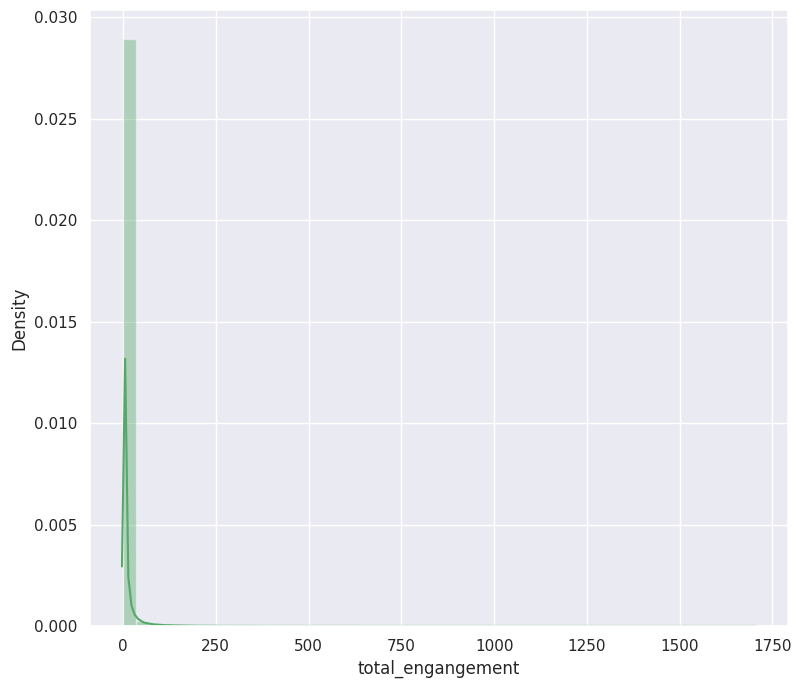

In [ ]:
column_distplot(tweet_df, column_name="total_engangement")

To obtain high-impact tweets, we will drop rows which has a value less than **engangement_threshold** count.

**engagement_threshold** is a heuristic parameter that we chose.

In [ ]:
engagement_threshold = 40

In [ ]:
tweet_df = tweet_df[tweet_df["total_engangement"] > engagement_threshold]

**Day date**

Converting "post_date" in *tweet_df* and "day_date" in *company_value* to datetime type

In [ ]:
tweet_df['post_date'] = pd.to_datetime(tweet_df['post_date'], unit='s')

Because we just care about day of post then compare with stock data in day. So we will get create new columne which names "day_date".

In [ ]:
tweet_df['day_date'] = pd.to_datetime(tweet_df['post_date'].apply(lambda date: date.date()))

In [ ]:
tweet_df = tweet_df.sort_values(by="day_date")

#### Company value dataset

In [ ]:
stock_df = company_value

stock_df['day_date']  = pd.to_datetime(stock_df['day_date'])

stock_df.sample(5)

ticker_symbol   day_date  close_value    volume  open_value  high_value  \
3265           AMZN 2019-09-11    1822.9900   2432767   1812.1400     1833.42   
8600          GOOGL 2010-10-01     265.5143   2224114    267.7268      268.04   
768            AAPL 2017-05-10     153.2600  25779060    153.6300      153.94   
13301          MSFT 2012-10-04      30.0300  43625820     29.9700       30.03   
3258           AMZN 2019-09-20    1794.1600   5555839   1821.7100     1830.63   

       low_value  
3265   1809.0800  
8600    264.1908  
768     152.1100  
13301    29.5700  
3258   1780.9200

We only keep the value of company_value if it is greater than start_day and less than end_day of tweet_df

In [ ]:
start_day = min(tweet_df['day_date'])
print(f"Start day: {start_day}")

end_day = max(tweet_df['day_date'])
print(f"End day: {end_day}")

Start day: 2015-01-01 00:00:00
End day: 2019-12-31 00:00:00


In [ ]:
stock_df = stock_df[(stock_df['day_date'] >= start_day) & (stock_df['day_date'] <= end_day)]

stock_df needs to sort by "day_date"

In [ ]:
stock_df = stock_df.sort_values(by="day_date")

### Data cleaning

- We will drop some column which are "post_date", "tweet_id", "comment_num", "retweet_num", and "like_num". Because we do not use it anymore.

In [ ]:
tweet_df = tweet_df.drop(['tweet_id', 'post_date', 'comment_num', 'retweet_num', 'like_num'], axis=1)

Dataset after cleaning like this:

In [ ]:
print(tweet_df.info())
print()
tweet_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 54440 entries, 35 to 4336396
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ticker_symbol      54440 non-null  object        
 1   writer             53902 non-null  object        
 2   body               54440 non-null  object        
 3   total_engangement  54440 non-null  int64         
 4   day_date           54440 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.5+ MB
None



ticker_symbol          writer  \
3731269          TSLA     ElonBachman   
4230268          TSLA   HyperChangeTV   
3761237          TSLA    orthereaboot   
4078121          TSLA    orthereaboot   
3751799          TSLA  RampCapitalLLC   

                                                      body  total_engangement  \
3731269  Using AutoPilot while I watch a thriller in my...                 43   
4230268  Tesla's new Gigafactory is poised to begin pro...                336   
3761237  Lovely exposition of $TSLA accounting gimmicks...                 45   
4078121  . @tesla is a bad faith actor, example 2.7mm. ...                 57   
3751799  $TSLA can sell pretty much everything except M...                183   

          day_date  
3731269 2018-07-10  
4230268 2019-09-08  
3761237 2018-08-03  
4078121 2019-04-16  
3751799 2018-07-30

In [ ]:
print(stock_df.info())
print()
stock_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 10956 entries, 2517 to 103
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ticker_symbol  10956 non-null  object        
 1   day_date       10956 non-null  datetime64[ns]
 2   close_value    10956 non-null  float64       
 3   volume         10956 non-null  int64         
 4   open_value     10956 non-null  float64       
 5   high_value     10956 non-null  float64       
 6   low_value      10956 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 684.8+ KB
None



ticker_symbol   day_date  close_value    volume  open_value  high_value  \
11671          MSFT 2019-04-01       119.02  19885780      118.95    119.1085   
11526          MSFT 2019-10-25       140.73  25959720      139.34    141.1400   
14423          MSFT 2019-08-25       133.39  38515390      137.19    138.3500   
11111          GOOG 2017-08-27       915.89   1052764      923.49    925.5550   
3349           AMZN 2019-05-13      1822.68   5783410     1836.56   1846.5350   

       low_value  
11671      118.1  
11526      139.2  
14423      132.8  
11111      915.5  
3349      1818.0

#### Text preprocessing for Body tweet in tweet_df

There are many text preprocessing which is produced data input for next step such likes Machine learning task.
* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming
* Lemmatization

But in this project, we only use the lowercase processing. Because we will use Affin algorithm which has text processing itself and use the whole sentences to gain sentiment score.

In [ ]:
import nltk
# from nltk.corpus import twitter_samples
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from nltk.tokenize import TweetTokenizer

import random
import re
import string

# nltk.download('stopwords')

In [ ]:
tweets = tweet_df["body"]
tweets

35         This is Wall Street's top pick in 2015. Hint: ...
39         See how tech companies like Apple, Twitter and...
186        Top Stock Analyst Releases Report on Top Stock...
187        Analyst Report on Top Stock Market Options for...
2145154    Jeff Bezos lost $7.4 billion in Amazon's worst...
                                 ...                        
4335534    Not some conspiracy theory, btw. @PlainSite pu...
4335518    Tesla China-Made Model 3 has reached over 1,50...
4335498    Repeat after me: $TSLA is the only company in ...
4335460    ‘Save Clips on Honk’ function records a flying...
4336396    $TSLA Interesting...$93M trade after hours!Whe...
Name: body, Length: 54440, dtype: object

##### Remove hyperlinks, Twitter marks and styles


In [ ]:
def remove_special_character(tweet):
#     print(tweet)
    # remove the old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags. only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # remove single numeric terms in the tweet.
    tweet = re.sub(r'[0-9]', '', tweet)

    return tweet

In [ ]:
tweet_df["tweet"] = tweet_df["body"].apply(lambda tweet: remove_special_character(tweet))

##### Convert to lowercase
We will also convert all words to lowercase.

In [ ]:
tweet_df["tweet"] = tweet_df["tweet"].str.lower()

In [ ]:
tweet_df[["body", "tweet"]].sample(10)

body  \
3676589  $TSLA latest #Supercharger in Germany. It´s no...   
3883642  Those jobs are a lot safer with a ch.11 vs ch....   
4247863  Why do DeepScale's autonomy solutions include ...   
3890327  #Tesla quietly applied for a special FCC licen...   
3898155  *VERTICAL'S JOHNSON: SOME ACCOUNTING 'SHENANIG...   
4276174           What the hell is a "cash delivery"?$TSLA   
2104852  Implied moves for earnings next week(1158 comp...   
4225157  $TSLA - “I’m requesting the State Comptroller ...   
1880911  .@google's European influence:- Triple lobbyin...   
3928433  $GM layoff will cost $1B in 2018/19. @mtbarra ...   

                                                     tweet  
3676589  $tsla latest supercharger in germany. it´s not...  
3883642  those jobs are a lot safer with a ch. vs ch. b...  
4247863  why do deepscale's autonomy solutions include ...  
3890327  tesla quietly applied for a special fcc licens...  
3898155  *vertical's johnson: some accounting 'shenanig...  
4276174           what the hell is a "cash delivery"?$tsla  
2104852  implied moves for earnings next week( companie...  
4225157  $tsla - “i’m requesting the state comptroller ...  
1880911  .@google's european influence:- triple lobbyin...  
3928433  $gm layoff will cost $b in /. @mtbarra will, a...

---------------------

# Model Building
* Choosing model
* Training model
* Evaluating result

## Afinn
Afinn is the simplest yet popular lexicons used for sentiment analysis developed by Finn Årup Nielsen. It contains 3300+ words with a polarity score associated with each word. In python, there is an in-built function for this lexicon.

In [ ]:
!pip install afinn

In [ ]:
from afinn import Afinn
afinn = Afinn()

In [ ]:
tweet_df['afinn_score'] = tweet_df['tweet'].apply(lambda tweet: afinn.score(tweet))
tweet_df['afinn_score'].sample(5)

4206932     0.0
4091986    -4.0
2374415     0.0
4335707    -6.0
4187920   -13.0
Name: afinn_score, dtype: float64

### Vader Sentiment

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically designed to analyze social media text and other short-form, informal language.

🔍 Key Features of VADER:
Lexicon-based:
It uses a dictionary of words where each word is mapped to a valence score representing its emotional intensity (positive or negative).

Rule-based modifiers:
VADER handles:

Negations: "not good"

Intensifiers: "very happy"

Punctuation emphasis: "GREAT!!!"

Capitalization: "AMAZING"

Emoji and slang aware:
It recognizes some emojis, emoticons, and internet slang (like "lol", "rofl", etc.).

Pre-trained and ready-to-use:
No model training needed.

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vanderSentimentAnalyzer = SentimentIntensityAnalyzer()

In [ ]:
def getVanderScore(tweet):
    vs = vanderSentimentAnalyzer.polarity_scores(tweet)
    score = vs['compound']
    return score

def getVanderSentiment(score):
    if (score >= 0.05):
        return "Positive"

    elif (score < 0.05 and score > -0.05):
        return "Neutral"

    elif (score <= -0.05):
        return "Negative"

    return score

In [ ]:
tweet_df['vander_score'] = tweet_df['body'].apply(lambda tweet: getVanderScore(tweet))
tweet_df['vander_sentiment'] = tweet_df['vander_score'].apply(lambda score: getVanderSentiment(score))
tweet_df[['ticker_symbol', 'day_date', 'vander_score', 'vander_sentiment']].sample(10)

ticker_symbol   day_date  vander_score vander_sentiment
4070579          TSLA 2019-04-10        0.5411         Positive
4198672          TSLA 2019-07-29        0.3182         Positive
4050829          TSLA 2019-03-25       -0.2247         Negative
3986179          TSLA 2019-01-30       -0.6072         Negative
2562218          AMZN 2018-01-16       -0.2805         Negative
1347124          AAPL 2019-07-31        0.7577         Positive
3105315          MSFT 2017-10-23        0.0000          Neutral
4090748          TSLA 2019-04-24        0.0000          Neutral
1171854          AAPL 2018-11-12        0.0000          Neutral
163861           AAPL 2015-05-21        0.4215         Positive

# Data analysis
- Visualize results (Chart, graph)
- Correlation Matrix : With respect to Depedent variable
- Analysis results

#### Afinn algorithm

Sentiment score of apple company


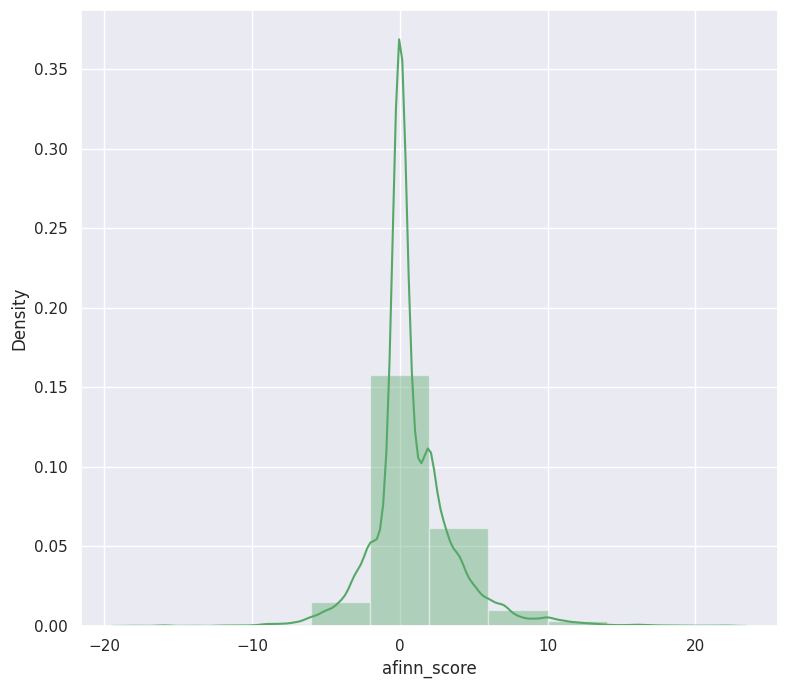

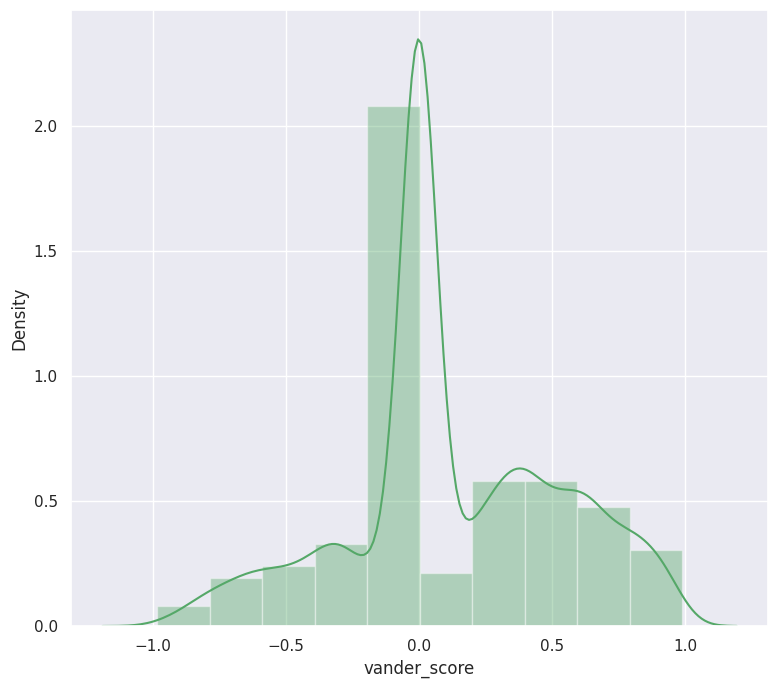



--------------


Sentiment score of Amazon.com company


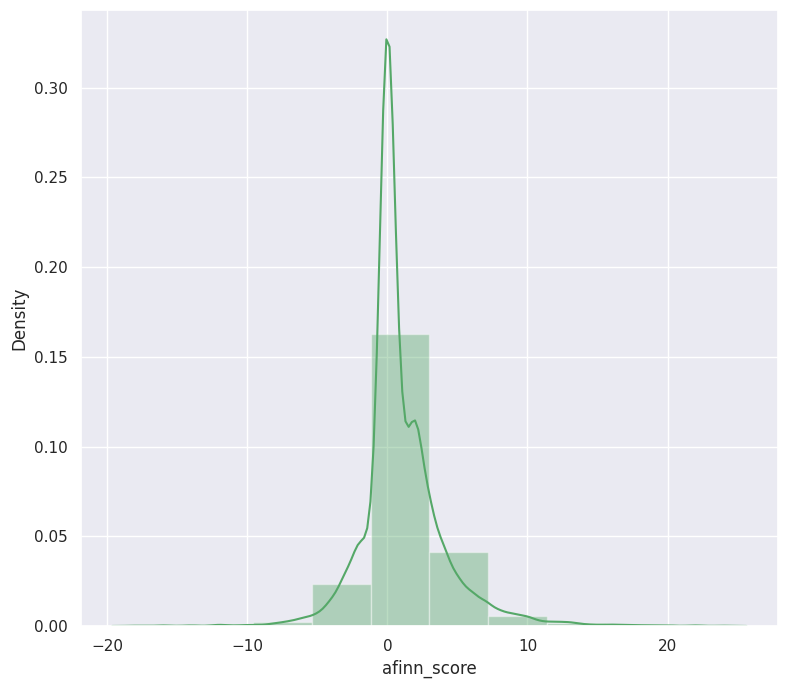

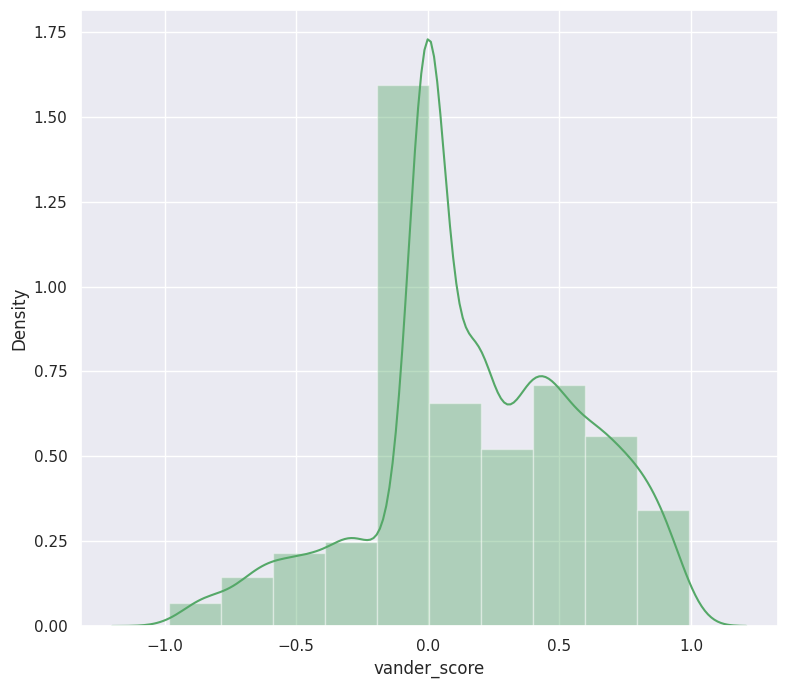



--------------


Sentiment score of Google Inc company


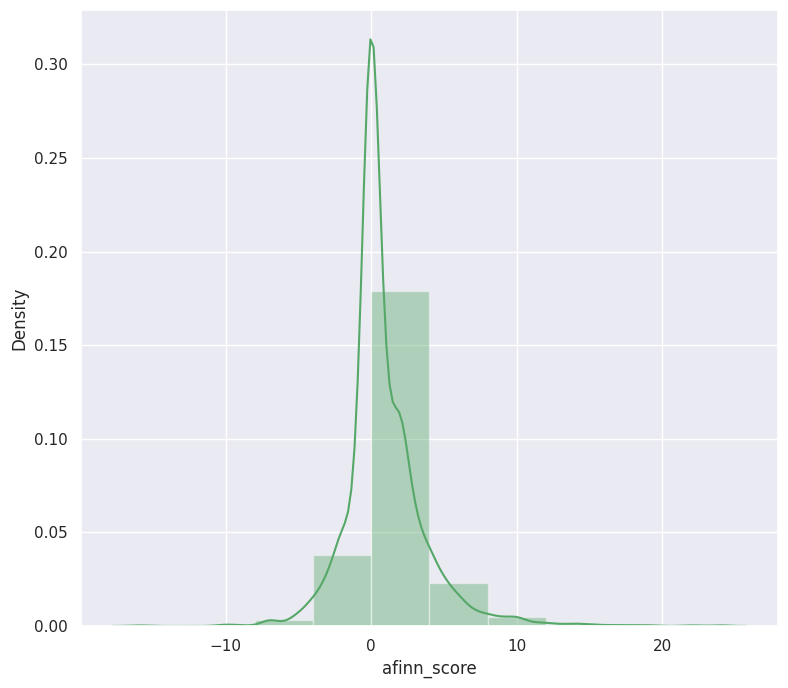

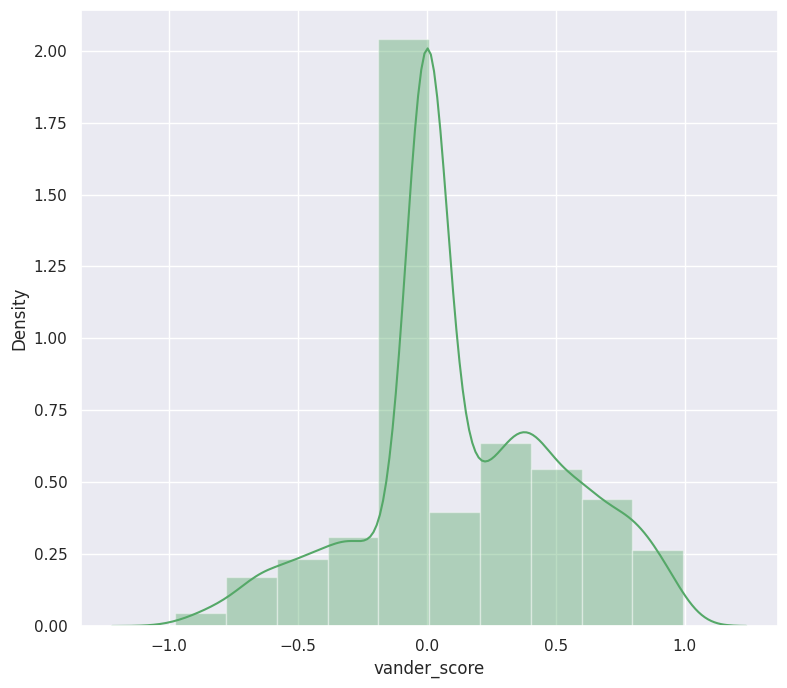



--------------


Sentiment score of Google Inc company


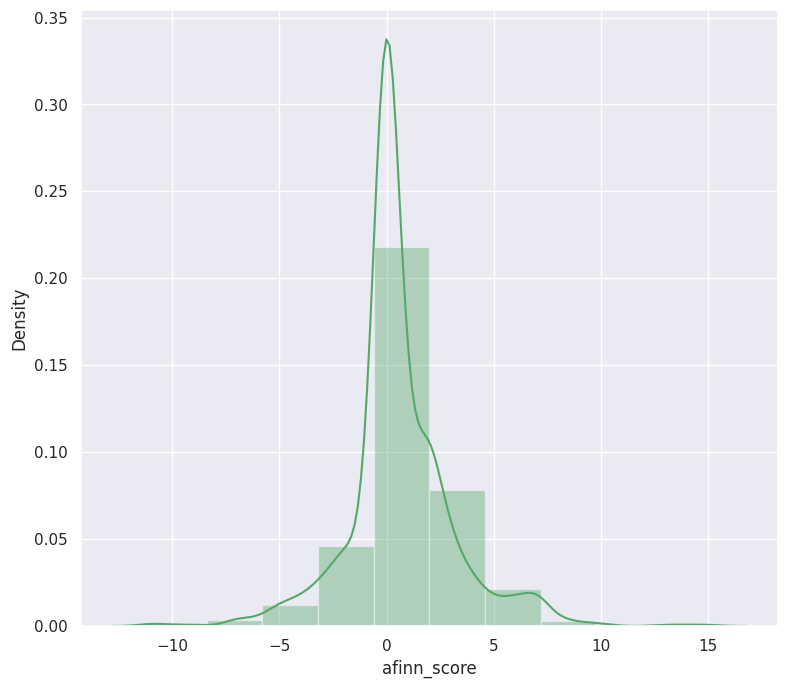

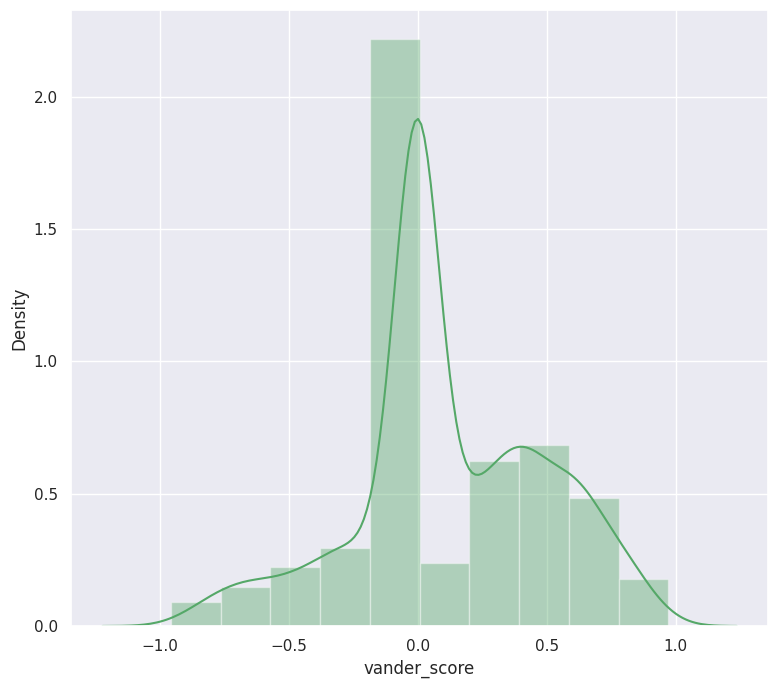



--------------


Sentiment score of Microsoft company


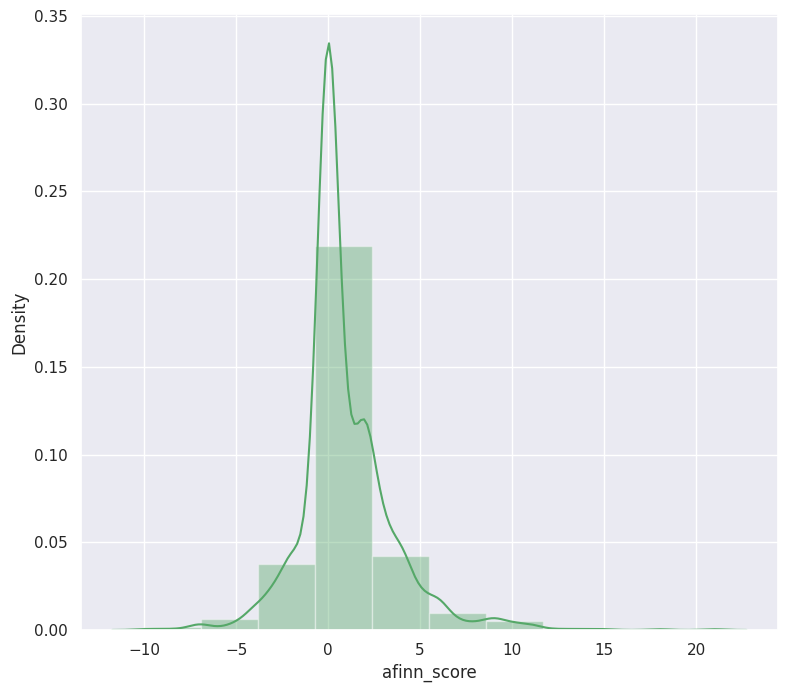

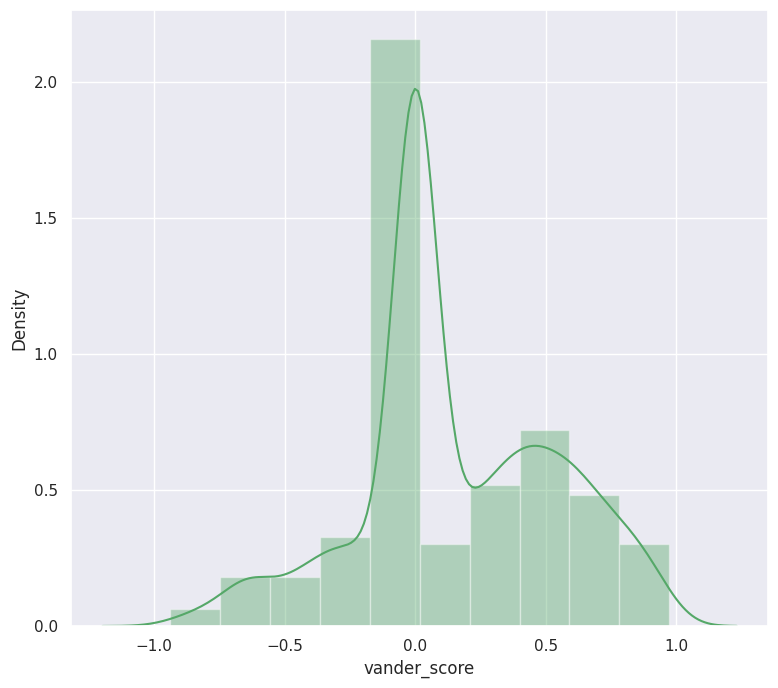



--------------


Sentiment score of Tesla Inc company


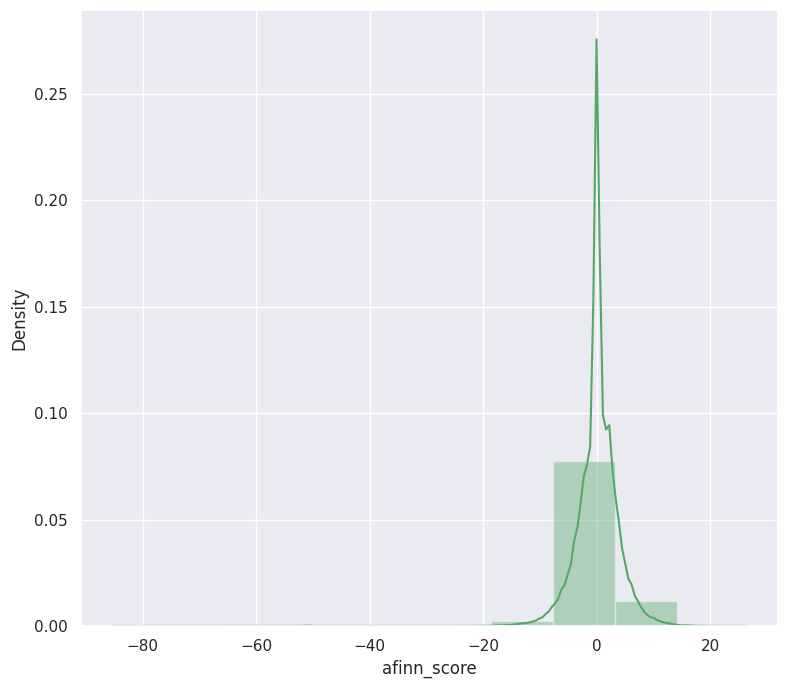

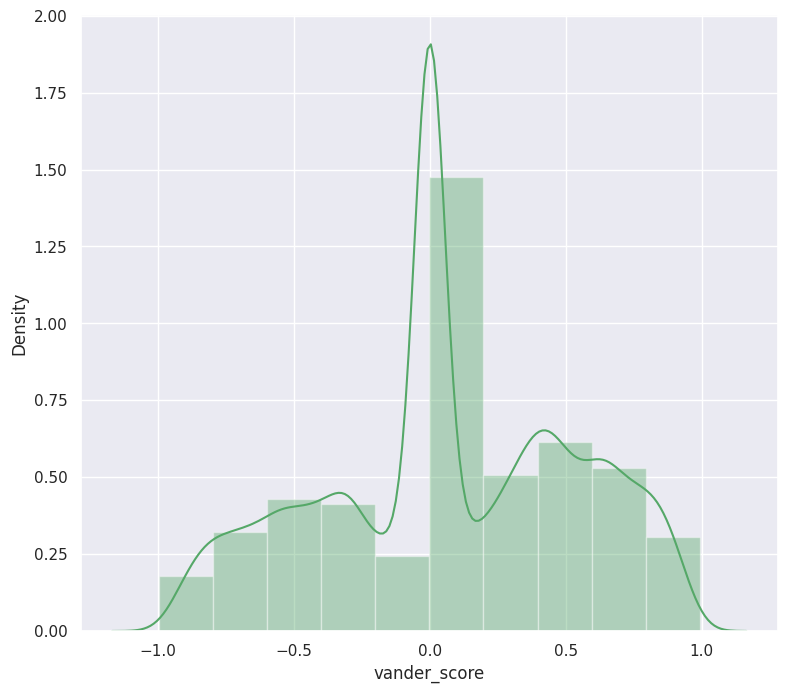



--------------




In [ ]:
import time

for ticker_symbol in tweet_df["ticker_symbol"].unique():

    company_name = company[company["ticker_symbol"] == ticker_symbol]["company_name"].iloc[0]
    print(f"Sentiment score of {company_name} company")
    sub_tweet_df = tweet_df[tweet_df["ticker_symbol"] == ticker_symbol]

    column_distplot(sub_tweet_df, column_name="afinn_score", bins=10, describe=False)
    column_distplot(sub_tweet_df, column_name="vander_score", bins=10, describe=False)
    plt.show()
    print("\n\n--------------\n\n")


**Sentiment overtime function**

This function will plot sentiment score with stock price of a company. It can bring some insight information from chart.

In [ ]:
def sentiment_overtime(tweet_df, stock_df, title, score_column_name="score"):
    print("\n\n")
    fig = plt.figure(figsize=(24,10))
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()

#     ax1.plot(tweet_df['day_date'], tweet_df[score_column_name], label='Tweets Sentiment')
    ax1.vlines(tweet_df['day_date'], 0, tweet_df[score_column_name])
    ax1.axhline(y=0, color='r', linestyle='-')


    ax2.plot(stock_df['day_date'], stock_df['close_value'], color='orange', label='Stock price')
    ax2.set_title("Effects of " + title +" tweets to stock price")
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()

    ax1.set_xlabel('Day date')
    ax1.set_ylabel('Sentiment Afinn score', color="blue")

    ax2.legend(lines + lines2, labels + labels2, loc=0)

#     center_y = max(stock_df['close_value']) - min(stock_df['close_value']) / 2
#     print(center_y)

    plt.show()

In [ ]:
ticker_symbols =  tweet_df["ticker_symbol"].unique()

In [ ]:
def draw_stock_price_with_sentiment(tweet_df, stock_df, start_day, end_day, score_name="score"):
    for ticker_symbol in ticker_symbols:
        print(f"Ticker symbol: {ticker_symbol}")

        sub_company = company[company["ticker_symbol"] == ticker_symbol]["company_name"]
        if len(sub_company) != 1:
            continue

        company_name = sub_company.iloc[0]
    #     print(company_name)

        print(f"Stock price of {company_name} company with ticker symbol is {ticker_symbol}")

        sub_tweet_df = tweet_df[tweet_df["ticker_symbol"] == ticker_symbol]
        sub_tweet_df = sub_tweet_df[(sub_tweet_df["day_date"]>=pd.to_datetime(start_day)) & (sub_tweet_df["day_date"]<=pd.to_datetime(end_day))]
    #     print(sub_tweet_df[:5])
        sub_stock_df = stock_df[stock_df["ticker_symbol"] == ticker_symbol]
        sub_stock_df = sub_stock_df[(sub_stock_df["day_date"]>=pd.to_datetime(start_day)) & (sub_stock_df["day_date"]<=pd.to_datetime(end_day))]

    #     print(sub_stock_df[:5])
        sentiment_overtime(sub_tweet_df, sub_stock_df, company_name, score_column_name=score_name)

Ticker symbol: AAPL
Stock price of apple company with ticker symbol is AAPL





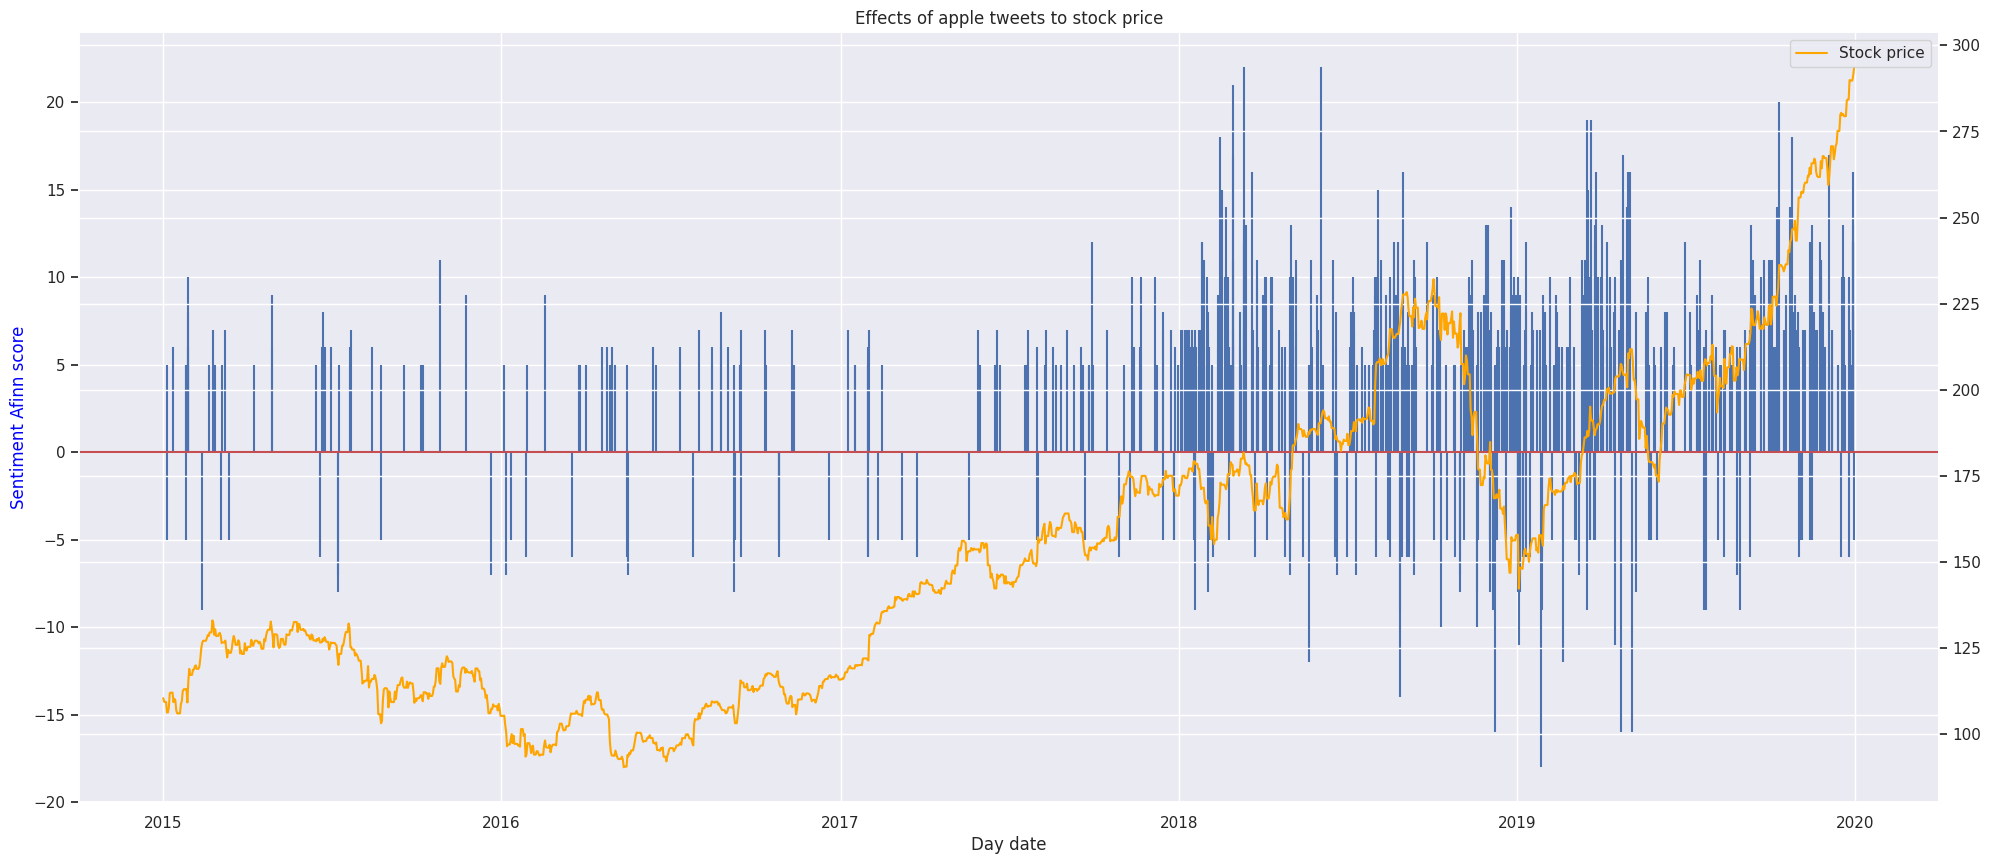

Ticker symbol: AMZN
Stock price of Amazon.com company with ticker symbol is AMZN





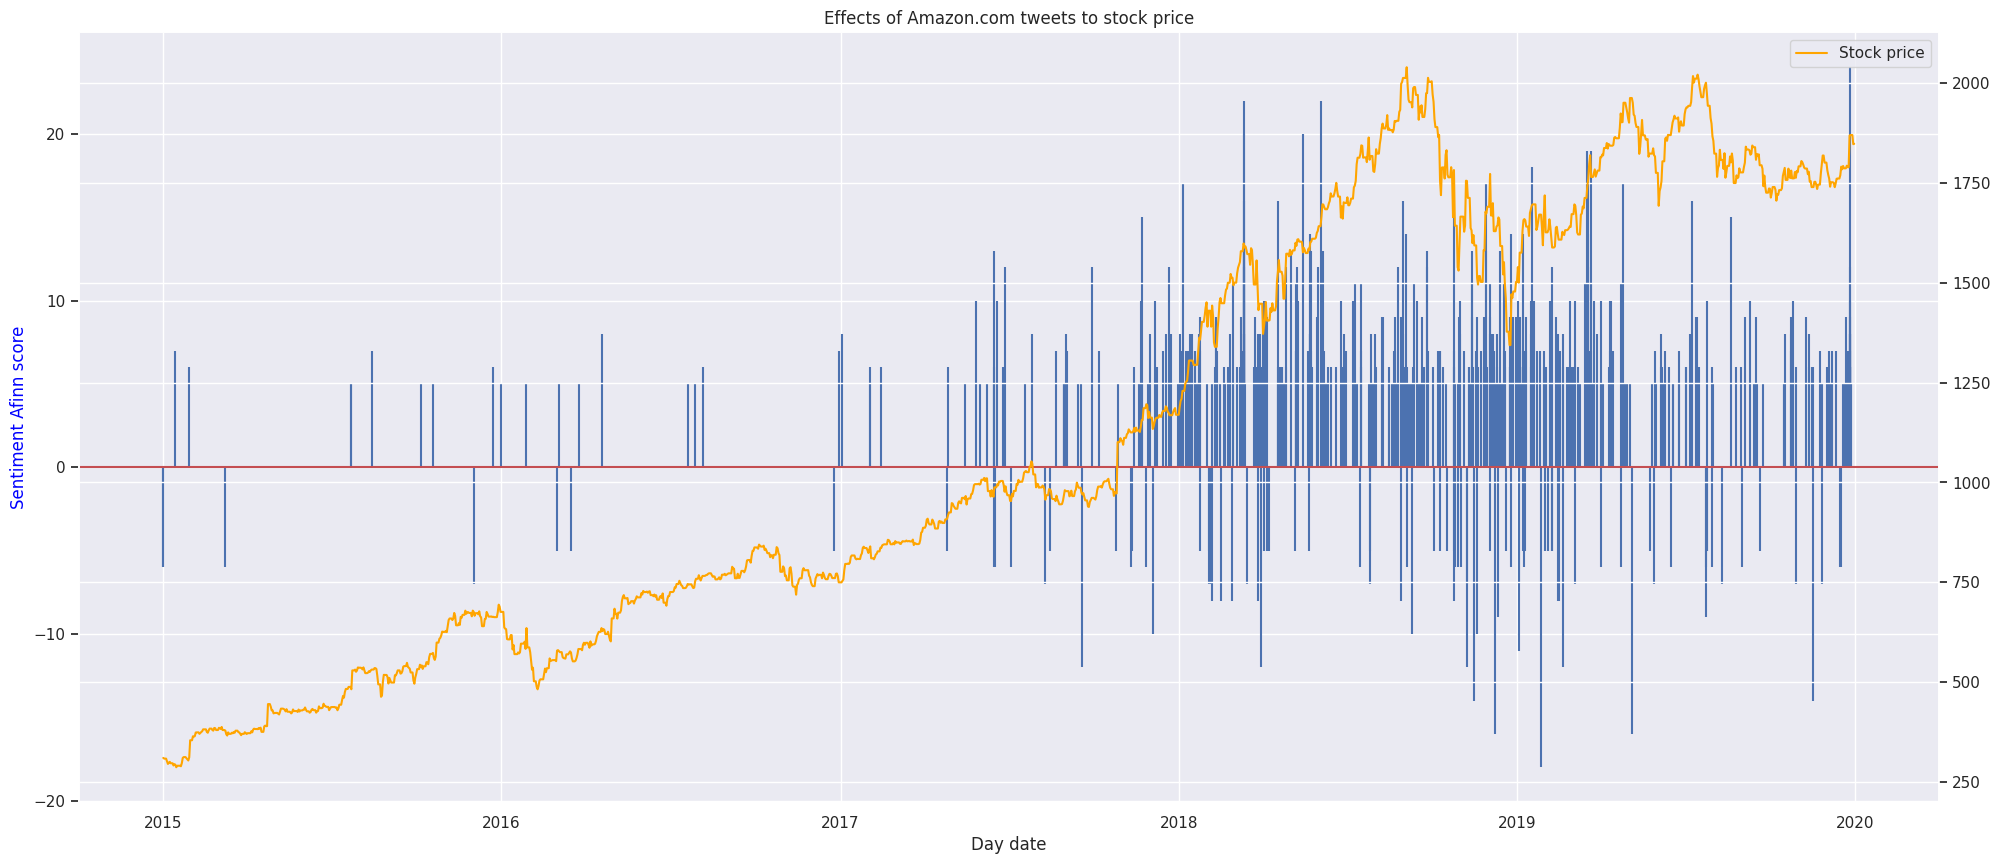

Ticker symbol: GOOGL
Stock price of Google Inc company with ticker symbol is GOOGL





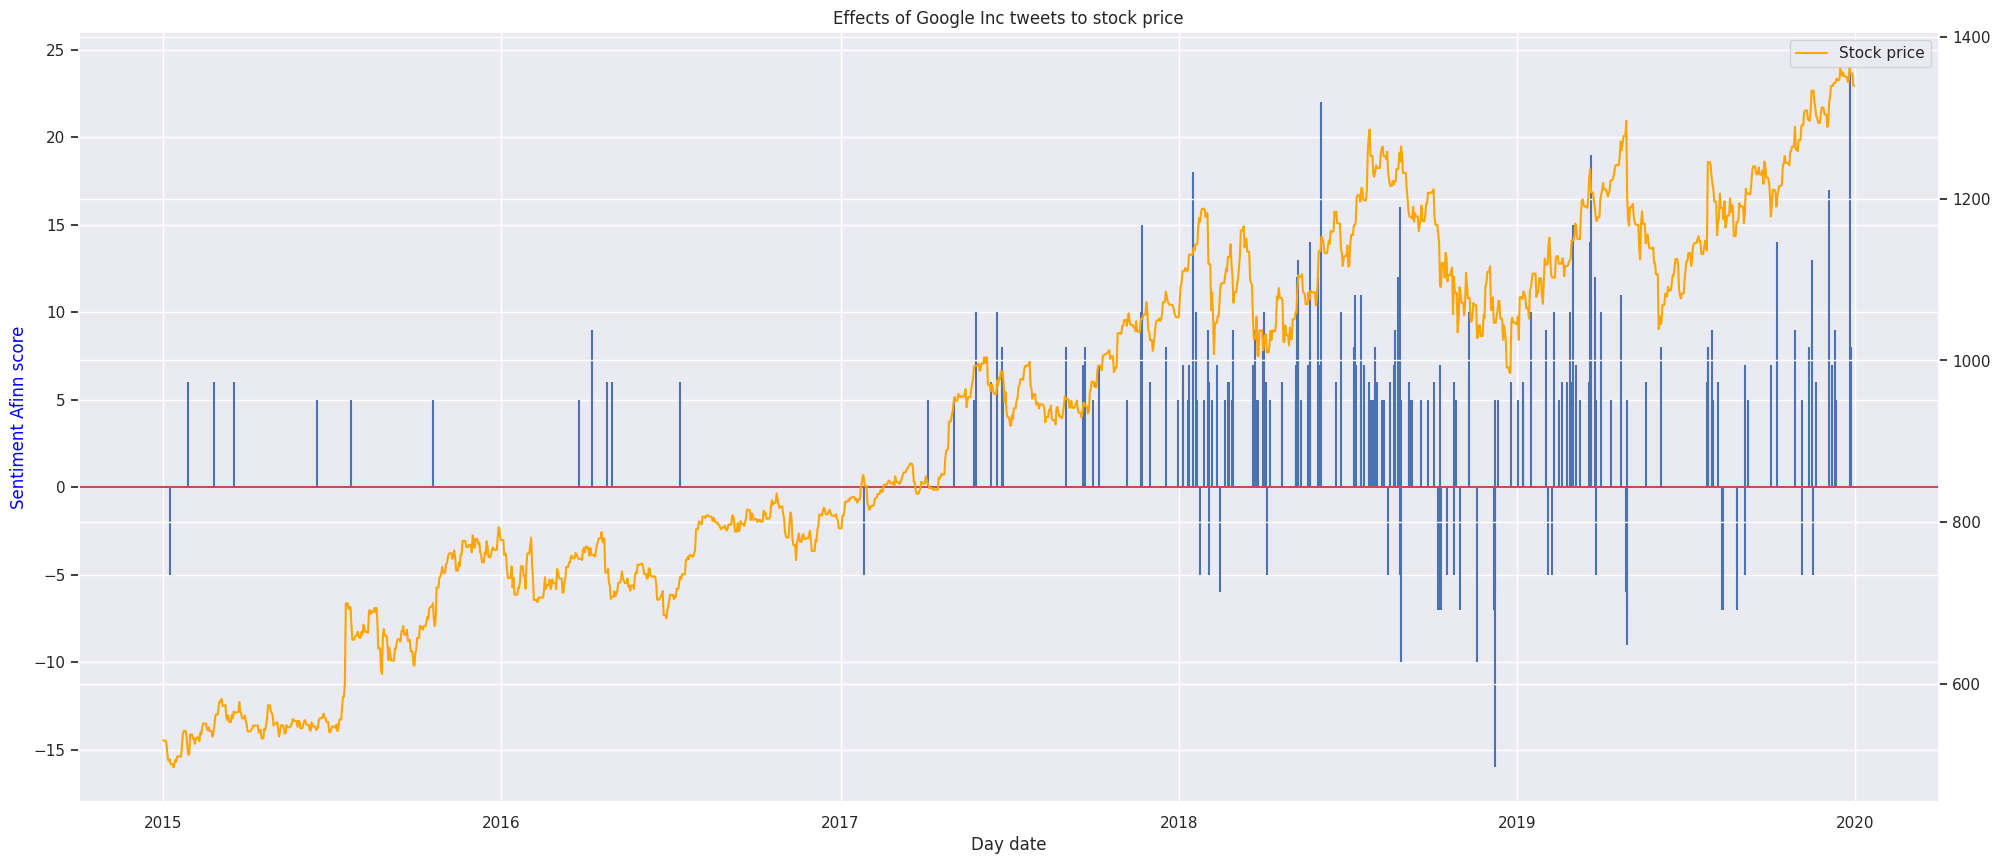

Ticker symbol: GOOG
Stock price of Google Inc company with ticker symbol is GOOG





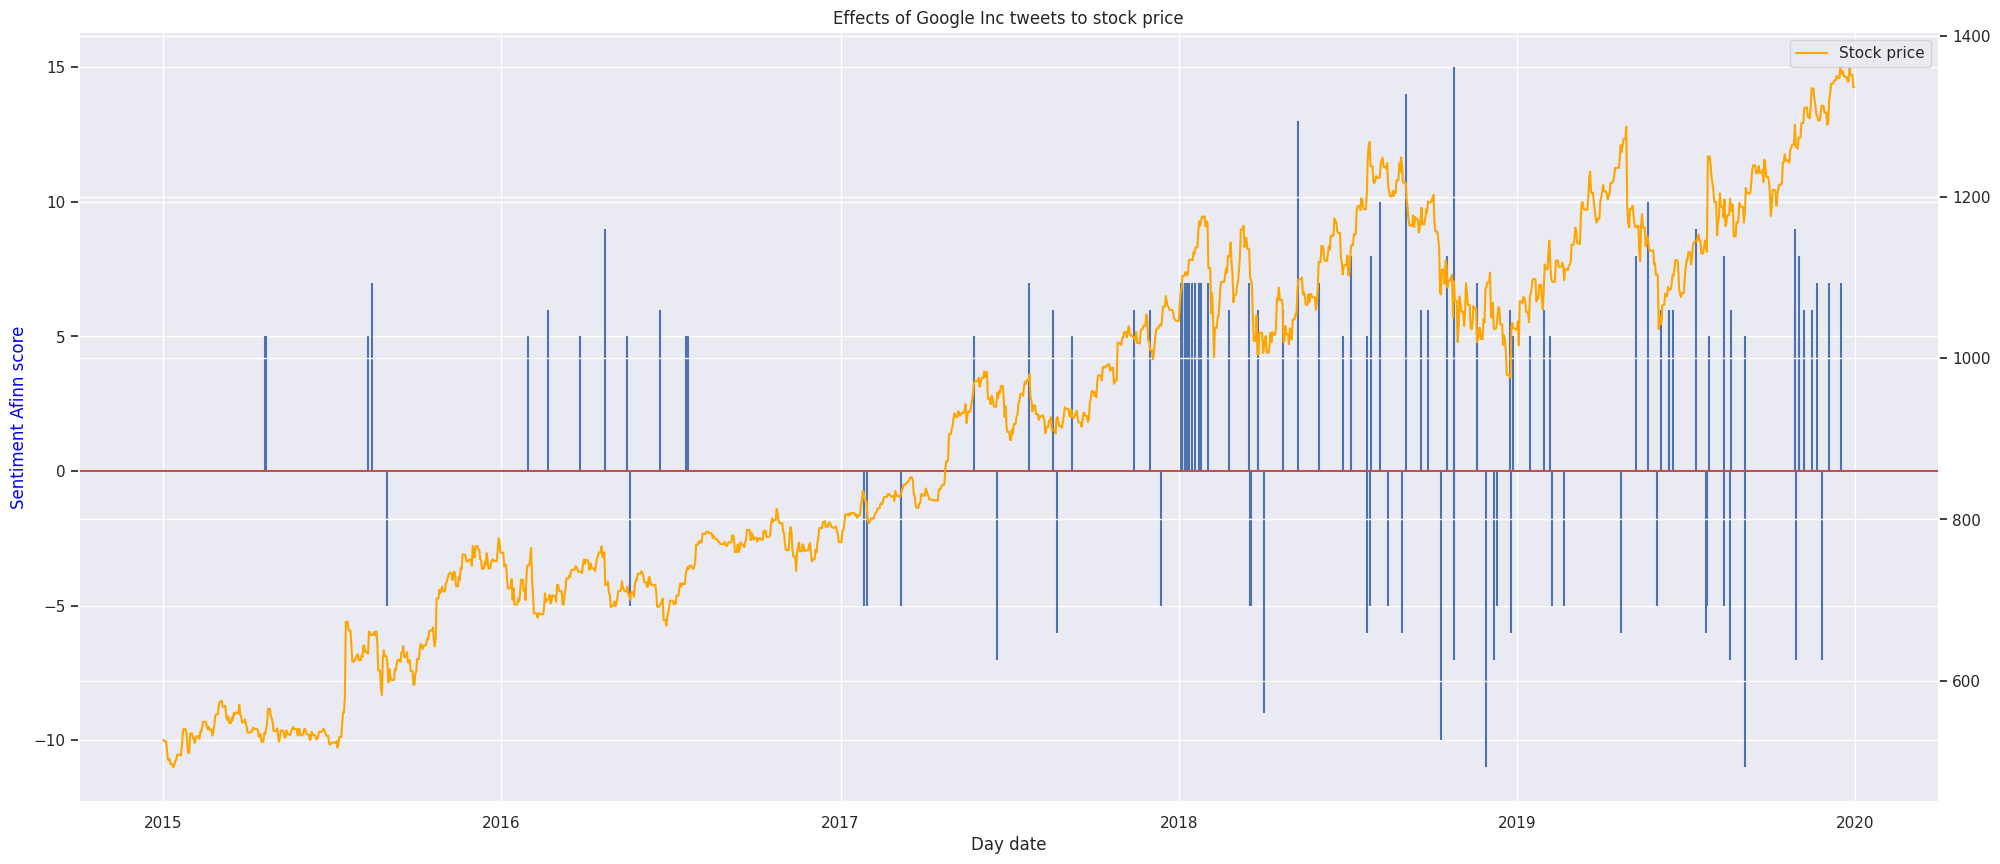

Ticker symbol: MSFT
Stock price of Microsoft company with ticker symbol is MSFT





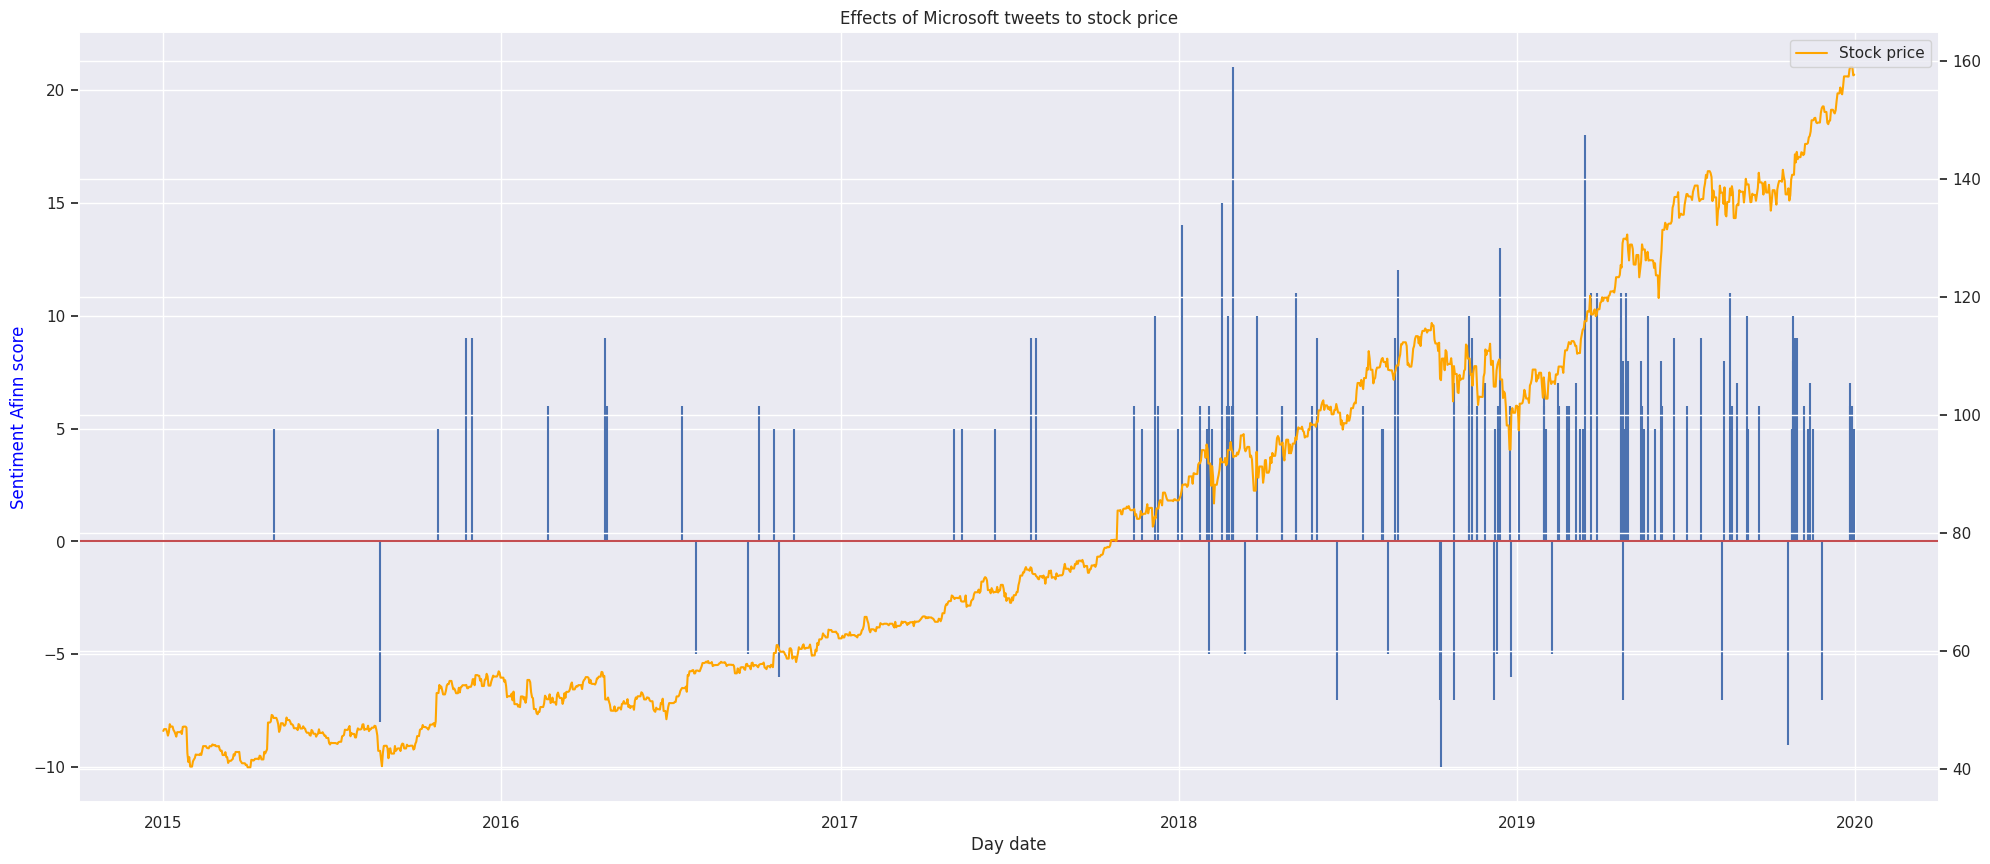

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





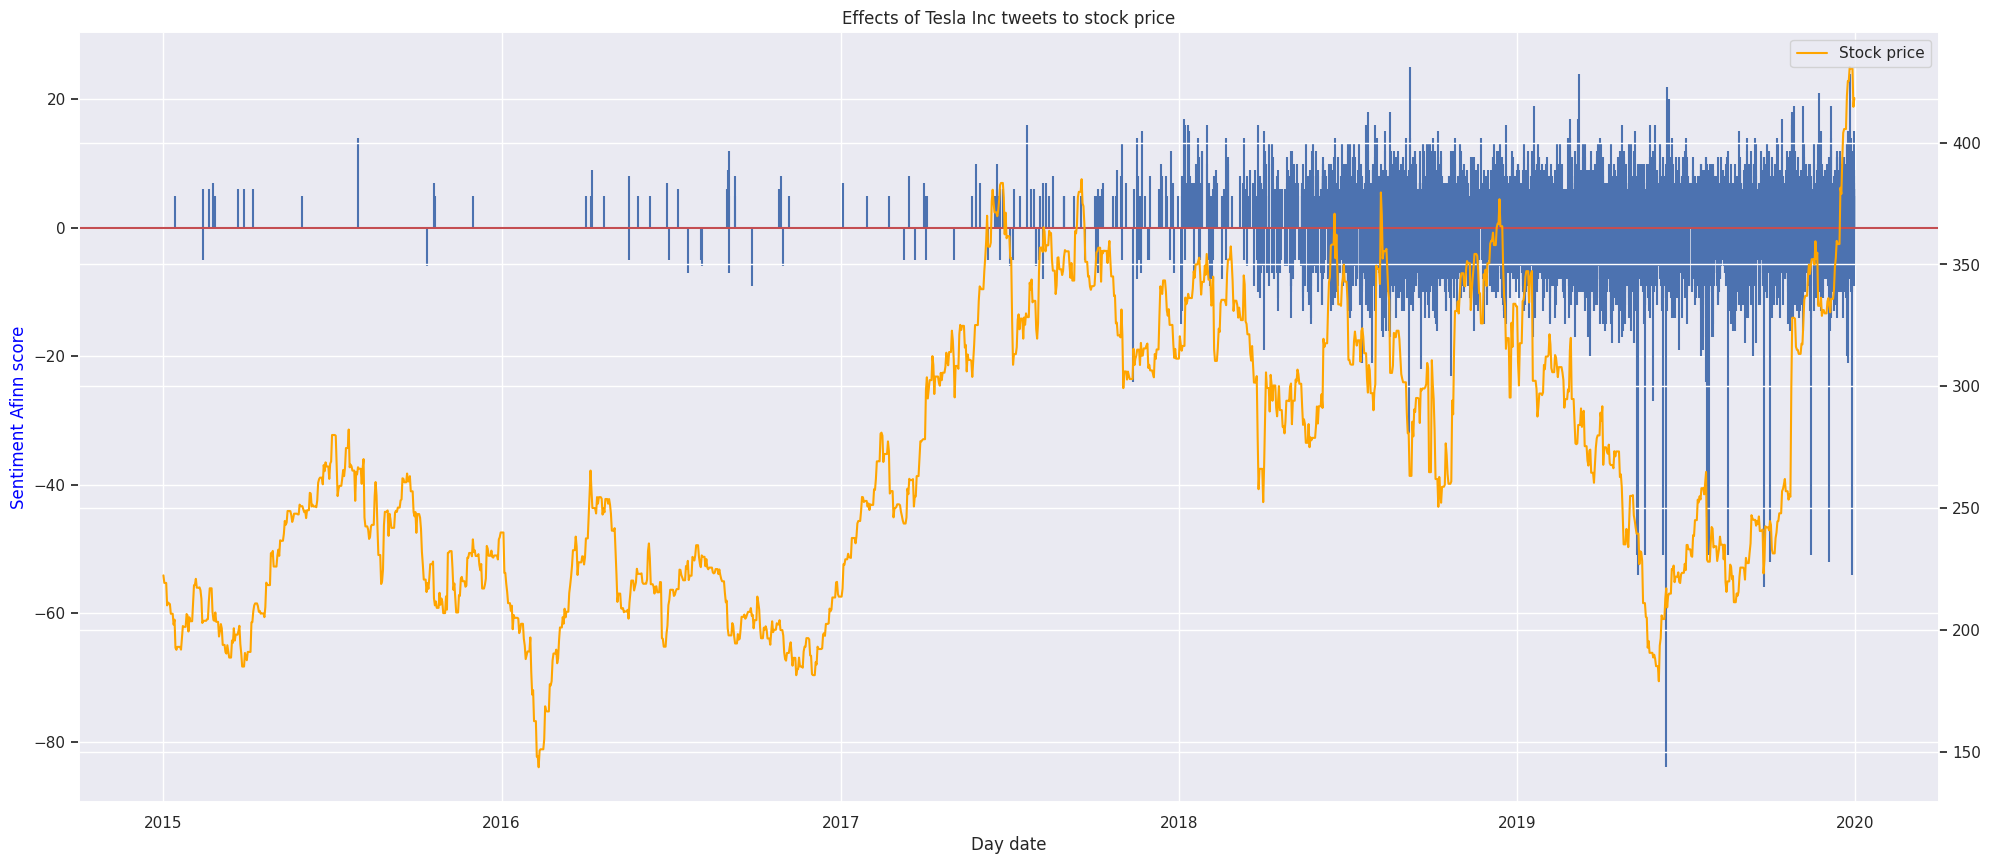

In [ ]:
score_threshold = 5
tmp_tweet_df = tweet_df[(tweet_df['afinn_score']<=-score_threshold) | (tweet_df['afinn_score']>=score_threshold)]
# tmp_tweet_df = tweet_df

draw_stock_price_with_sentiment(tmp_tweet_df, stock_df,start_day= min(stock_df['day_date']), end_day= max(stock_df['day_date']), score_name="afinn_score")


Because the overview of chart is hard to give us useful information. So we will zoom to in specific time.



### Draw chart

Set a specific time range

In [ ]:
start_day = "2019-6-1"
end_day = "2020-1-1"

#### Afinn algorithm

Ticker symbol: AAPL
Stock price of apple company with ticker symbol is AAPL





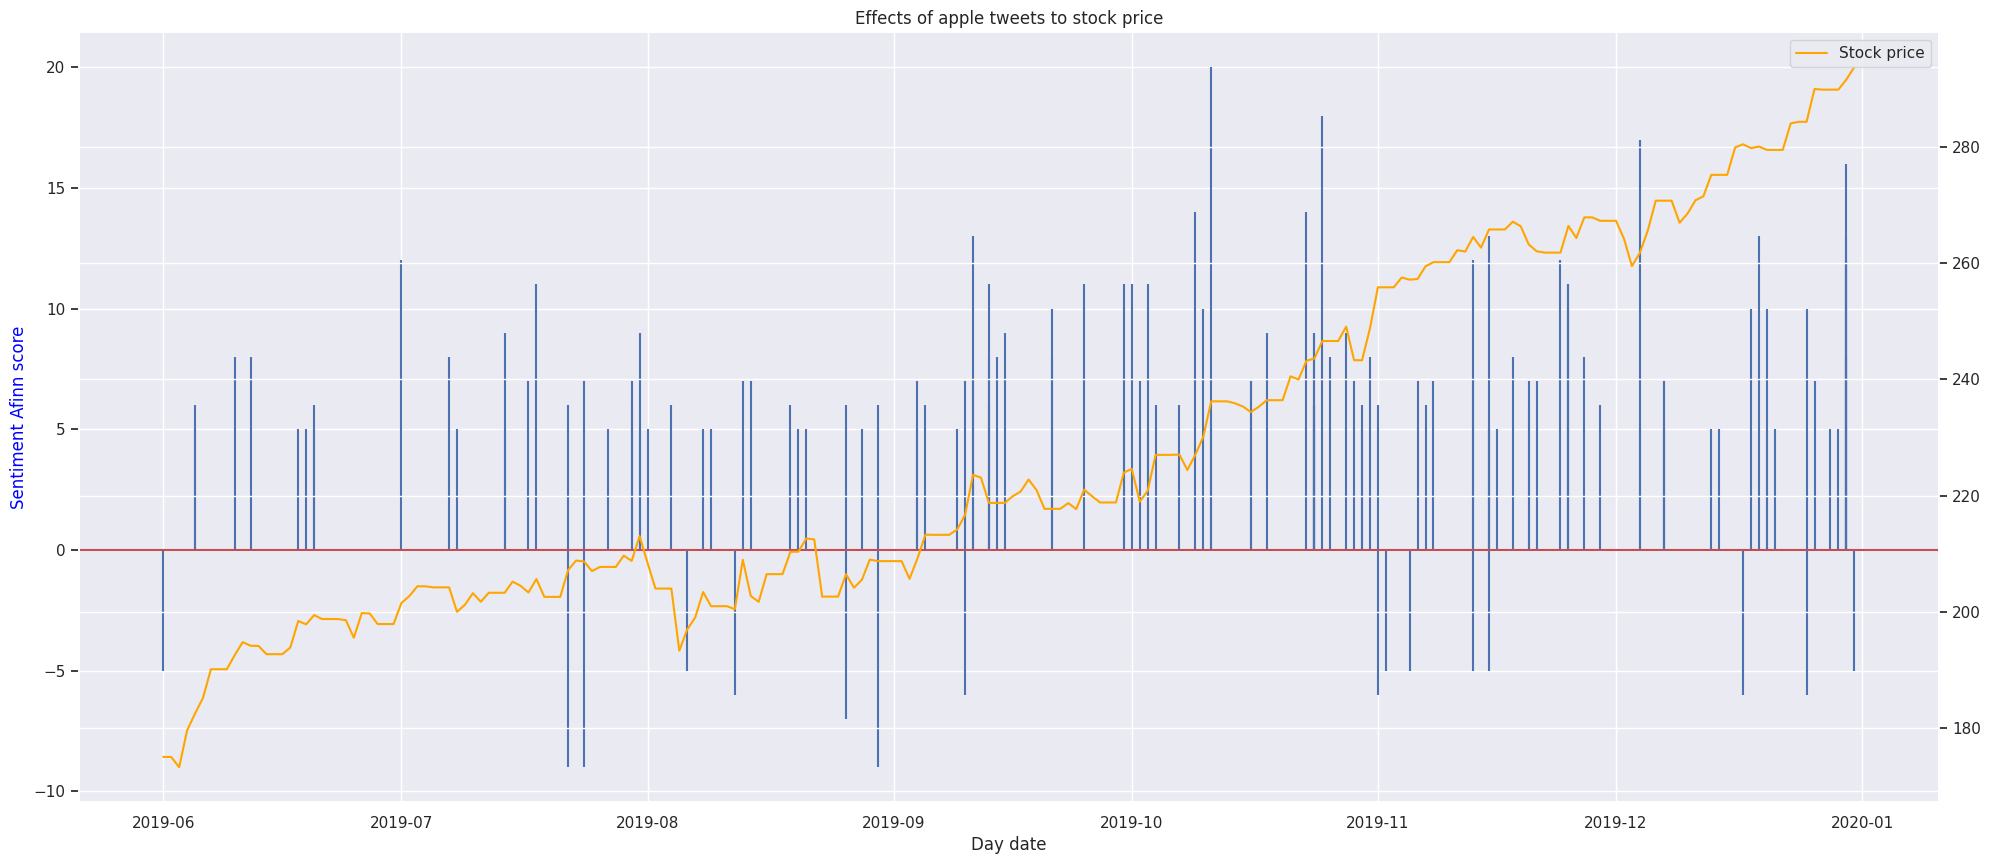

Ticker symbol: AMZN
Stock price of Amazon.com company with ticker symbol is AMZN





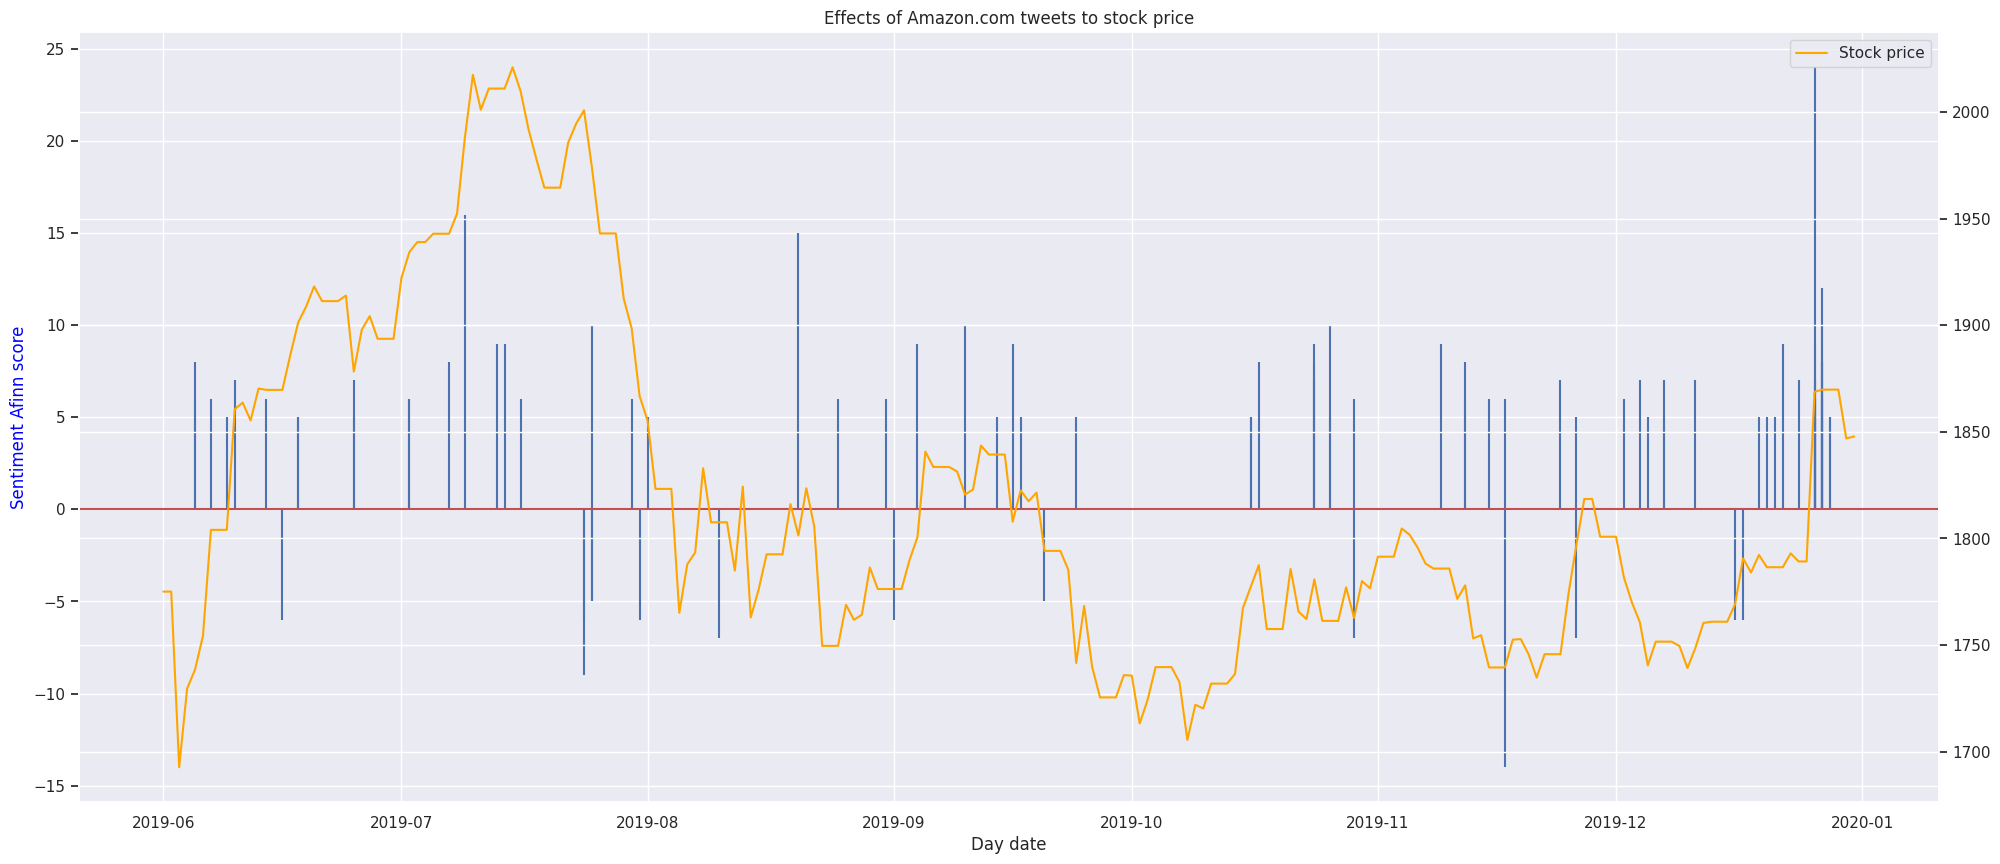

Ticker symbol: GOOGL
Stock price of Google Inc company with ticker symbol is GOOGL





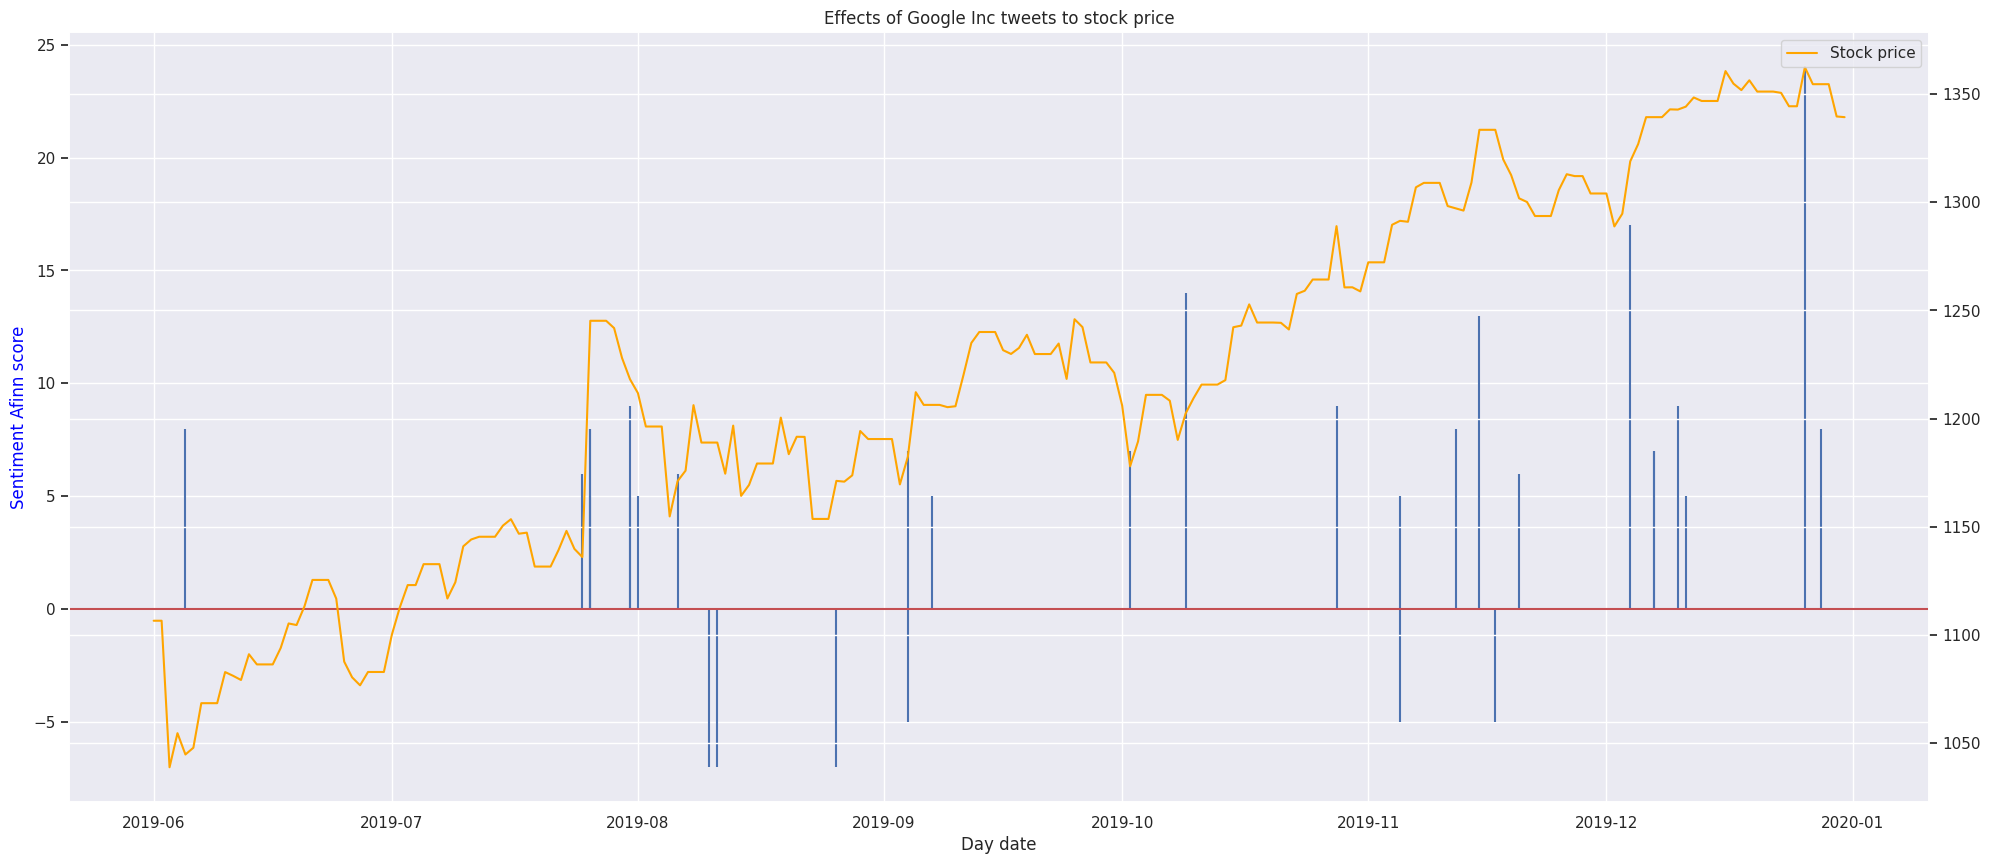

Ticker symbol: GOOG
Stock price of Google Inc company with ticker symbol is GOOG





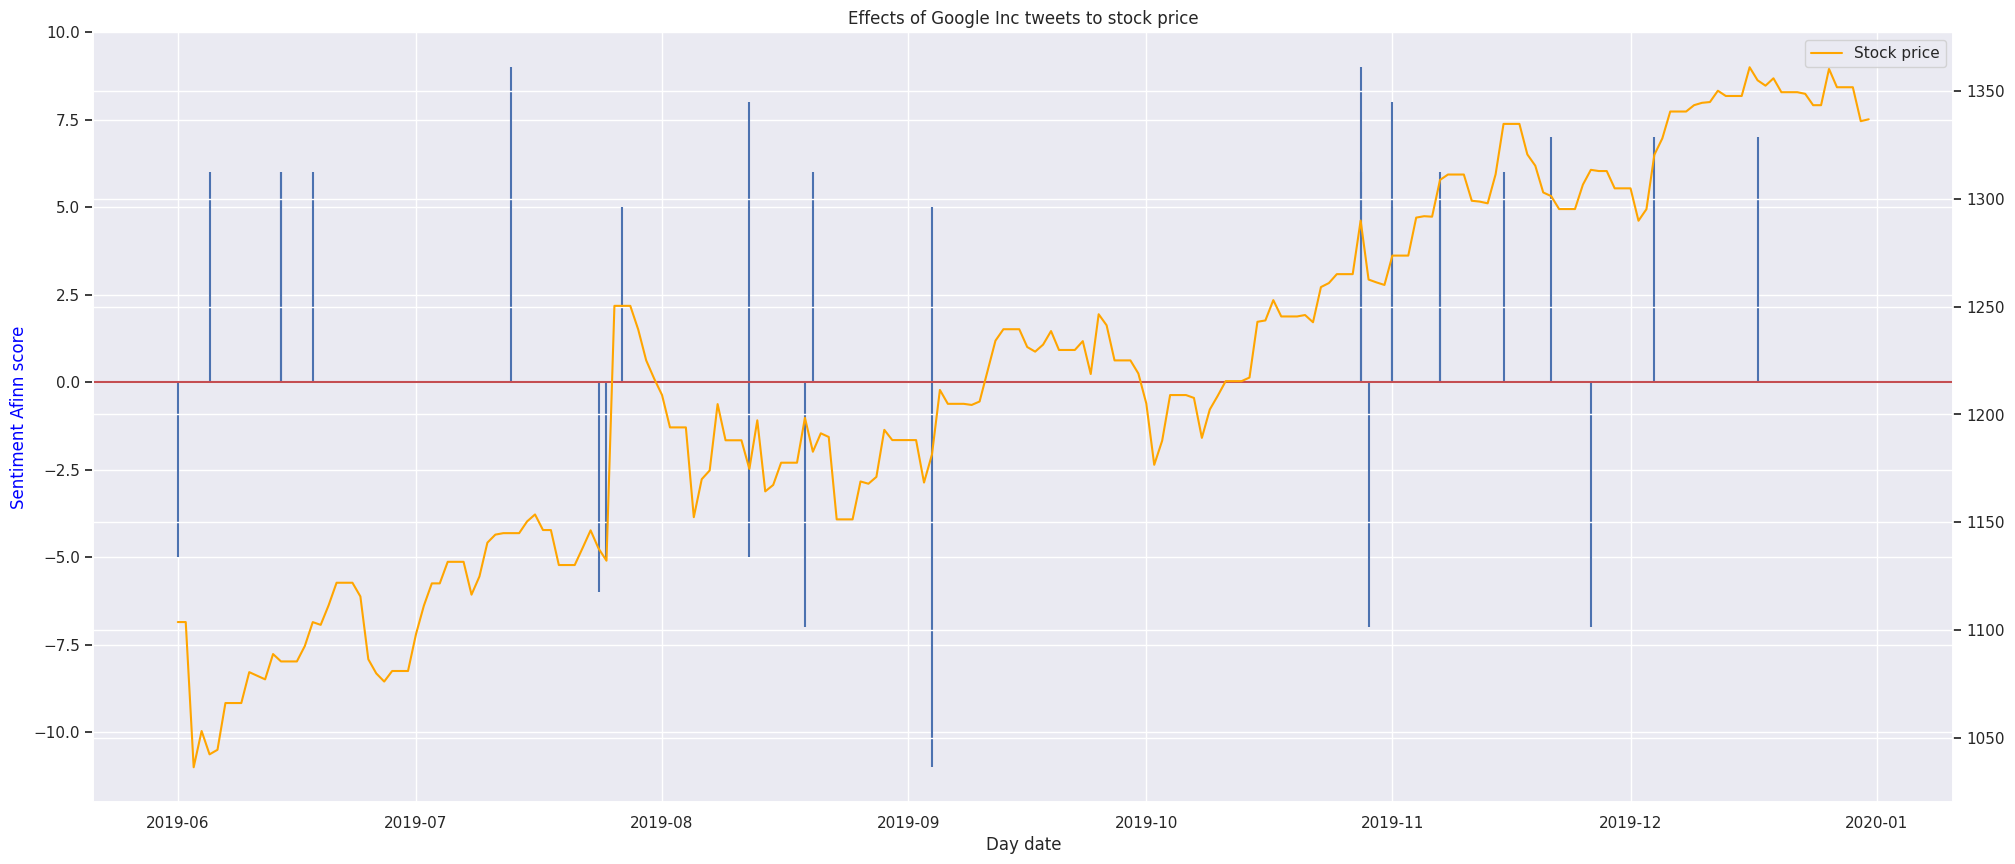

Ticker symbol: MSFT
Stock price of Microsoft company with ticker symbol is MSFT





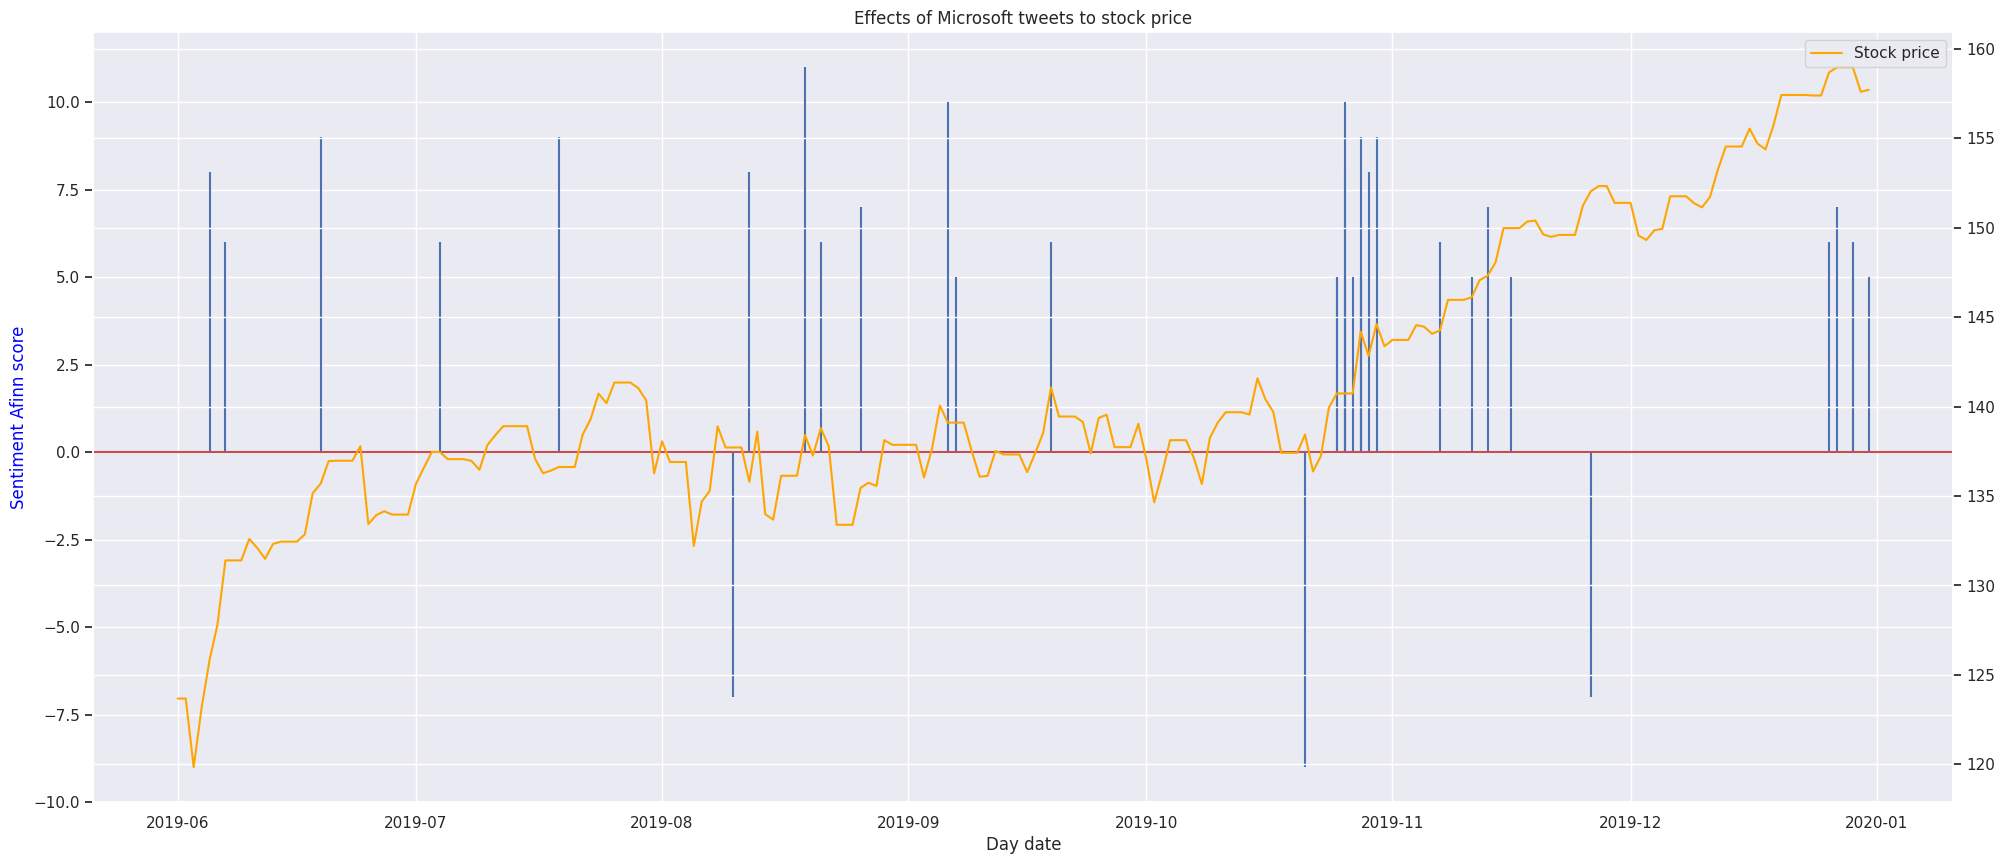

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





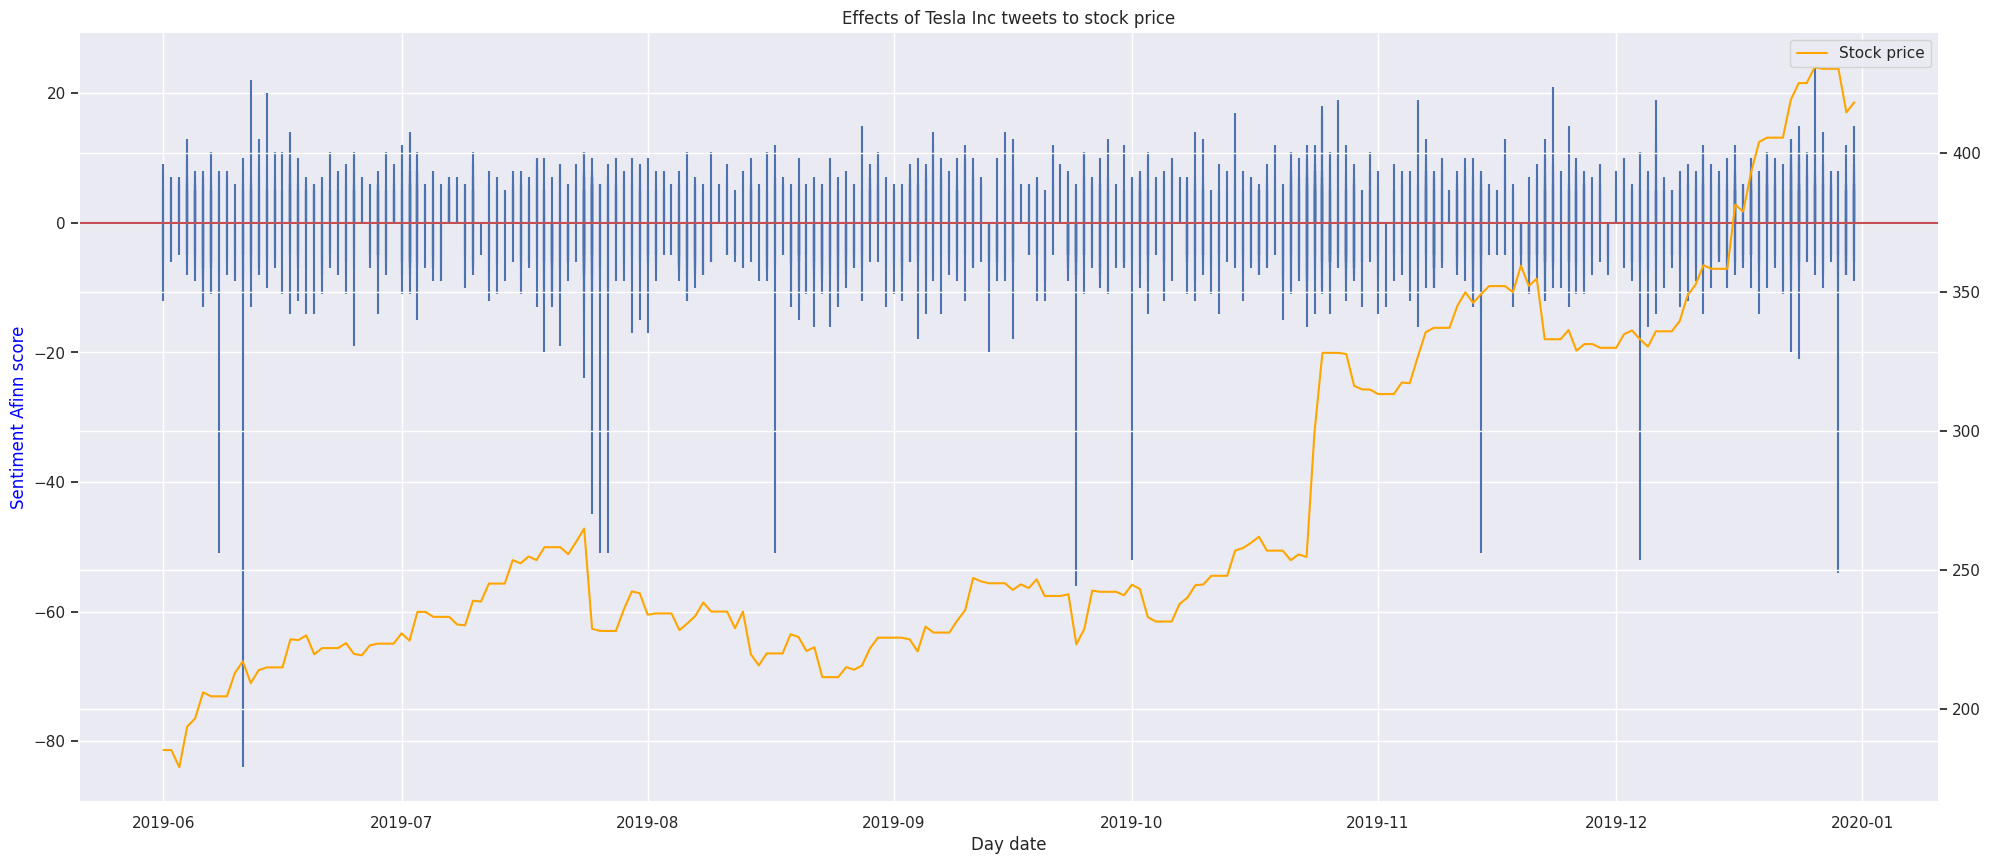

In [ ]:
score_threshold = 5
tmp_tweet_df = tweet_df[(tweet_df['afinn_score']<=-score_threshold) | (tweet_df['afinn_score']>=score_threshold)]
draw_stock_price_with_sentiment(tmp_tweet_df, stock_df, start_day,end_day, score_name="afinn_score")

#### Vander algorithm

Before draw chart with Vander score. We will filter all score in range [-0.05, 0.05]. Because we consider the vander score in that range is neutral which is not affect to stock price.

Ticker symbol: AAPL
Stock price of apple company with ticker symbol is AAPL





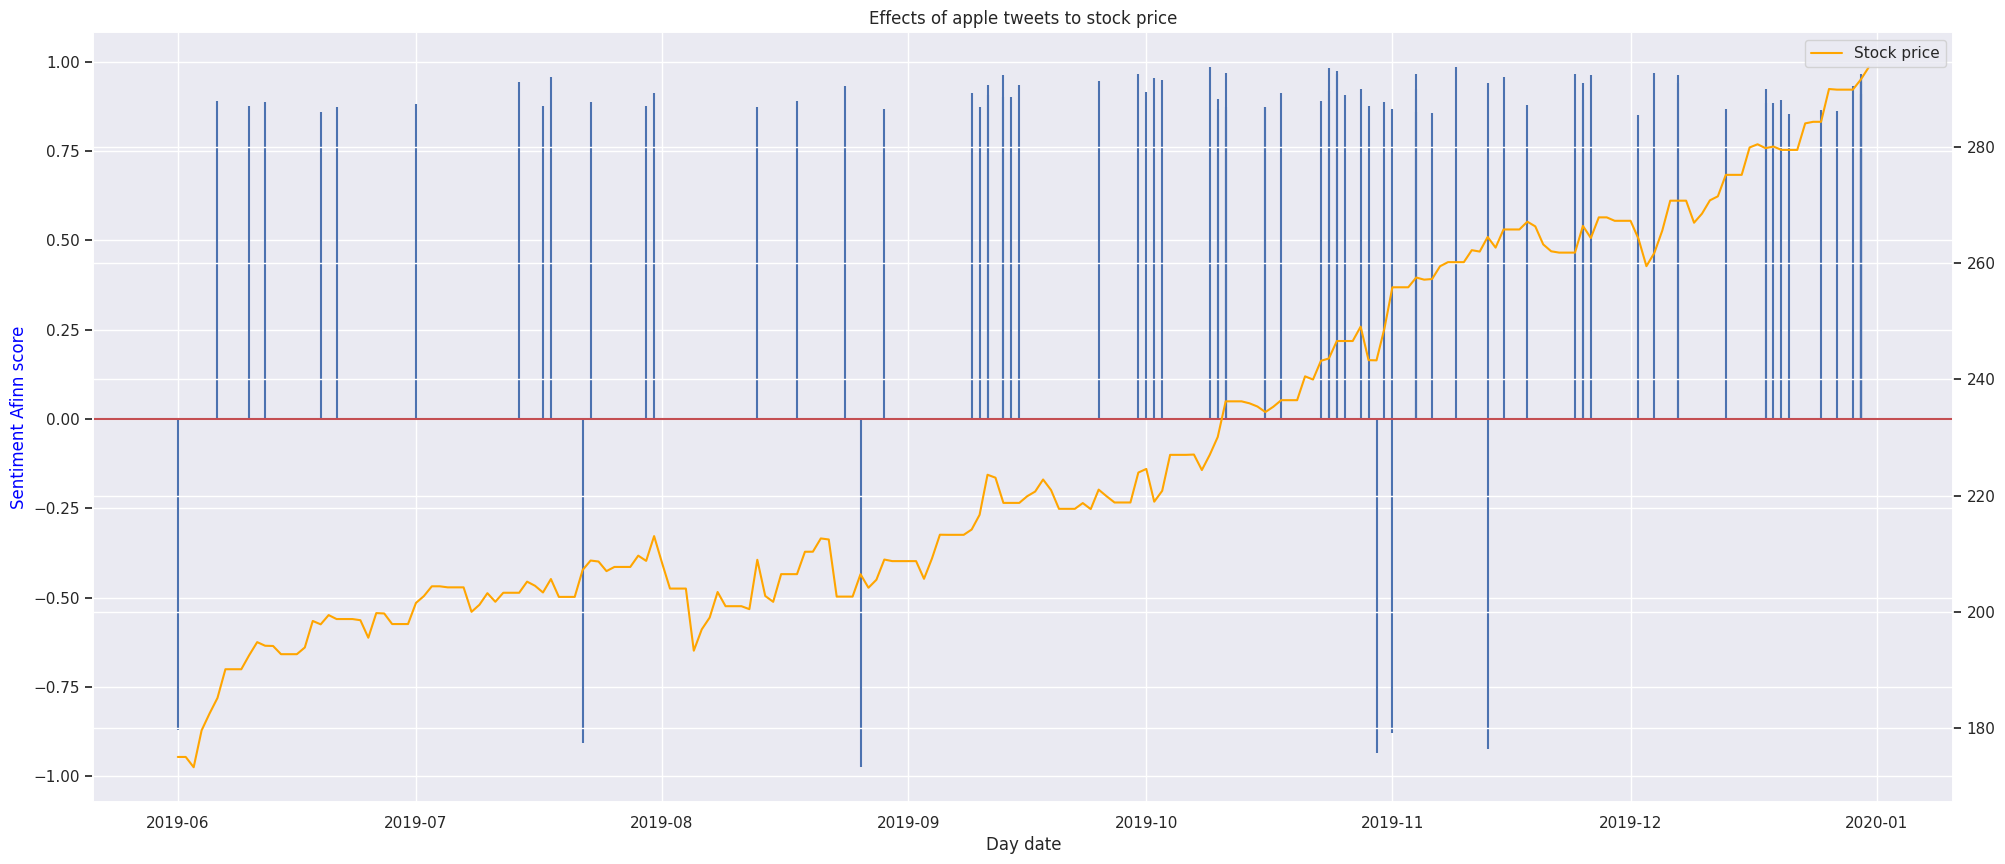

Ticker symbol: AMZN
Stock price of Amazon.com company with ticker symbol is AMZN





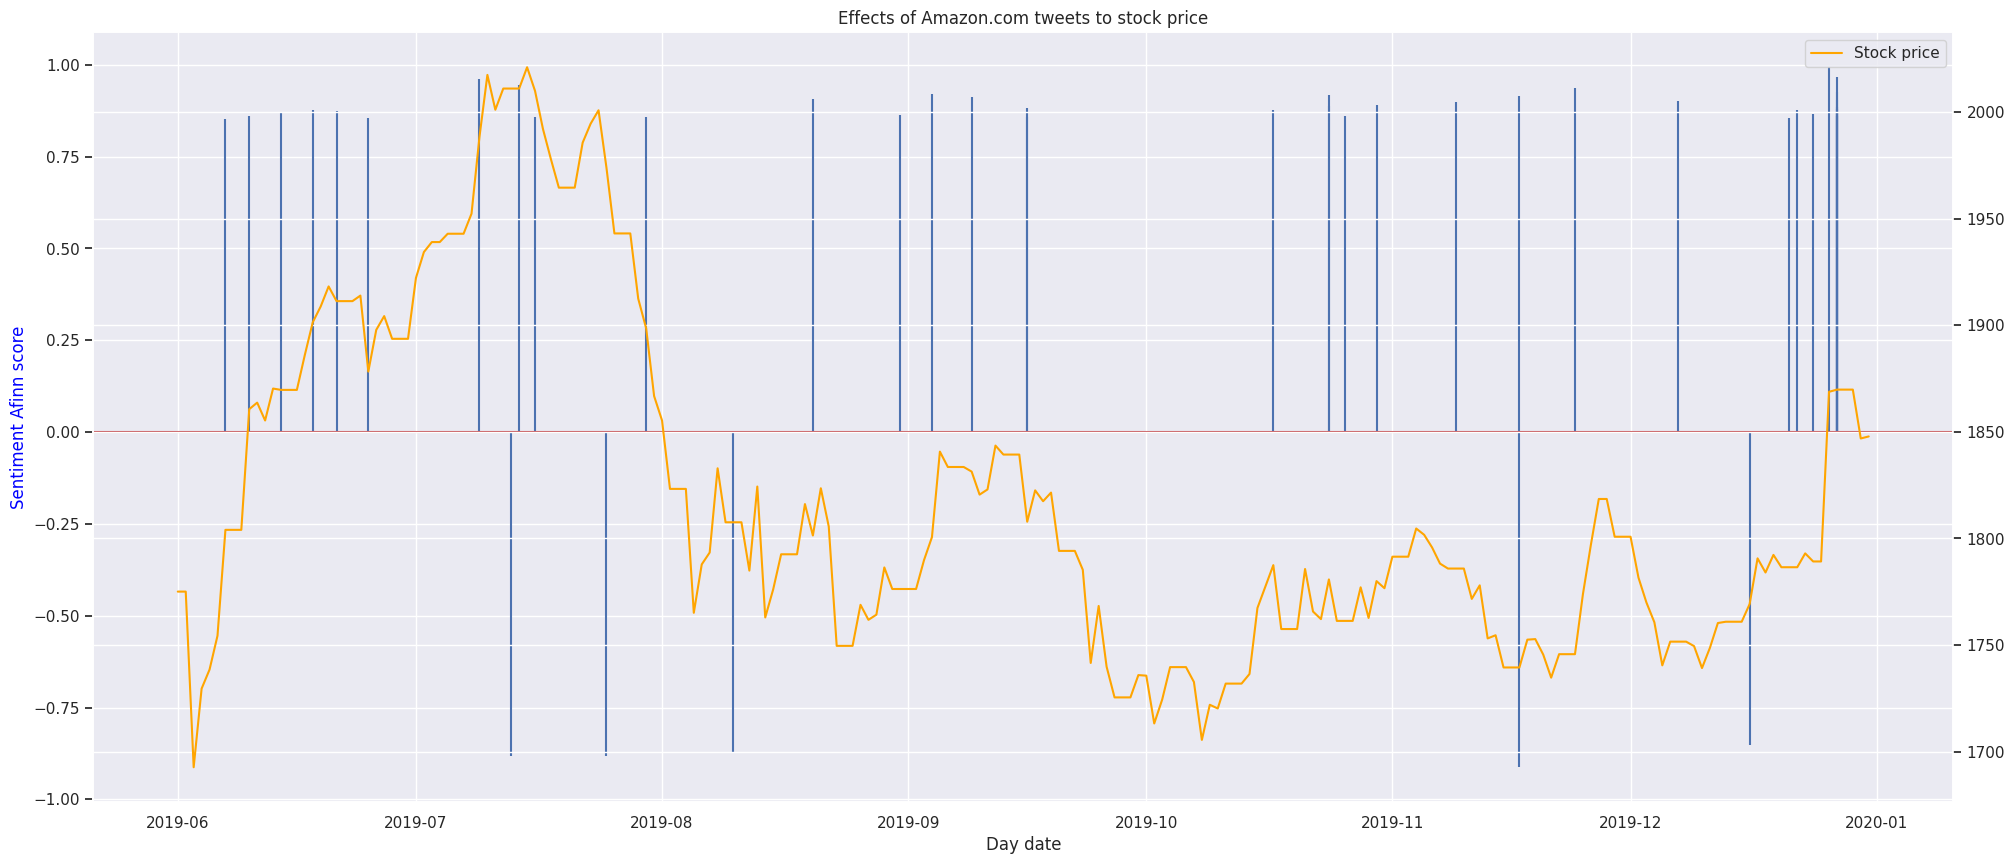

Ticker symbol: GOOGL
Stock price of Google Inc company with ticker symbol is GOOGL





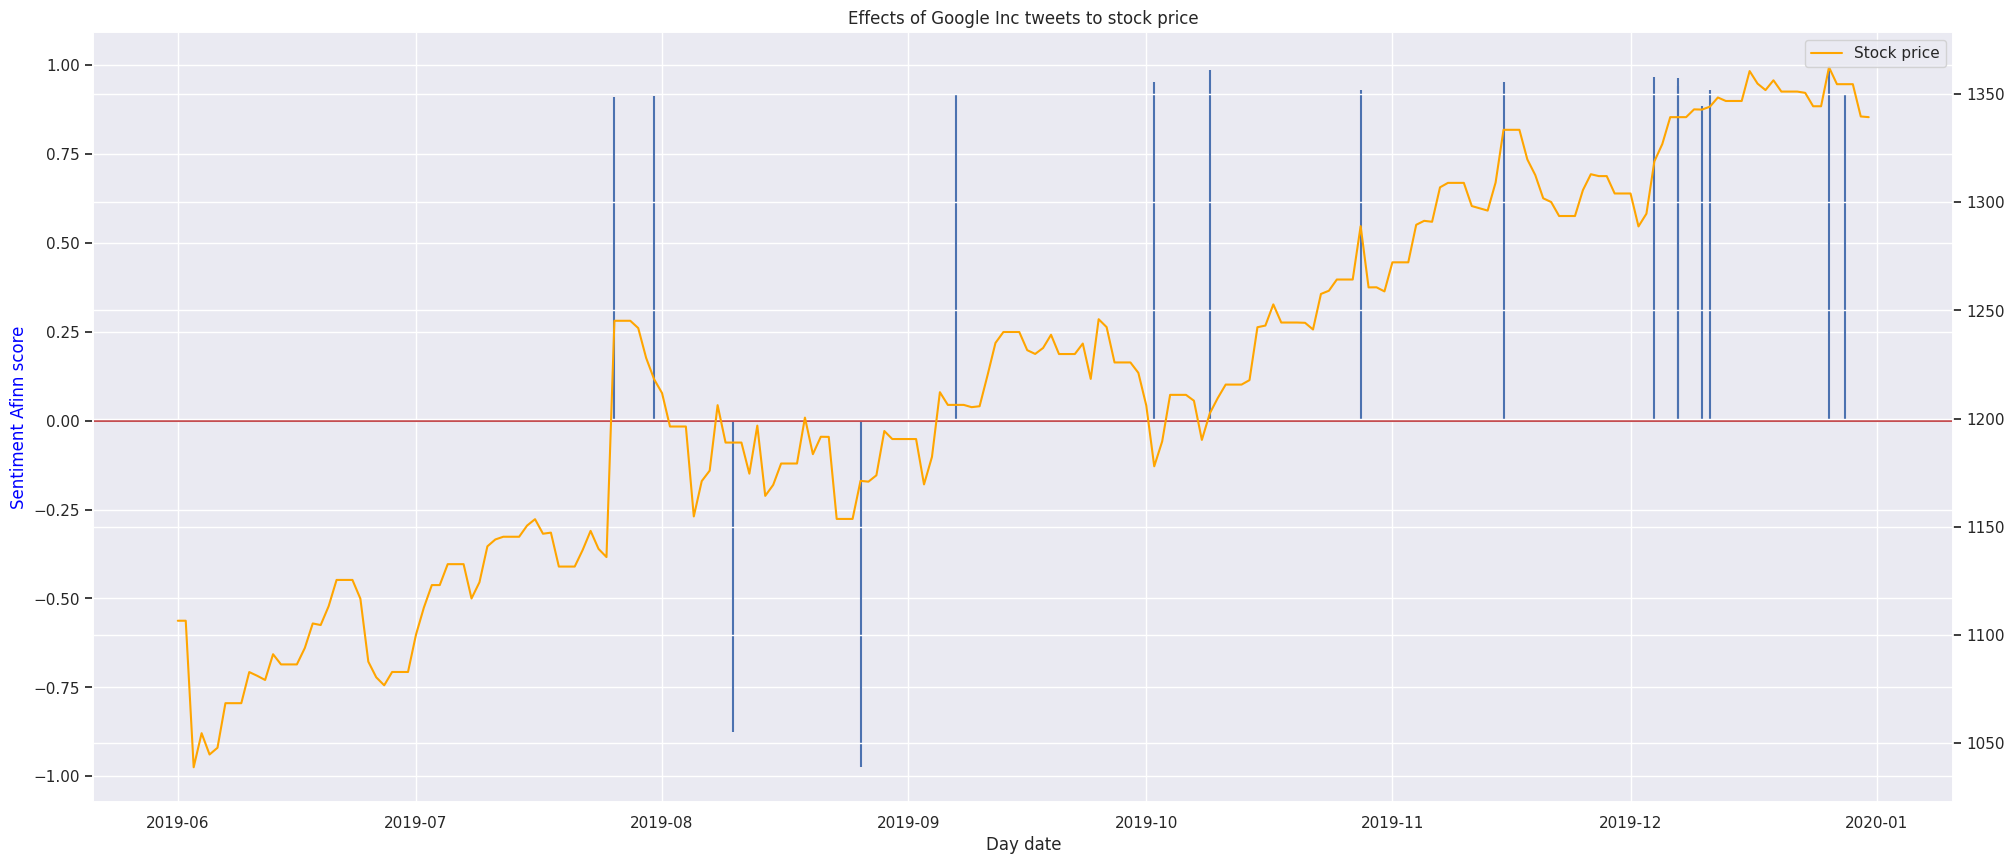

Ticker symbol: GOOG
Stock price of Google Inc company with ticker symbol is GOOG





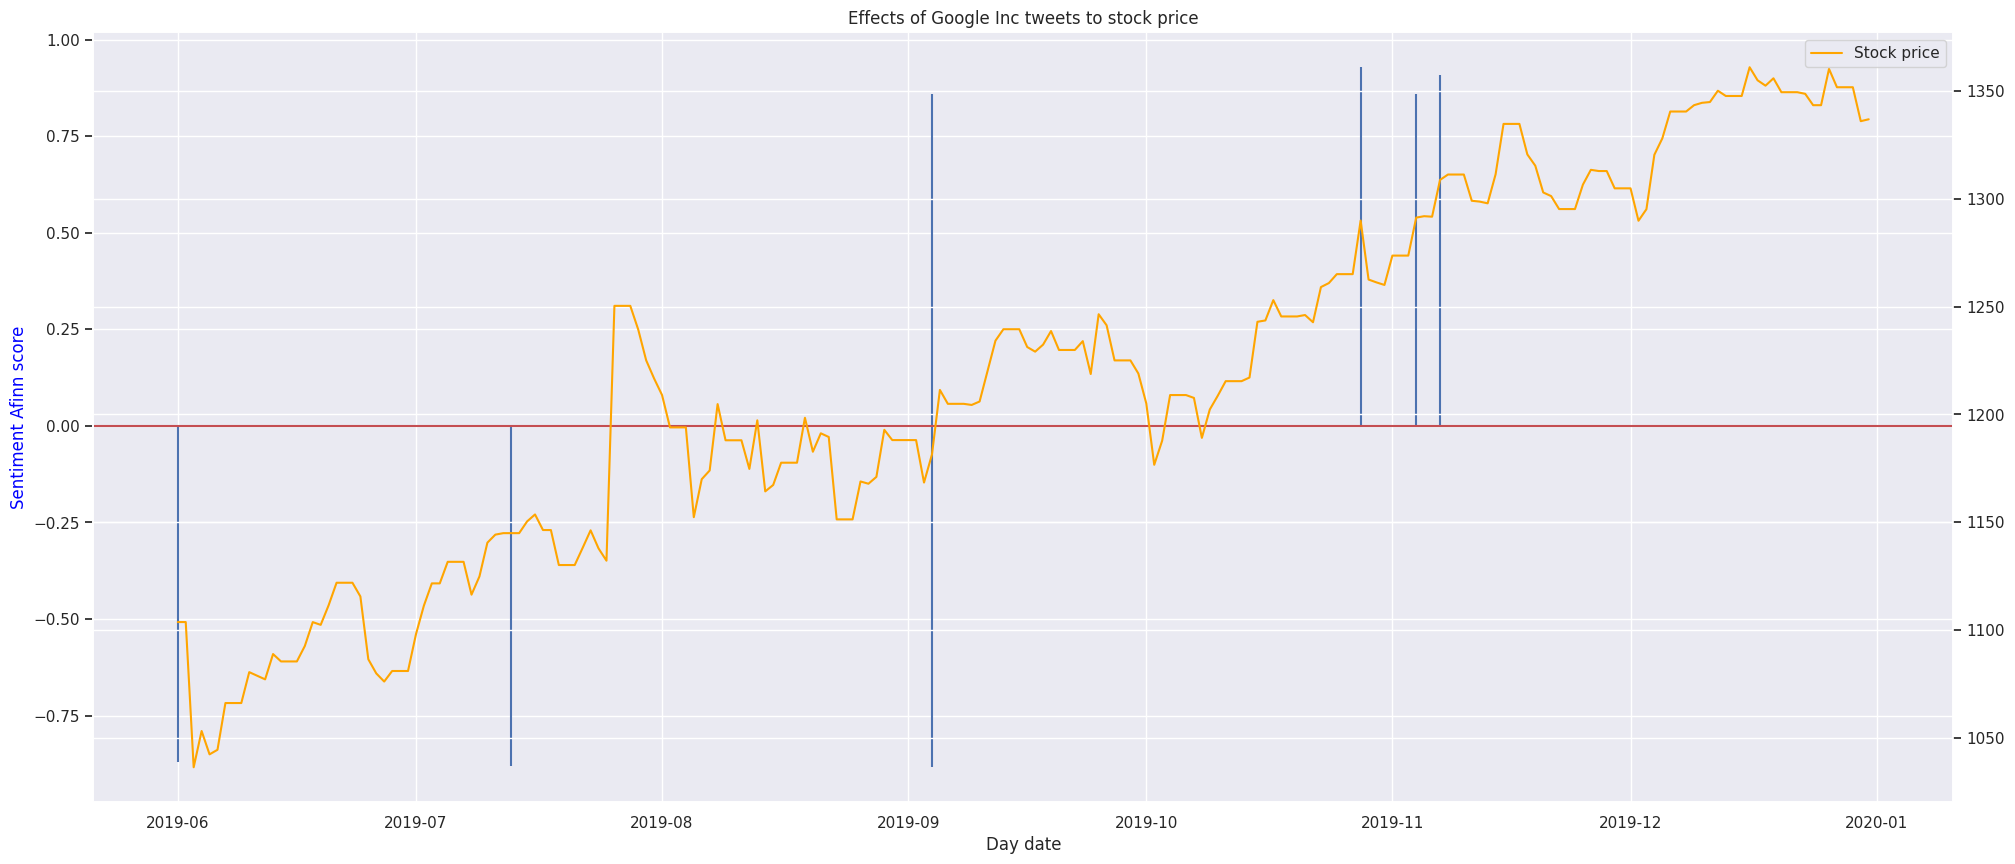

Ticker symbol: MSFT
Stock price of Microsoft company with ticker symbol is MSFT





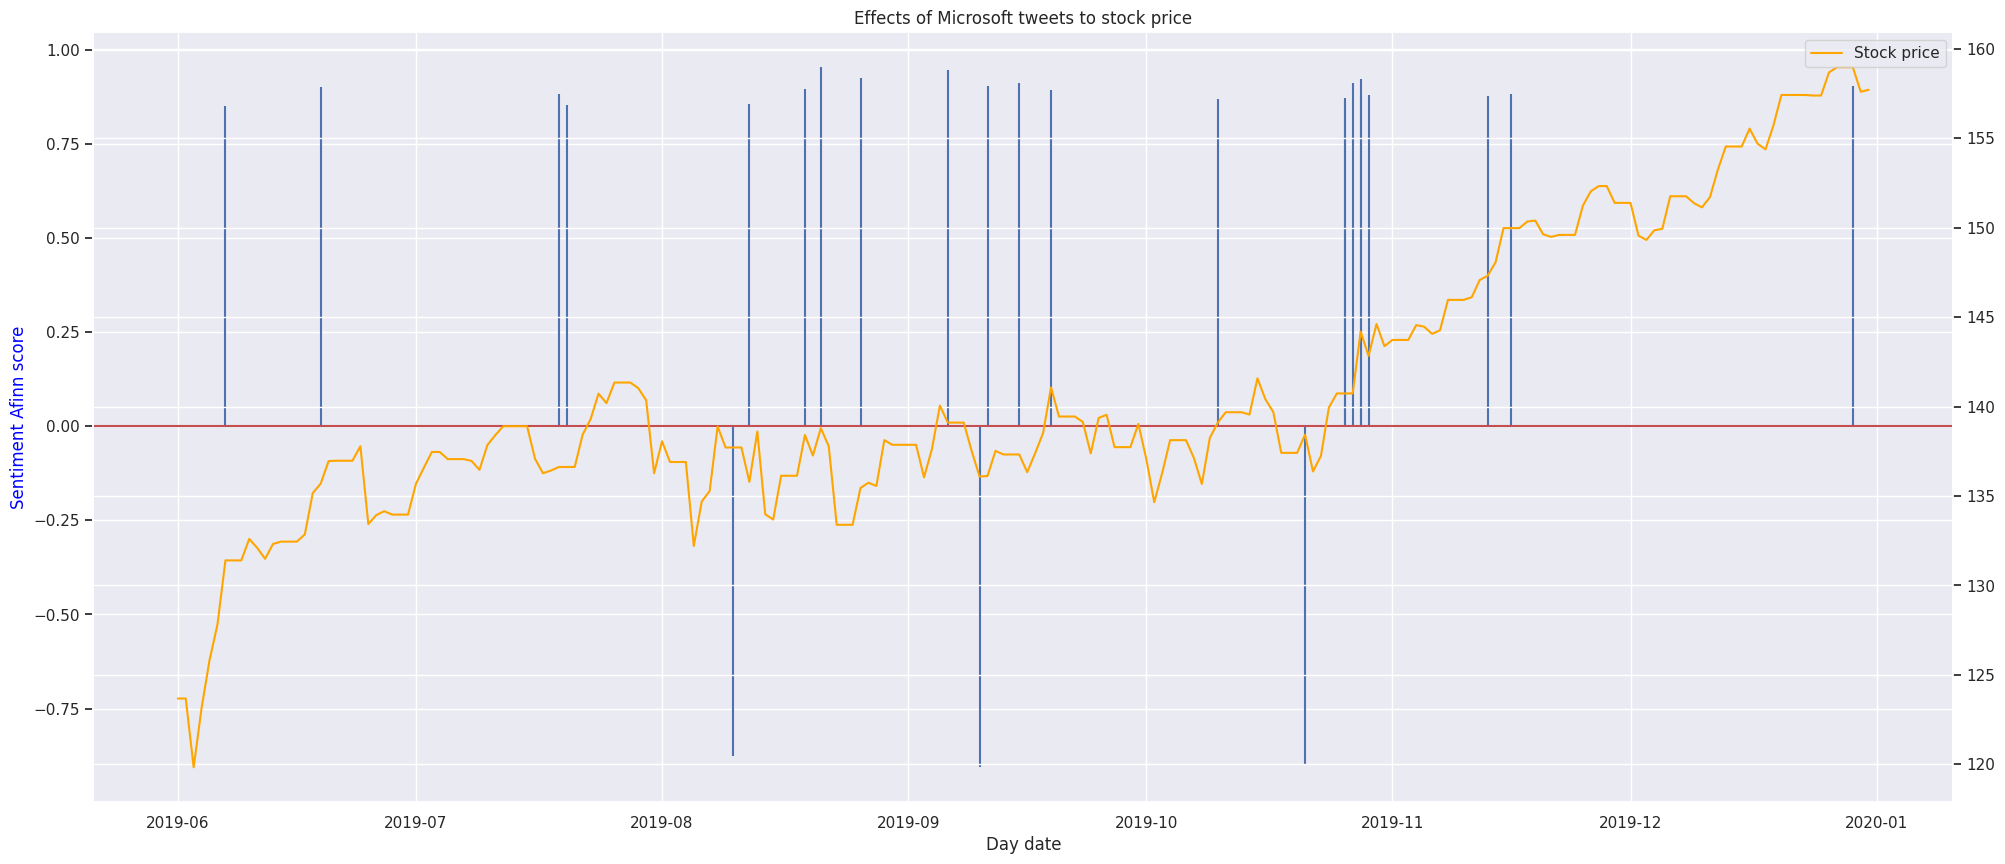

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





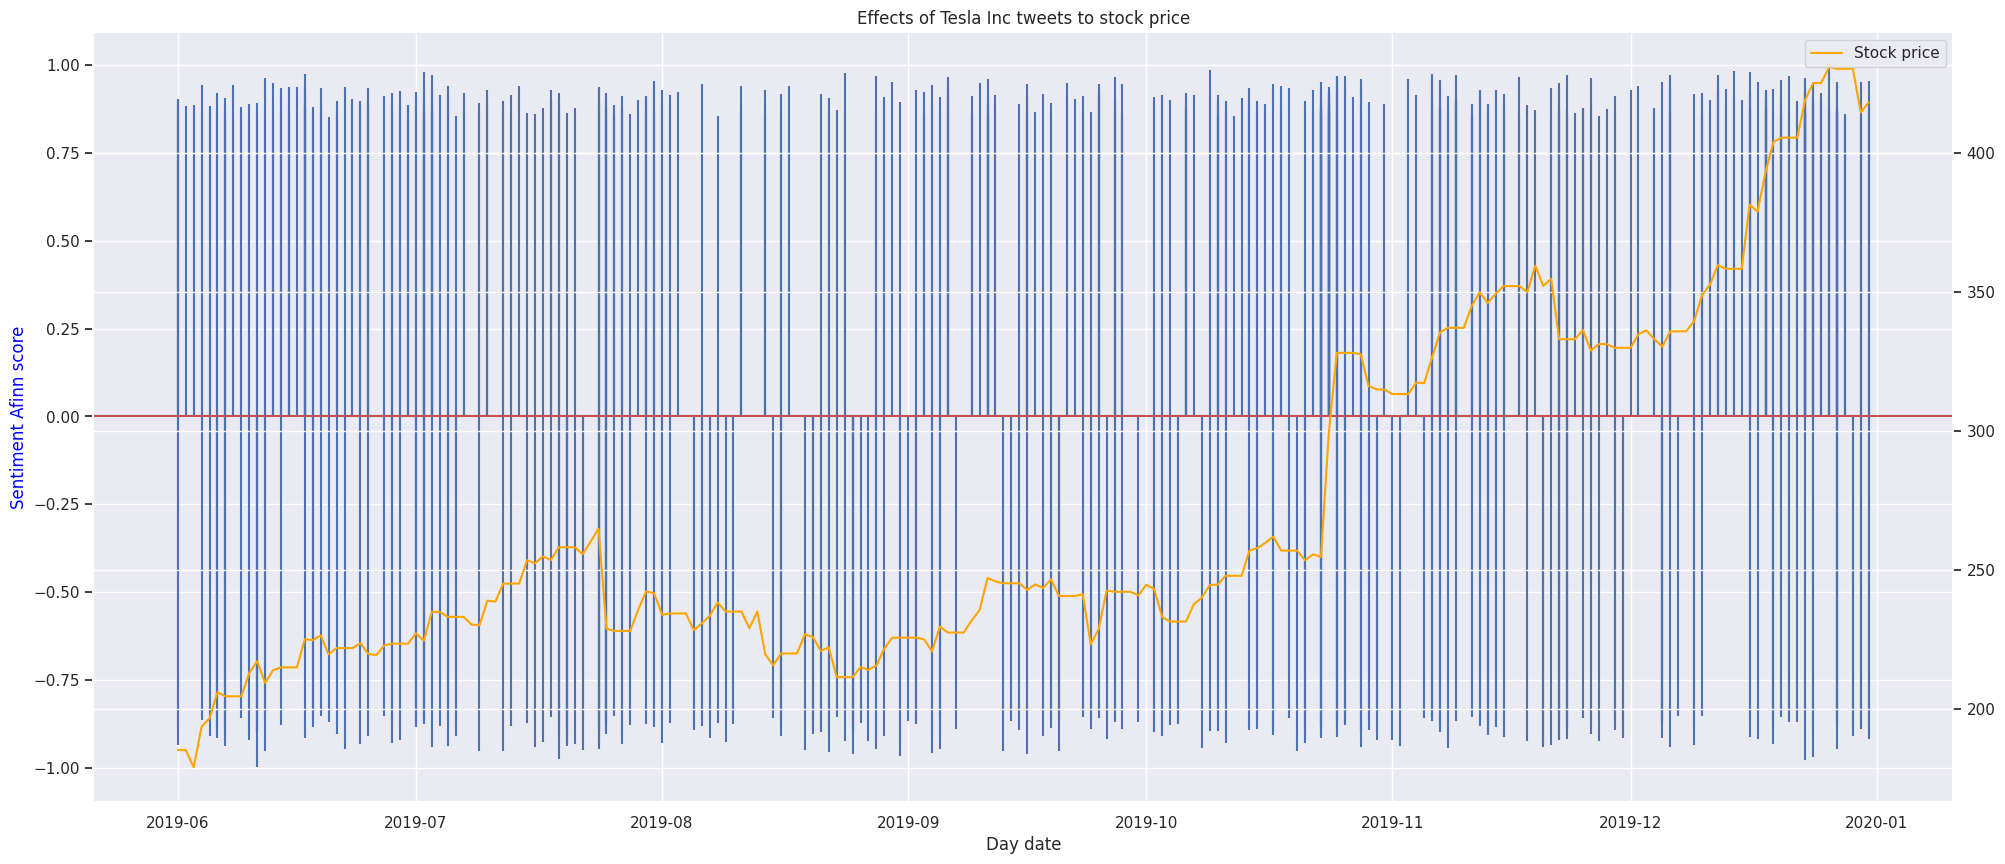

In [ ]:
score_threshold = 0.85
tmp_tweet_df = tweet_df[(tweet_df['vander_score']<=-score_threshold) | (tweet_df['vander_score']>=score_threshold)]


draw_stock_price_with_sentiment(tmp_tweet_df, stock_df, start_day, end_day, score_name="vander_score")

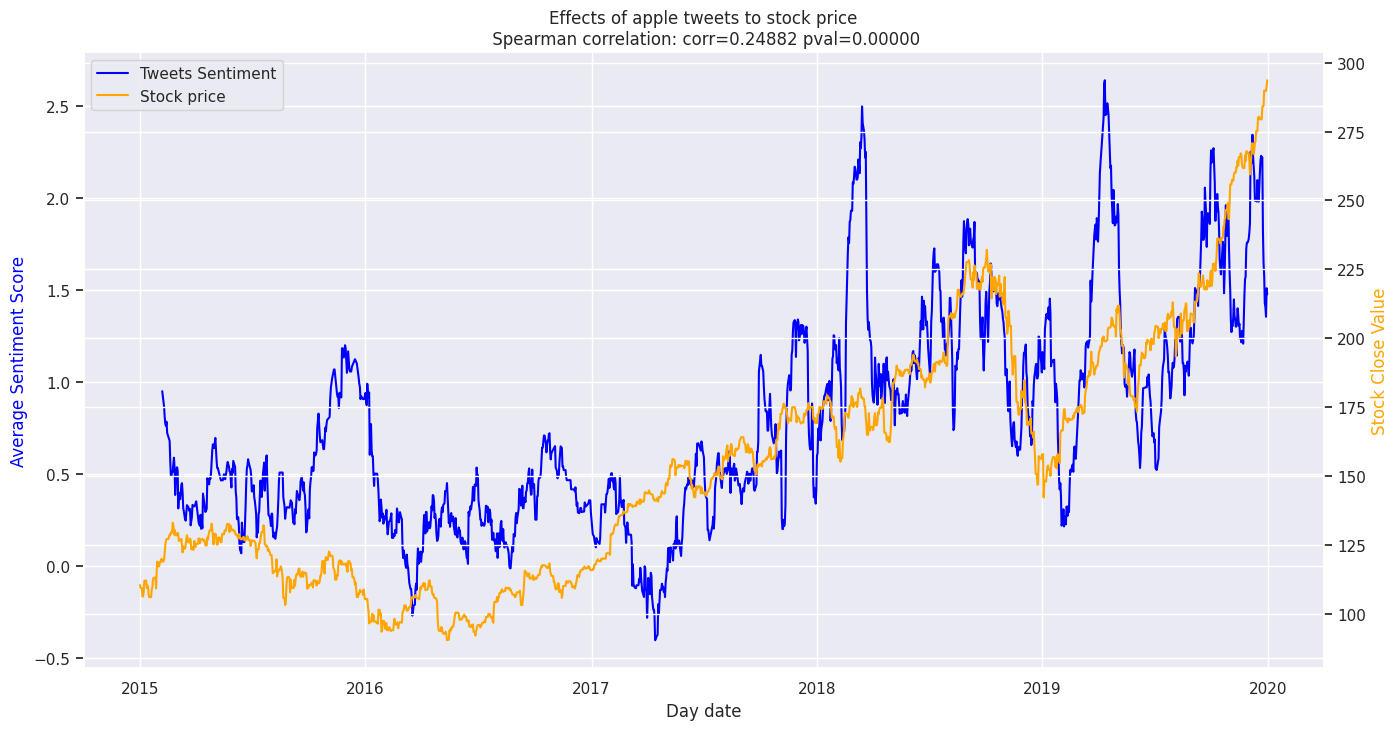

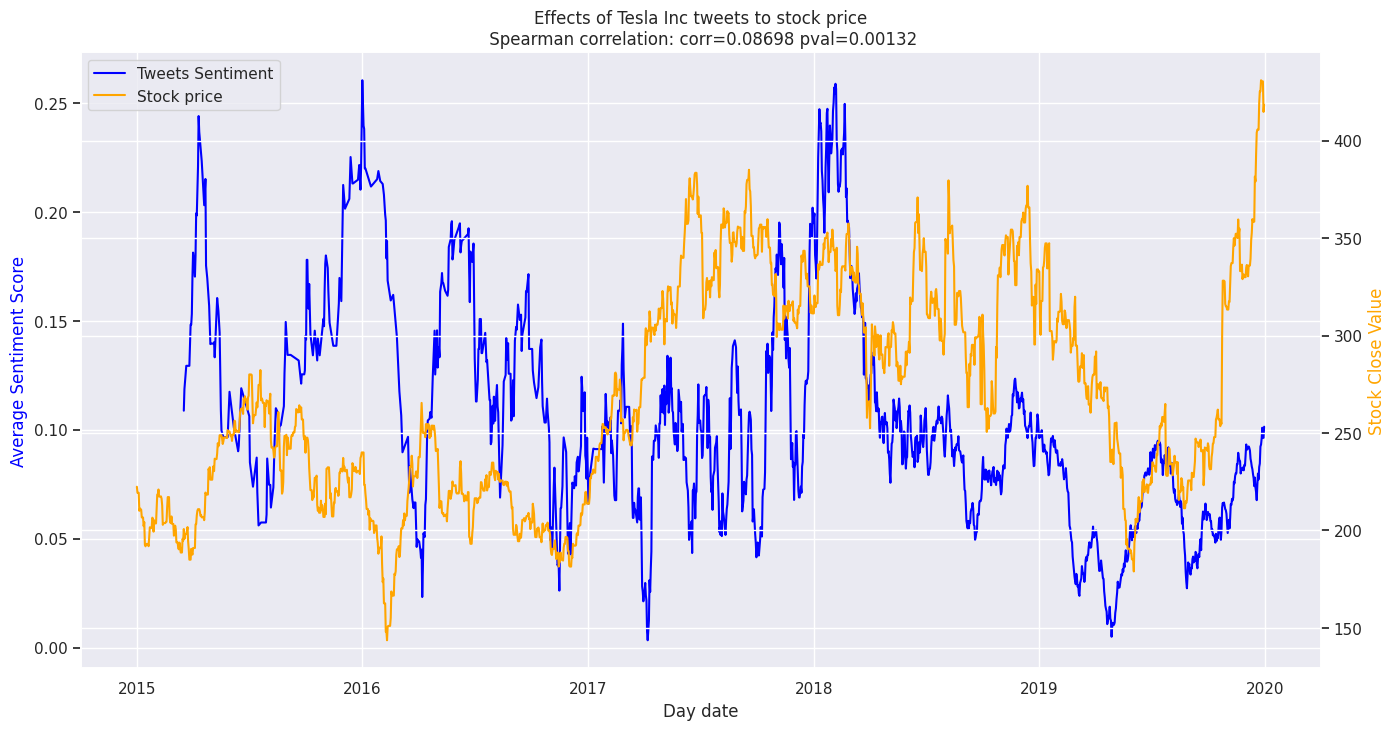

In [ ]:
def sentiment_stock_correlation_plot(tweet_df, stock_df, ticker_symbol, sentiment_score_column):
    """
    Plots the average sentiment score and stock close price over time for a given company,
    and calculates the Spearman correlation.

    Args:
        tweet_df (pd.DataFrame): DataFrame containing tweet data with sentiment scores.
        stock_df (pd.DataFrame): DataFrame containing stock data.
        ticker_symbol (str): The ticker symbol of the company to plot.
        sentiment_score_column (str): The name of the column in tweet_df containing
                                      the sentiment scores ('afinn_score' or 'vader_score').
    """
    sub_tweet_df = tweet_df[tweet_df["ticker_symbol"] == ticker_symbol].copy()
    sub_stock_df = stock_df[stock_df["ticker_symbol"] == ticker_symbol].copy()

    # Ensure 'day_date' is the index for both dataframes for easier plotting and correlation
    sub_tweet_df = sub_tweet_df.set_index('day_date')
    sub_stock_df = sub_stock_df.set_index('day_date')

    # Calculate the daily average sentiment score
    daily_avg_sentiment = sub_tweet_df.groupby('day_date')[sentiment_score_column].mean()

    # Optional: Apply a rolling mean for smoothing (similar to your example)
    # You can adjust the window size (e.g., 30 days)
    smoothed_sentiment = daily_avg_sentiment.rolling(window=30).mean().dropna()

    # Align stock data with the sentiment data index
    aligned_stock = sub_stock_df.reindex(daily_avg_sentiment.index)

    # Calculate Spearman correlation
    # Use daily_avg_sentiment before rolling mean for correlation calculation
    corr, pval = stat.spearmanr(daily_avg_sentiment.dropna(), aligned_stock['close_value'].dropna(), nan_policy='omit')

    # Get the company name
    company_name = company[company["ticker_symbol"] == ticker_symbol]["company_name"].iloc[0]

    # Plotting
    fig, ax1 = plt.subplots(figsize=(16, 8))
    ax2 = ax1.twinx()

    ax1.plot(smoothed_sentiment.index, smoothed_sentiment, label='Tweets Sentiment', color='blue')
    ax2.plot(sub_stock_df.index, sub_stock_df['close_value'], color='orange', label='Stock price')

    ax2.set_title(f"Effects of {company_name} tweets to stock price" + f"\n Spearman correlation: corr={corr:.5f} pval={pval:.5f}")
    ax1.set_xlabel('Day date')
    ax1.set_ylabel('Average Sentiment Score', color="blue")
    ax2.set_ylabel('Stock Close Value', color="orange")

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)

    plt.show()

# Example usage: Plot for 'AAPL' using 'afinn_score'
sentiment_stock_correlation_plot(tweet_df, stock_df, 'AAPL', 'afinn_score')

# Example usage: Plot for 'TSLA' using 'vader_score'
sentiment_stock_correlation_plot(tweet_df, stock_df, 'TSLA', 'vander_score')

Generating plot for AAPL using Afinn score...


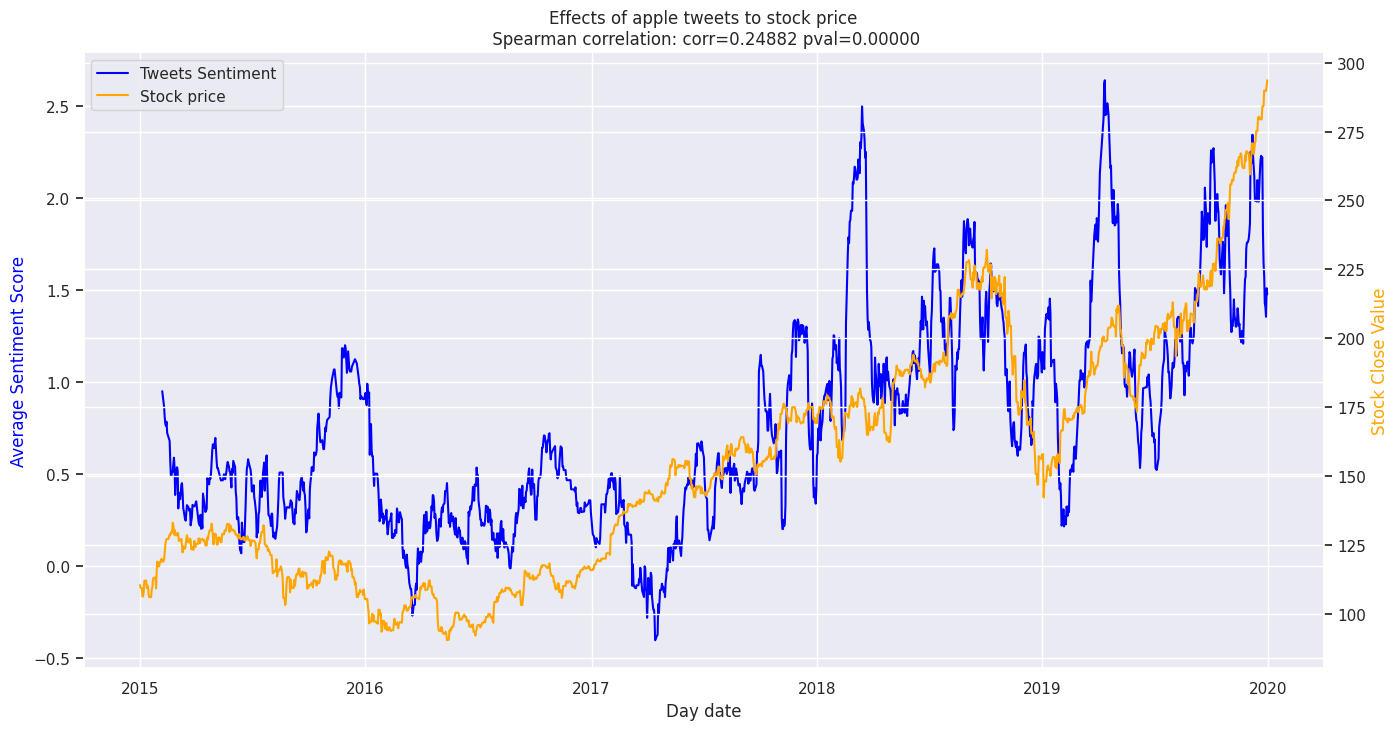


Generating plot for AAPL using Vander score...


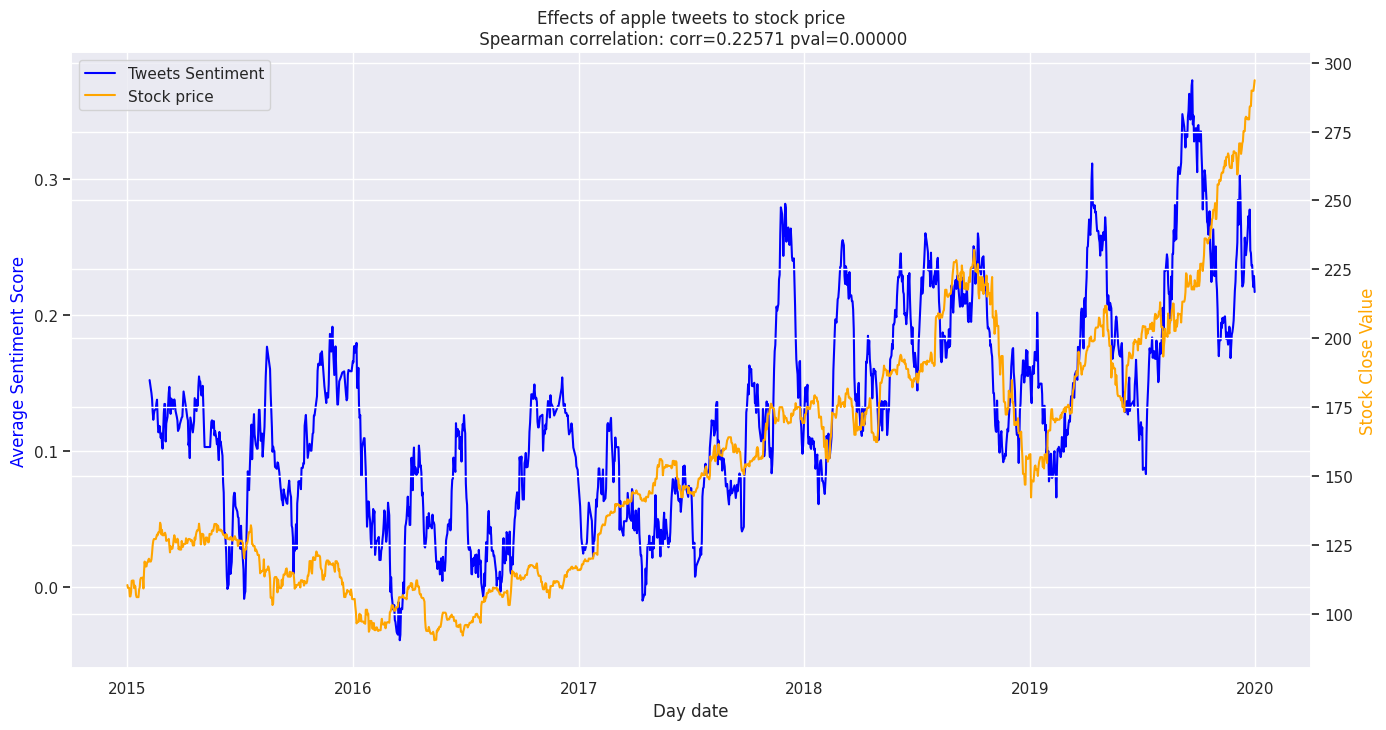

--------------------------------------------------
Generating plot for AMZN using Afinn score...


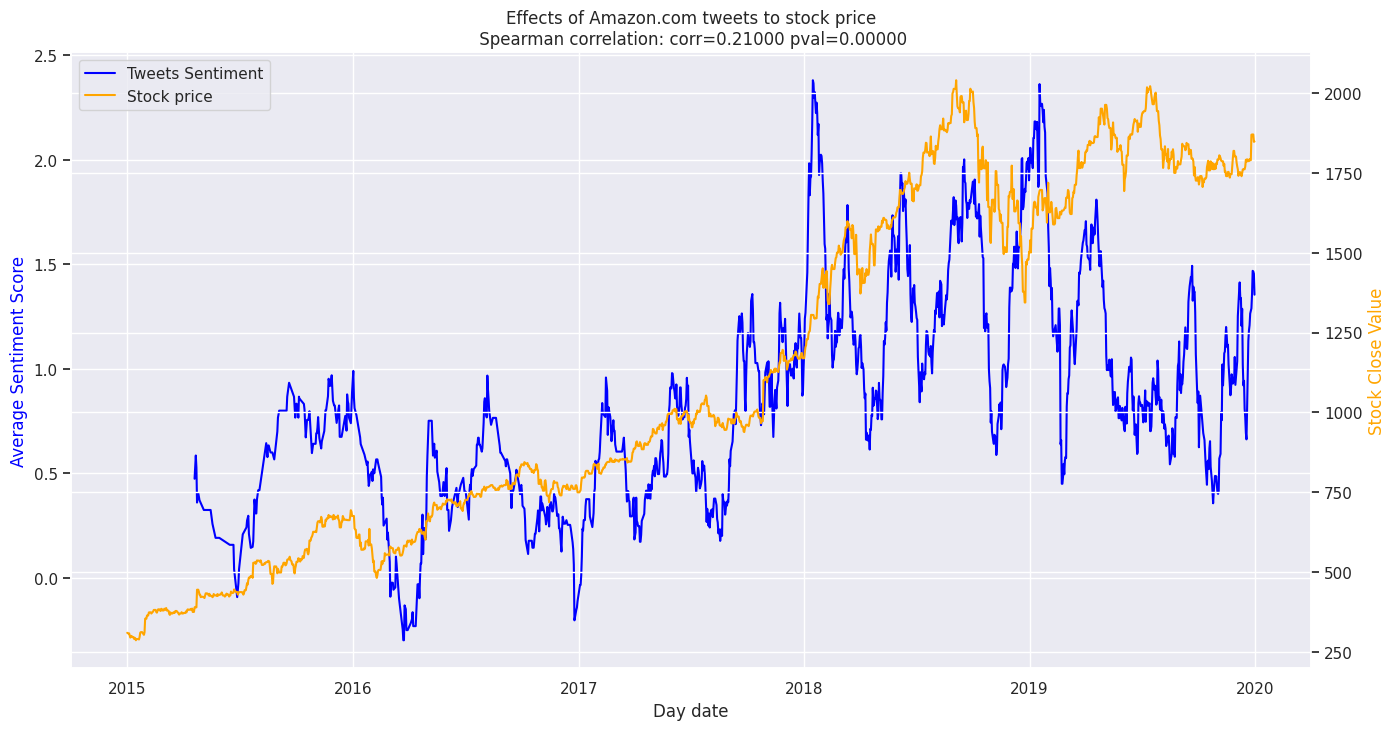


Generating plot for AMZN using Vander score...


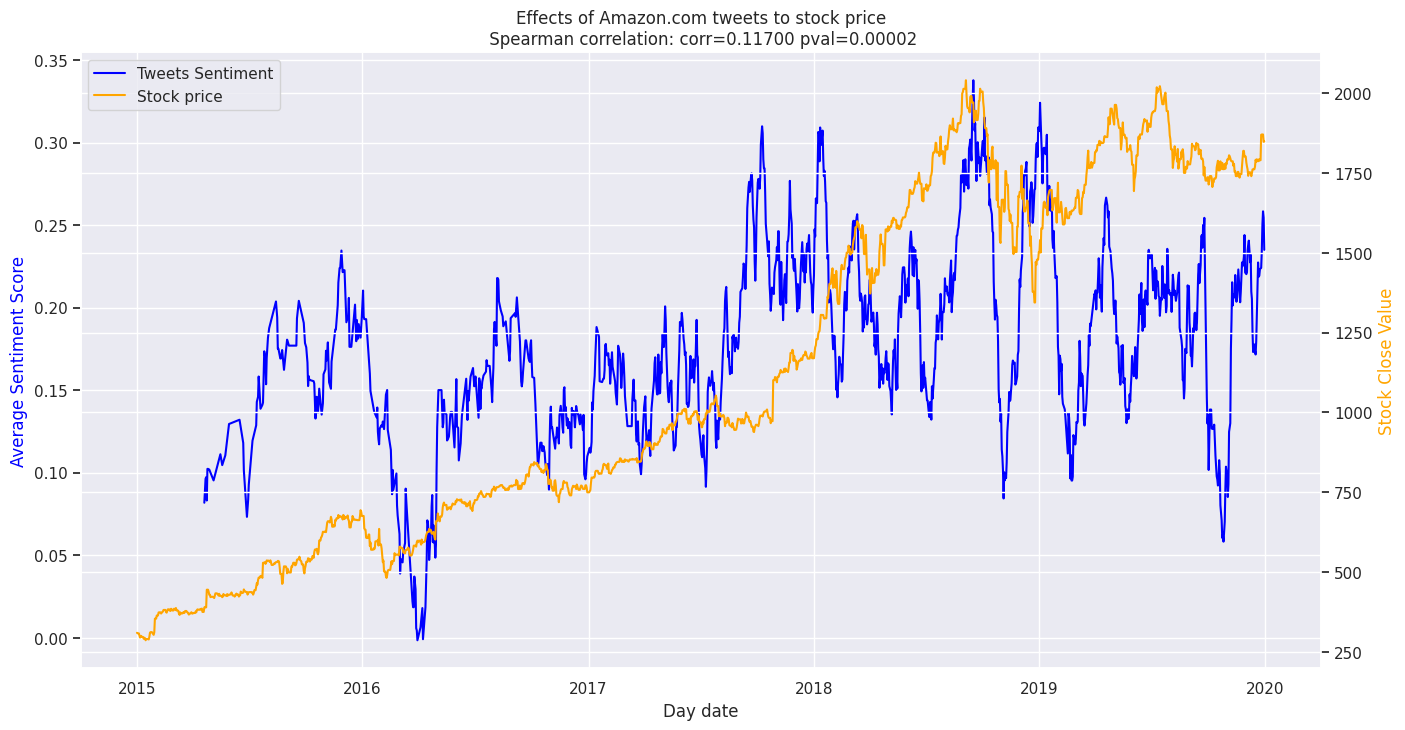

--------------------------------------------------
Generating plot for GOOGL using Afinn score...


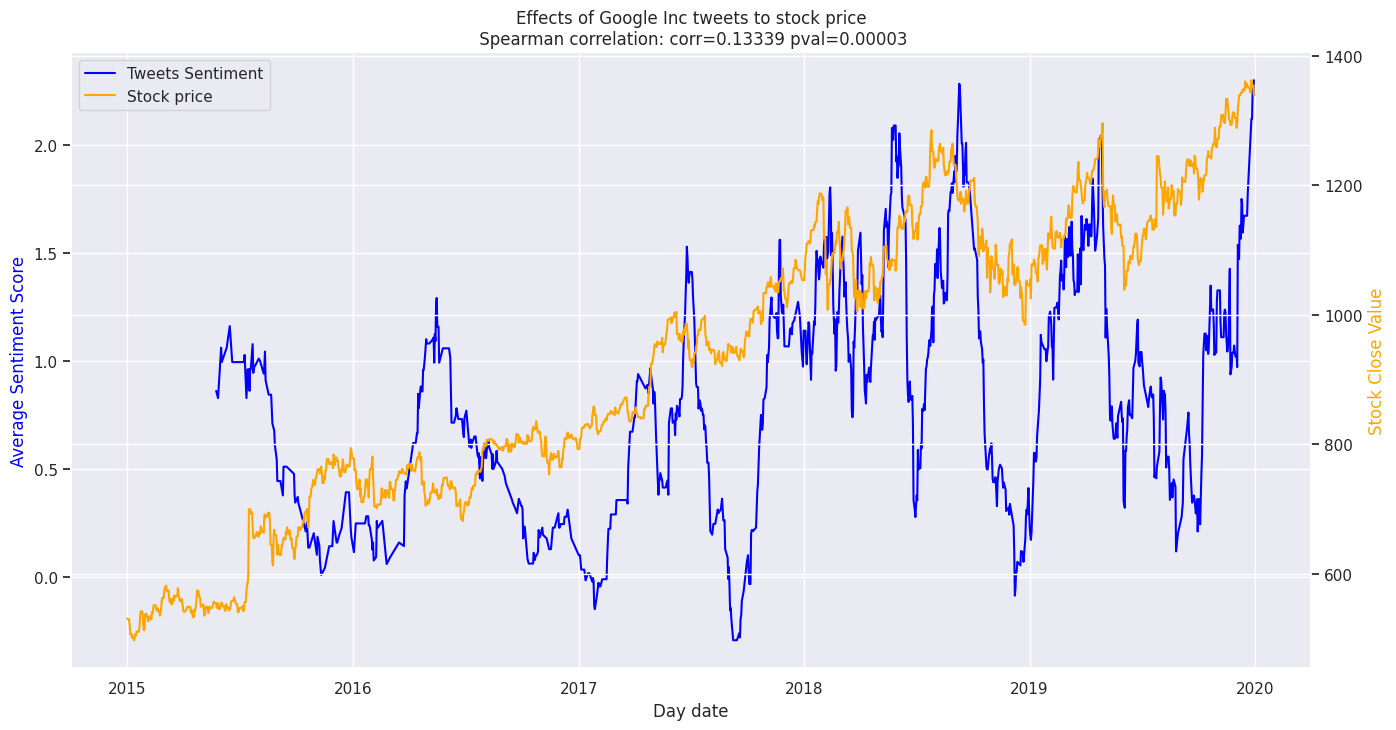


Generating plot for GOOGL using Vander score...


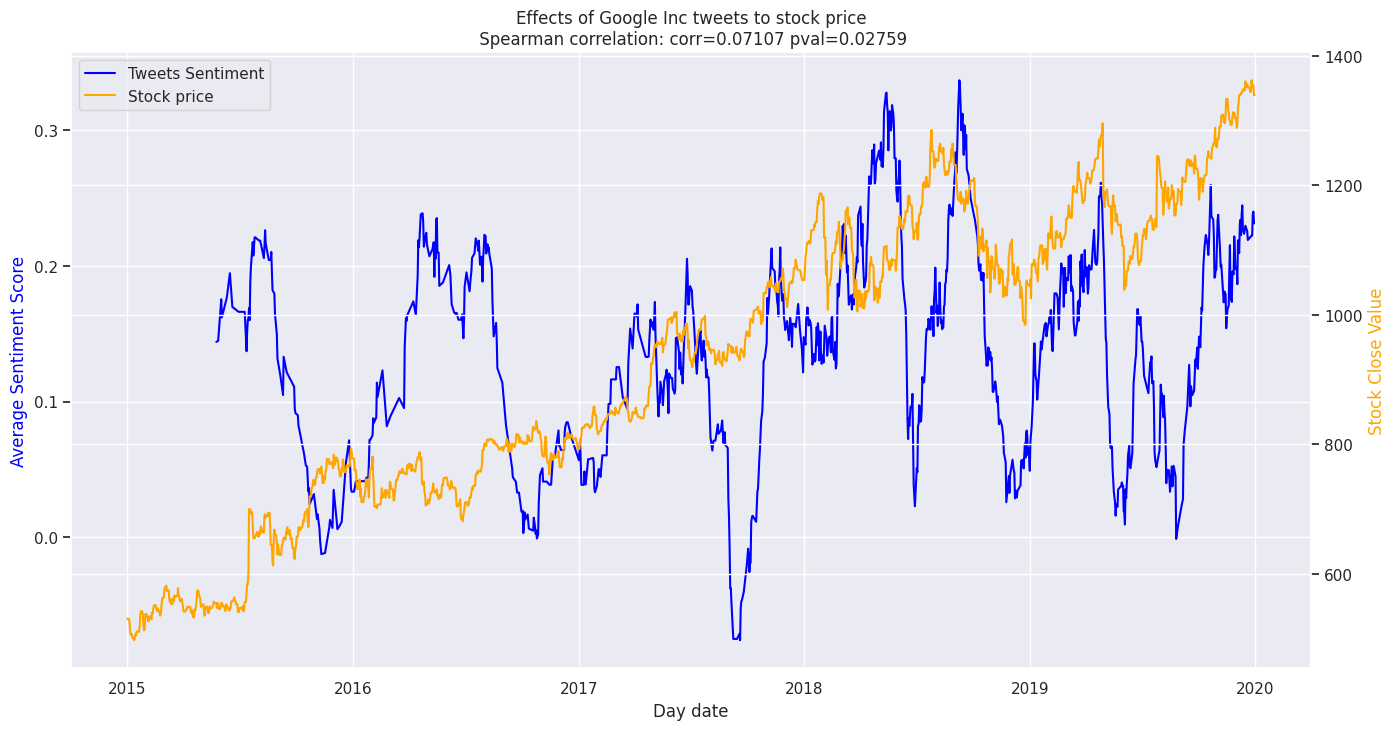

--------------------------------------------------
Generating plot for GOOG using Afinn score...


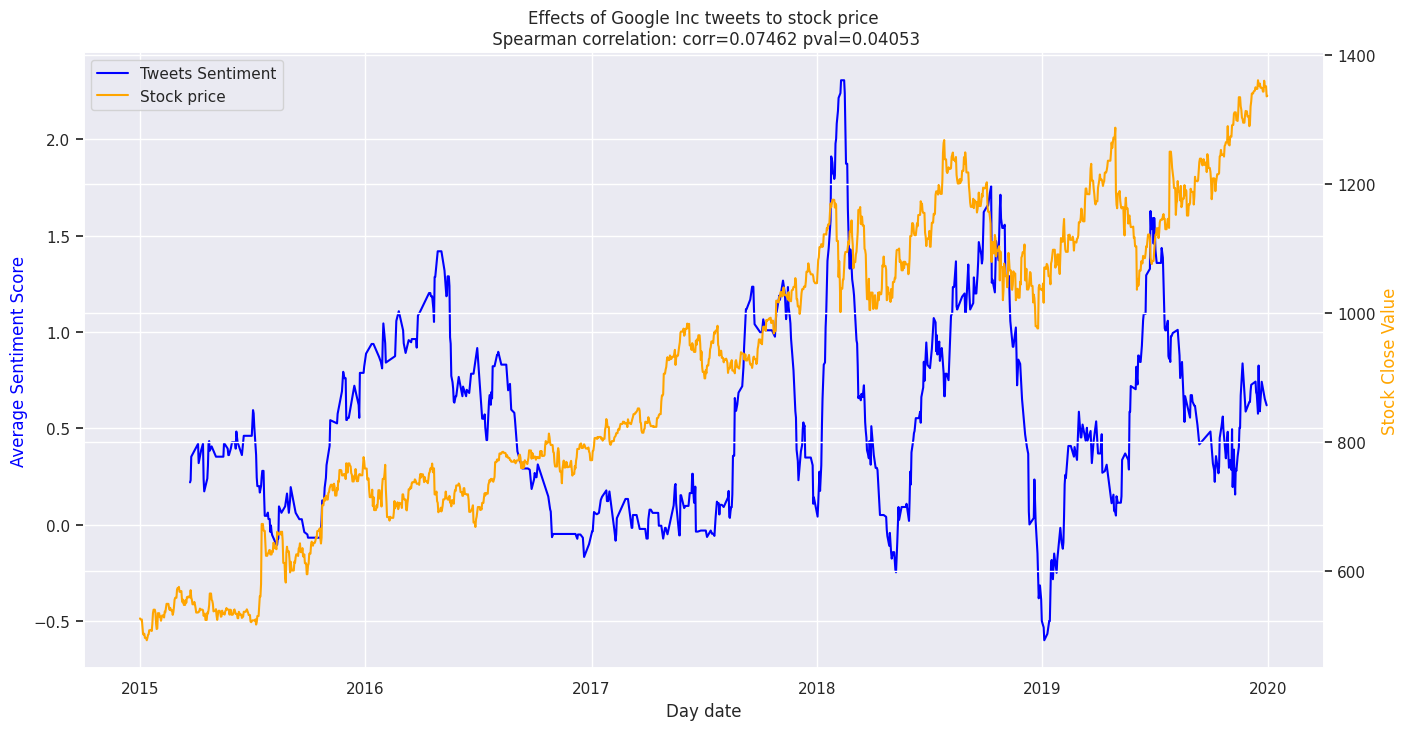


Generating plot for GOOG using Vander score...


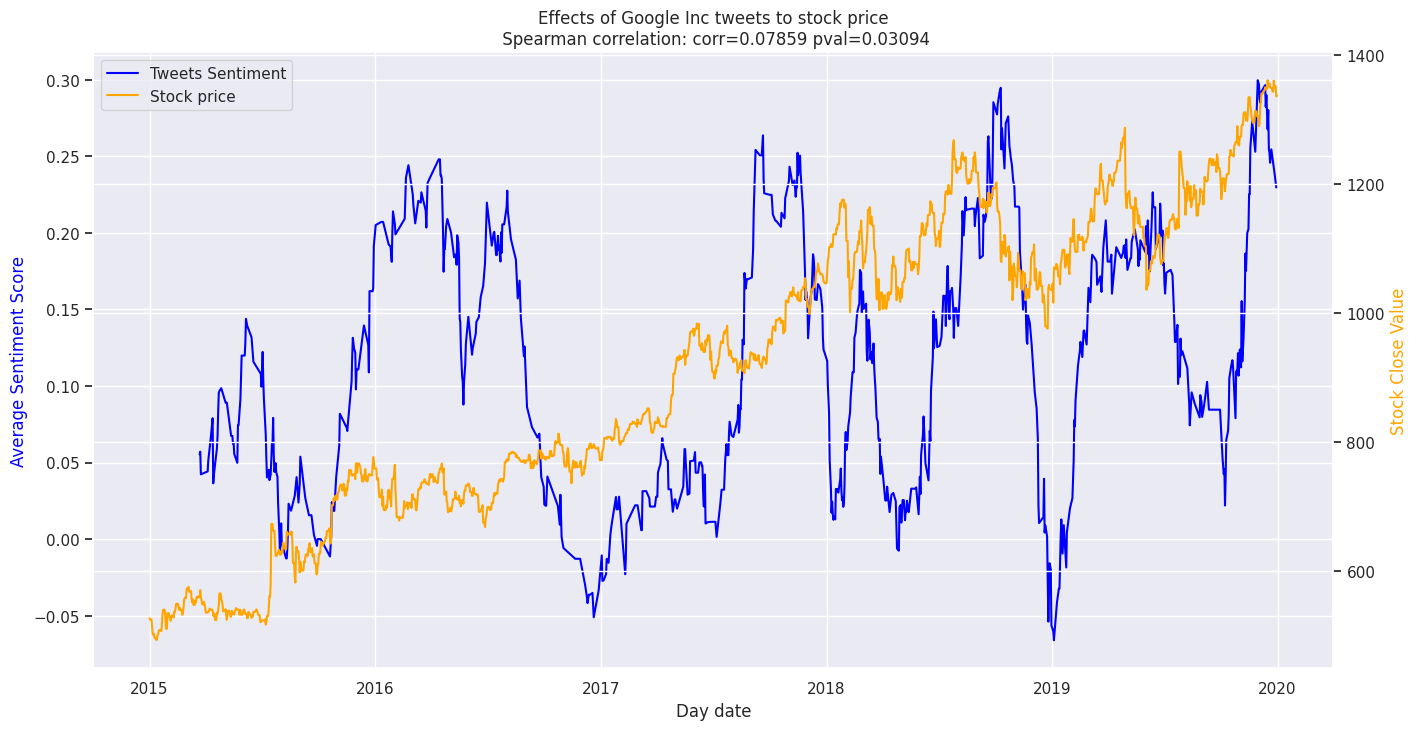

--------------------------------------------------
Generating plot for MSFT using Afinn score...


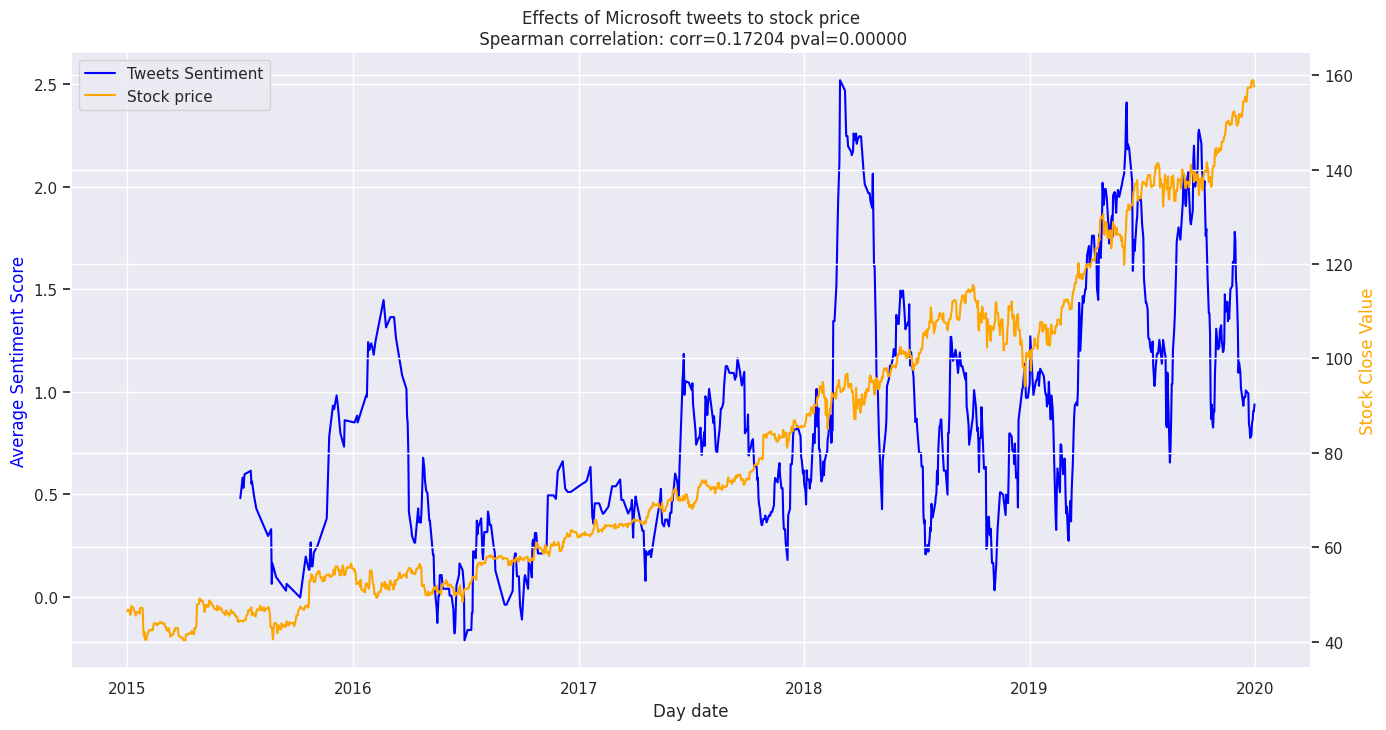


Generating plot for MSFT using Vander score...


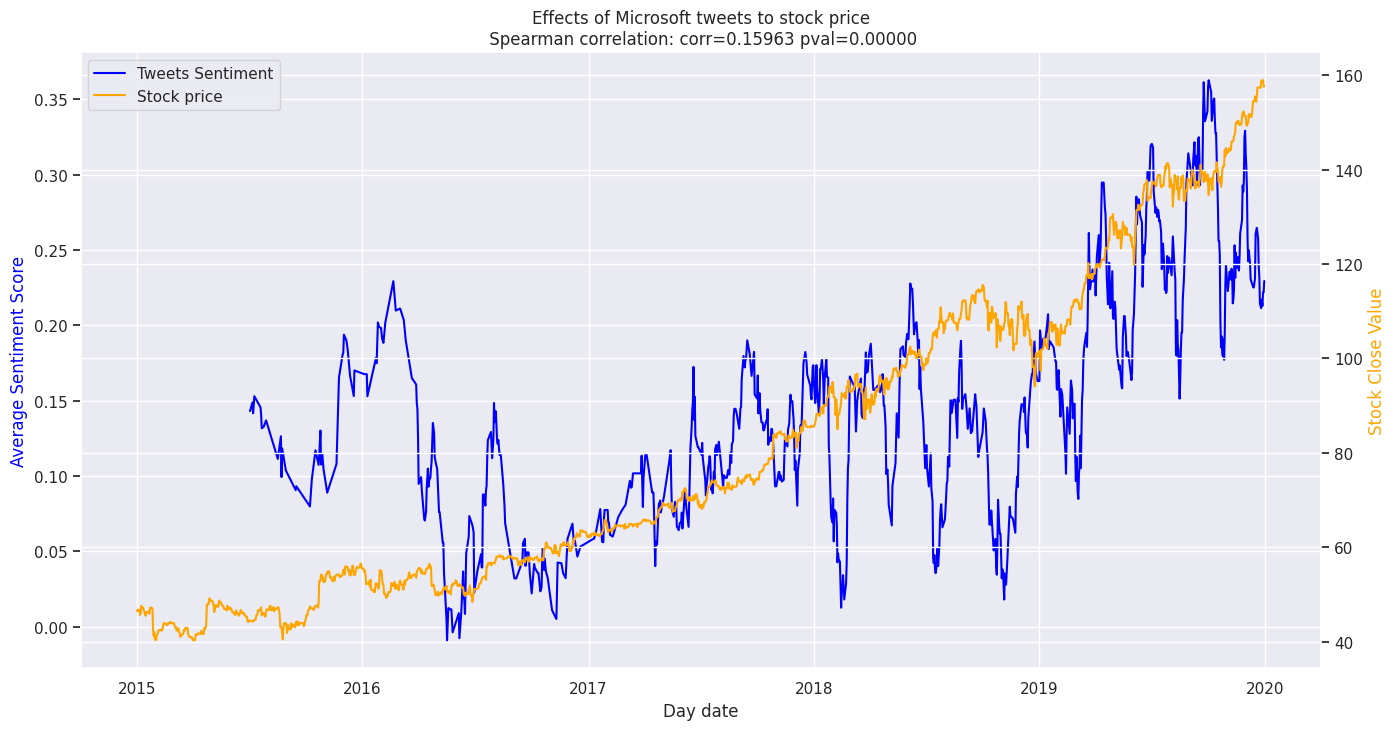

--------------------------------------------------
Generating plot for TSLA using Afinn score...


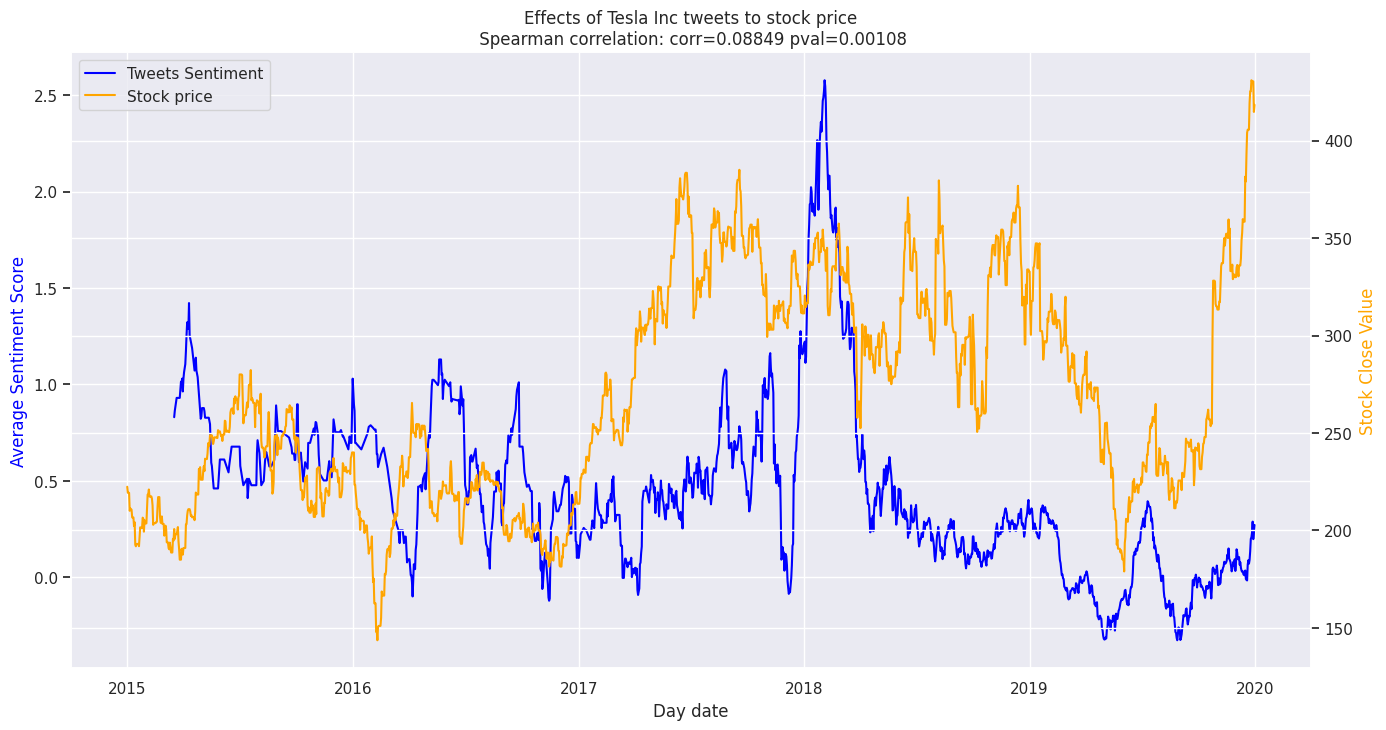


Generating plot for TSLA using Vander score...


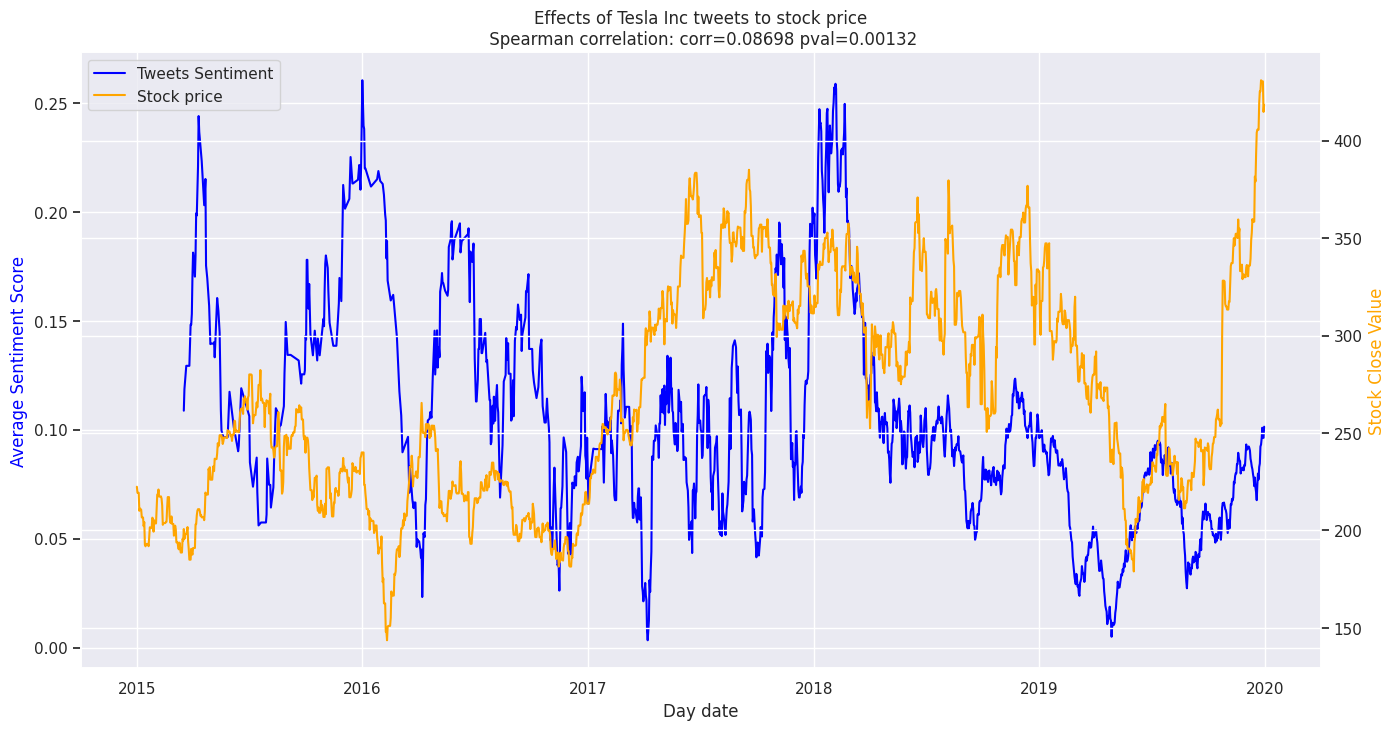

--------------------------------------------------


In [ ]:
# Get all unique ticker symbols from the tweet_df DataFrame
all_ticker_symbols = tweet_df['ticker_symbol'].unique()

# Iterate through each ticker symbol and call the plotting function
for ticker_symbol in all_ticker_symbols:
    print(f"Generating plot for {ticker_symbol} using Afinn score...")
    # Plot using Afinn score
    sentiment_stock_correlation_plot(tweet_df, stock_df, ticker_symbol, 'afinn_score')

    print(f"\nGenerating plot for {ticker_symbol} using Vander score...")
    # Plot using Vander score (using the corrected column name 'vander_score')
    sentiment_stock_correlation_plot(tweet_df, stock_df, ticker_symbol, 'vander_score')

    print("-" * 50) # Print a separator for clarity

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    classification_report
)

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}


In [ ]:
# --- Improved Stock Prediction Model with Bug Fixes ---

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    classification_report
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# 1. Enhanced Feature Engineering with Bug Fixes
print("Creating sentiment aggregations...")
daily_sentiment_agg = tweet_df.groupby(['day_date', 'ticker_symbol']).agg(
    avg_daily_vader_sentiment=('vander_score', 'mean'),
    sum_daily_vader_sentiment=('vander_score', 'sum'),
    tweet_count=('tweet', 'count'),
    avg_total_engagement=('total_engangement', 'mean'),
    sum_total_engagement=('total_engangement', 'sum'),
    positive_tweet_count=('vander_sentiment', lambda x: (x == 'Positive').sum()),
    negative_tweet_count=('vander_sentiment', lambda x: (x == 'Negative').sum()),
    # Additional features for better prediction
    max_engagement=('total_engangement', 'max'),
    std_sentiment=('vander_score', 'std'),
    sentiment_range=('vander_score', lambda x: x.max() - x.min())
).reset_index()

# Fill NaN values in std_sentiment (happens when only 1 tweet per day)
daily_sentiment_agg['std_sentiment'] = daily_sentiment_agg['std_sentiment'].fillna(0)
daily_sentiment_agg['sentiment_range'] = daily_sentiment_agg['sentiment_range'].fillna(0)

print(f"Sentiment aggregation shape: {daily_sentiment_agg.shape}")
print(f"Date range in sentiment data: {daily_sentiment_agg['day_date'].min()} to {daily_sentiment_agg['day_date'].max()}")

# 2. Prepare stock data with improved target definition
print("\nPreparing stock data...")
stock_df_sorted = stock_df.sort_values(by=['ticker_symbol', 'day_date'])
stock_df_sorted['close_value_prev_day'] = stock_df_sorted.groupby('ticker_symbol')['close_value'].shift(1)
stock_df_sorted['daily_change'] = stock_df_sorted['close_value'] - stock_df_sorted['close_value_prev_day']
stock_df_sorted['daily_return'] = stock_df_sorted['daily_change'] / stock_df_sorted['close_value_prev_day']

# Improved target definition with threshold to reduce noise
threshold = 0.005  # 0.5% threshold for significant movement
stock_df_sorted['price_movement'] = 0  # Default to no significant movement
stock_df_sorted.loc[stock_df_sorted['daily_return'] > threshold, 'price_movement'] = 1  # Up
stock_df_sorted.loc[stock_df_sorted['daily_return'] < -threshold, 'price_movement'] = 0  # Down/Neutral

print(f"Stock data shape: {stock_df_sorted.shape}")
print(f"Date range in stock data: {stock_df_sorted['day_date'].min()} to {stock_df_sorted['day_date'].max()}")

# 3. Proper merge with clear column handling
print("\nMerging sentiment and stock data...")

# Create a copy of sentiment data for shifting
sentiment_for_merge = daily_sentiment_agg.copy()
sentiment_for_merge['prediction_date'] = sentiment_for_merge['day_date'] + pd.Timedelta(days=1)

# Merge: Use sentiment from day T to predict stock movement on day T+1
merged_df = pd.merge(
    sentiment_for_merge,
    stock_df_sorted[['day_date', 'ticker_symbol', 'price_movement', 'daily_return']],
    left_on=['prediction_date', 'ticker_symbol'],
    right_on=['day_date', 'ticker_symbol'],
    how='inner',
    suffixes=('_sentiment', '_stock')
)

# Clean up column names
merged_df = merged_df.rename(columns={
    'day_date_sentiment': 'sentiment_date',
    'day_date_stock': 'prediction_date'
})

# Remove unnecessary columns
merged_df = merged_df.drop(columns=['prediction_date'])

# Remove rows with missing values
print(f"Merged data shape before cleaning: {merged_df.shape}")
merged_df = merged_df.dropna()
print(f"Merged data shape after cleaning: {merged_df.shape}")

# 4. Check data quality and distribution
print(f"\nData quality check:")
print(f"Date range: {merged_df['sentiment_date'].min()} to {merged_df['sentiment_date'].max()}")
print(f"Number of unique tickers: {merged_df['ticker_symbol'].nunique()}")
print(f"Total observations: {len(merged_df)}")

# Check class distribution
print("\nTarget variable distribution:")
print(merged_df['price_movement'].value_counts(normalize=True))
print(merged_df['price_movement'].value_counts())

# 5. Feature selection and preparation
feature_columns = [
    'avg_daily_vader_sentiment', 'sum_daily_vader_sentiment',
    'tweet_count', 'avg_total_engagement', 'sum_total_engagement',
    'positive_tweet_count', 'negative_tweet_count',
    'max_engagement', 'std_sentiment', 'sentiment_range'
]

X = merged_df[feature_columns].copy()
y = merged_df['price_movement'].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Check for any remaining NaN or infinite values
print(f"NaN values in X: {X.isnull().sum().sum()}")
print(f"Infinite values in X: {np.isinf(X).sum().sum()}")

# Replace any infinite values with NaN and then drop
X = X.replace([np.inf, -np.inf], np.nan)
mask = ~(X.isnull().any(axis=1) | y.isnull())
X = X[mask]
y = y[mask]

print(f"Final dataset shape after cleaning: X={X.shape}, y={y.shape}")

# 6. Improved model configuration
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=42,
        class_weight='balanced'
    ),
    'SVM': SVC(
        probability=True,
        class_weight='balanced',
        random_state=42,
        kernel='rbf'
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        eval_metric='logloss',
        # Only set scale_pos_weight if the positive class exists
        scale_pos_weight=len(y[y==0])/len(y[y==1]) if len(y[y==1]) > 0 else 1
    )
}

# 7. Time series cross-validation with proper date sorting
print(f"\n=== Starting Time Series Cross-Validation ===")

# Sort by date to ensure proper time series order
merged_df_sorted = merged_df.sort_values('sentiment_date').reset_index(drop=True)
X_sorted = X.loc[merged_df_sorted.index].reset_index(drop=True)
y_sorted = y.loc[merged_df_sorted.index].reset_index(drop=True)

# Use TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3, test_size=None)

results = []
scaler = StandardScaler()

# Get all splits first to understand the data distribution
splits = list(tscv.split(X_sorted))
print(f"Total splits: {len(splits)}")

for split_idx, (train_index, test_index) in enumerate(splits):
    print(f"\n--- Split {split_idx + 1} ---")

    # Get train/test data
    X_train, X_test = X_sorted.iloc[train_index], X_sorted.iloc[test_index]
    y_train, y_test = y_sorted.iloc[train_index], y_sorted.iloc[test_index]

    # Scale features
    scaler.fit(X_train) # Fit only on training data
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert back to DataFrames for consistency (optional but good practice)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


    # Print split information
    train_dates = merged_df_sorted.iloc[train_index]['sentiment_date']
    test_dates = merged_df_sorted.iloc[test_index]['sentiment_date']

    print(f"Train period: {train_dates.min()} to {train_dates.max()} ({len(train_index)} samples)")
    print(f"Test period:  {test_dates.min()} to {test_dates.max()} ({len(test_index)} samples)")
    print(f"Train class distribution: {y_train.value_counts().to_dict()}")
    print(f"Test class distribution:  {y_test.value_counts().to_dict()}")

    # Base metrics dictionary initialized outside the inner loop
    base_split_metrics = {
        'Split': split_idx + 1,
        'Accuracy': None,
        'Precision': None,
        'Recall': None,
        'F1 Score': None,
        'ROC AUC': None,
        'Confusion Matrix': None, # Always include the key, even if None
        'Train Size': len(train_index),
        'Test Size': len(test_index)
    }

    # Check if we have both classes in train set (needed for fitting most models)
    if len(y_train.unique()) < 2:
        print("Warning: Training set doesn't contain both classes. Skipping model training for this split.")
        # Append the placeholder metrics for each model and continue to the next split
        for model_name in models.keys():
             split_metrics_copy = base_split_metrics.copy() # Copy the base dictionary
             split_metrics_copy['Model'] = model_name     # Assign the model name
             results.append(split_metrics_copy)
        continue # Go to the next split


    # Train and evaluate models
    for model_name, model in models.items():
        # Create a fresh copy of the base metrics for the current model
        current_model_metrics = base_split_metrics.copy()
        current_model_metrics['Model'] = model_name # Assign the model name here

        try:
            print(f"\nTraining {model_name}...")

            # Fit model
            model.fit(X_train_scaled, y_train)

            # Make predictions
            y_pred = model.predict(X_test_scaled)
            y_proba = model.predict_proba(X_test_scaled) if hasattr(model, 'predict_proba') else None

            # Calculate metrics
            acc = accuracy_score(y_test, y_pred)
            current_model_metrics['Accuracy'] = acc

            # Only calculate other metrics if both classes are present in test set
            if len(y_test.unique()) > 1:
                # Use weighted average as recommended for imbalanced classes
                prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
                f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
                auc = roc_auc_score(y_test, y_proba[:, 1]) if y_proba is not None else None
                cm = confusion_matrix(y_test, y_pred)

                current_model_metrics['Precision'] = prec
                current_model_metrics['Recall'] = rec
                current_model_metrics['F1 Score'] = f1
                current_model_metrics['ROC AUC'] = auc
                current_model_metrics['Confusion Matrix'] = cm # Store the matrix

                # Print results
                print(f"  Accuracy: {acc:.4f}")
                print(f"  Precision (weighted): {prec:.4f}")
                print(f"  Recall (weighted): {rec:.4f}")
                print(f"  F1 Score (weighted): {f1:.4f}")
                print(f"  ROC AUC: {auc:.4f}" if auc is not None else "  ROC AUC: N/A")
                print(f"  Confusion Matrix:\n{cm}")
                print(f"  Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}") # Detailed report

            else:
                print(f"  Accuracy: {acc:.4f} (Test set contains only one class, skipping other metrics)")
                current_model_metrics['Confusion Matrix'] = confusion_matrix(y_test, y_pred) # Still calculate CM if possible

            # Store results for this model and split
            results.append(current_model_metrics)


        except Exception as e:
            print(f"Error training {model_name}: {str(e)}")
            # Append the placeholder metrics if an error occurred during training
            results.append(current_model_metrics)
            continue # Continue to the next model or split


# 8. Results analysis
if results:
    results_df = pd.DataFrame(results)

    print(f"\n\n=== SUMMARY OF RESULTS ===")
    print("Average performance across all splits:")
    # Calculate mean and std, dropping columns that don't support it (like CM)
    summary_columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
    summary = results_df.groupby('Model')[summary_columns].agg(['mean', 'std']).round(4)
    print(summary)

    print(f"\nDetailed results by split:")
    # Print detailed results, excluding the Confusion Matrix column for cleaner output
    print(results_df.drop(columns=['Confusion Matrix']).to_string(index=False))

    # Feature importance for tree-based models
    print(f"\n=== FEATURE IMPORTANCE (Random Forest from the last split) ===")
    # Note: Feature importance is based on the model trained on the *last* fold
    if 'Random Forest' in models:
        rf_model = models['Random Forest']
        # Check if the model was actually trained (might fail if all splits skipped)
        if hasattr(rf_model, 'feature_importances_') and rf_model.feature_importances_ is not None:
            feature_importance = pd.DataFrame({
                'feature': feature_columns,
                'importance': rf_model.feature_importances_
            }).sort_values('importance', ascending=False)
            print(feature_importance)
        else:
            print("Random Forest model was not successfully trained in the last split.")

    print(f"\n=== FEATURE IMPORTANCE (XGBoost from the last split) ===")
     # Note: Feature importance is based on the model trained on the *last* fold
    if 'XGBoost' in models:
        xgb_model = models['XGBoost']
         # Check if the model was actually trained
        if hasattr(xgb_model, 'feature_importances_') and xgb_model.feature_importances_ is not None:
            feature_importance = pd.DataFrame({
                'feature': feature_columns,
                'importance': xgb_model.feature_importances_
            }).sort_values('importance', ascending=False)
            print(feature_importance)
        else:
            print("XGBoost model was not successfully trained in the last split.")

else:
    print("No results generated. Please check your data, TimeSeriesSplit configuration, and model training loop.")

# 9. Additional diagnostics
print(f"\n=== DATA DIAGNOSTICS ===")
print(f"Feature statistics:")
print(X.describe())

print(f"\nFeature correlations with target:")
for col in X.columns:
    try:
        # Calculate correlation only if the feature has variation
        if X[col].std() > 0:
             # Use Spearman correlation as it's less sensitive to outliers and non-linearity
            corr, _ = stats.spearmanr(X[col].dropna(), y[X[col].dropna().index])
            print(f"{col}: {corr:.4f}")
        else:
            print(f"{col}: No variation (correlation not applicable)")
    except Exception as e:
        print(f"Could not calculate correlation for {col}: {e}")

Creating sentiment aggregations...
Sentiment aggregation shape: (6751, 12)
Date range in sentiment data: 2015-01-01 00:00:00 to 2019-12-31 00:00:00

Preparing stock data...
Stock data shape: (10956, 11)
Date range in stock data: 2015-01-01 00:00:00 to 2019-12-31 00:00:00

Merging sentiment and stock data...
Merged data shape before cleaning: (6747, 14)
Merged data shape after cleaning: (6747, 14)

Data quality check:
Date range: 2015-01-01 00:00:00 to 2019-12-30 00:00:00
Number of unique tickers: 6
Total observations: 6747

Target variable distribution:
price_movement
0    0.733659
1    0.266341
Name: proportion, dtype: float64
price_movement
0    4950
1    1797
Name: count, dtype: int64

Feature matrix shape: (6747, 10)
Target vector shape: (6747,)
NaN values in X: 0
Infinite values in X: 0
Final dataset shape after cleaning: X=(6747, 10), y=(6747,)

=== Starting Time Series Cross-Validation ===
Total splits: 3

--- Split 1 ---
Train period: 2015-01-01 00:00:00 to 2016-10-05 00:00:00 

In [ ]:
# This cell remains the same, but the previous cell is fixed to prevent the KeyError
results_df = pd.DataFrame(results).drop(columns=['Confusion Matrix'])
print(results_df)

    Split  Accuracy  Precision    Recall  F1 Score   ROC AUC  Train Size  \
0       1  0.535587   0.621838  0.535587  0.565108  0.525588        1689   
1       1  0.631673   0.631965  0.631673  0.631819  0.520237        1689   
2       1  0.532622   0.651949  0.532622  0.564155  0.534747        1689   
3       1  0.566429   0.627891  0.566429  0.589989  0.507010        1689   
4       2  0.534994   0.603550  0.534994  0.558282  0.500156        3375   
5       2  0.659549   0.611737  0.659549  0.628667  0.506570        3375   
6       2  0.566429   0.590258  0.566429  0.577096  0.500605        3375   
7       2  0.604982   0.612313  0.604982  0.608506  0.513153        3375   
8       3  0.549822   0.603215  0.549822  0.570182  0.508272        5061   
9       3  0.621590   0.601670  0.621590  0.610709  0.501327        5061   
10      3  0.526690   0.618107  0.526690  0.553106  0.534246        5061   
11      3  0.584223   0.611524  0.584223  0.596098  0.503742        5061   

    Test Si

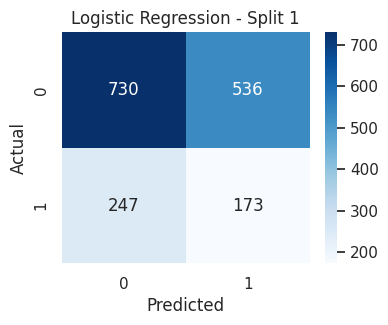

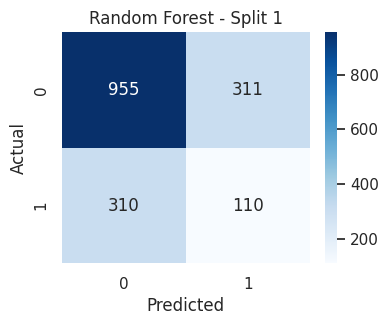

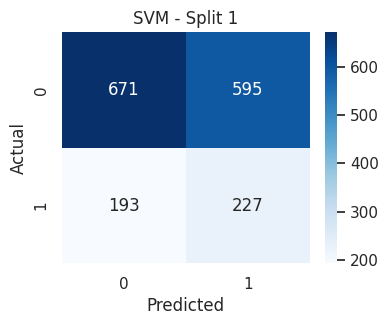

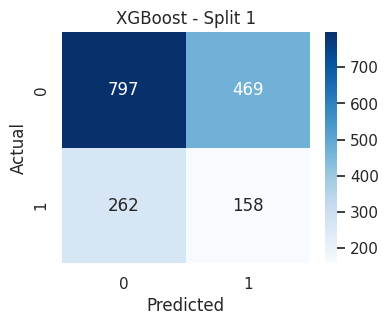

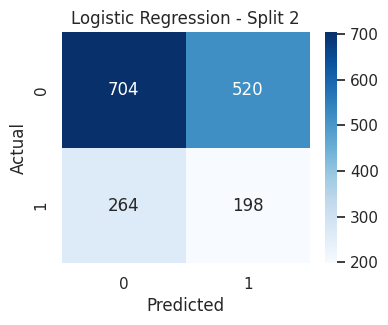

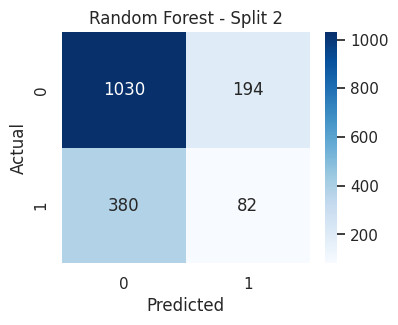

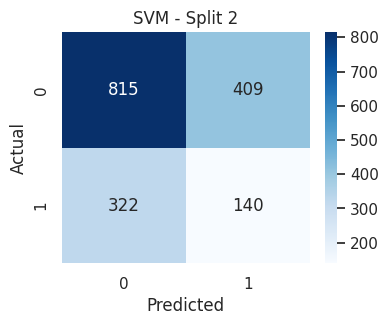

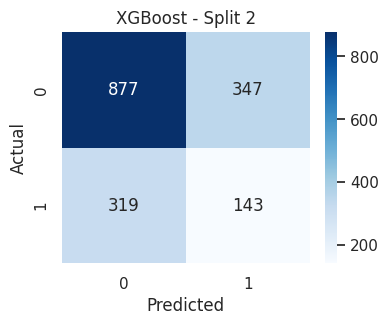

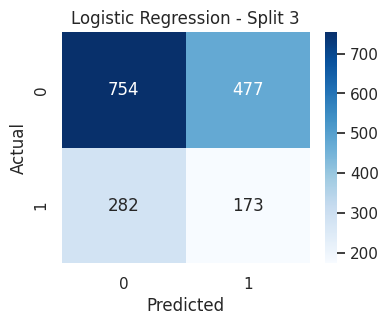

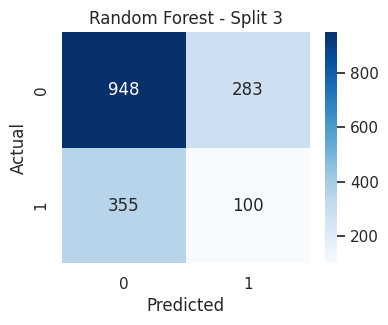

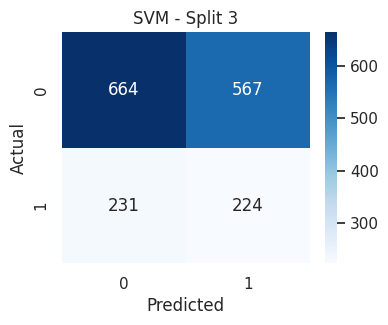

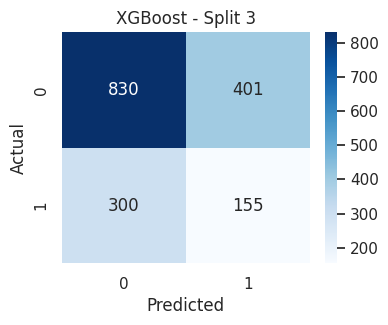

In [ ]:
for res in results:
    plt.figure(figsize=(4,3))
    sns.heatmap(res['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    # Change 'Split' to 'Split Index' --> corrected back to 'Split'
    plt.title(f"{res['Model']} - Split {res['Split']}") # Changed 'Split Index' to 'Split'
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
# --- Improved Stock Prediction Model with Bug Fixes ---

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    classification_report
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# 1. Enhanced Feature Engineering with Bug Fixes
print("Creating sentiment aggregations...")
daily_sentiment_agg = tweet_df.groupby(['day_date', 'ticker_symbol']).agg(
    avg_daily_vader_sentiment=('vander_score', 'mean'),
    sum_daily_vader_sentiment=('vander_score', 'sum'),
    tweet_count=('tweet', 'count'),
    avg_total_engagement=('total_engangement', 'mean'),
    sum_total_engagement=('total_engangement', 'sum'),
    positive_tweet_count=('vander_sentiment', lambda x: (x == 'Positive').sum()),
    negative_tweet_count=('vander_sentiment', lambda x: (x == 'Negative').sum()),
    # Additional features for better prediction
    max_engagement=('total_engangement', 'max'),
    std_sentiment=('vander_score', 'std'),
    sentiment_range=('vander_score', lambda x: x.max() - x.min())
).reset_index()

# Fill NaN values in std_sentiment (happens when only 1 tweet per day)
daily_sentiment_agg['std_sentiment'] = daily_sentiment_agg['std_sentiment'].fillna(0)
daily_sentiment_agg['sentiment_range'] = daily_sentiment_agg['sentiment_range'].fillna(0)

print(f"Sentiment aggregation shape: {daily_sentiment_agg.shape}")
print(f"Date range in sentiment data: {daily_sentiment_agg['day_date'].min()} to {daily_sentiment_agg['day_date'].max()}")

# 2. Prepare stock data with improved target definition
print("\nPreparing stock data...")
stock_df_sorted = stock_df.sort_values(by=['ticker_symbol', 'day_date'])
stock_df_sorted['close_value_prev_day'] = stock_df_sorted.groupby('ticker_symbol')['close_value'].shift(1)
stock_df_sorted['daily_change'] = stock_df_sorted['close_value'] - stock_df_sorted['close_value_prev_day']
stock_df_sorted['daily_return'] = stock_df_sorted['daily_change'] / stock_df_sorted['close_value_prev_day']

# Improved target definition with threshold to reduce noise
threshold = 0.005  # 0.5% threshold for significant movement
stock_df_sorted['price_movement'] = 0  # Default to no significant movement
stock_df_sorted.loc[stock_df_sorted['daily_return'] > threshold, 'price_movement'] = 1  # Up
stock_df_sorted.loc[stock_df_sorted['daily_return'] < -threshold, 'price_movement'] = 0  # Down/Neutral

print(f"Stock data shape: {stock_df_sorted.shape}")
print(f"Date range in stock data: {stock_df_sorted['day_date'].min()} to {stock_df_sorted['day_date'].max()}")

# 3. Proper merge with clear column handling
print("\nMerging sentiment and stock data...")

# Create a copy of sentiment data for shifting
sentiment_for_merge = daily_sentiment_agg.copy()
sentiment_for_merge['prediction_date'] = sentiment_for_merge['day_date'] + pd.Timedelta(days=1)

# Merge: Use sentiment from day T to predict stock movement on day T+1
# Keep prediction_date for plotting later
merged_df = pd.merge(
    sentiment_for_merge,
    stock_df_sorted[['day_date', 'ticker_symbol', 'price_movement', 'daily_return']],
    left_on=['prediction_date', 'ticker_symbol'],
    right_on=['day_date', 'ticker_symbol'],
    how='inner',
    suffixes=('_sentiment', '_stock')
)

# Clean up column names
merged_df = merged_df.rename(columns={
    'day_date_sentiment': 'sentiment_date',
    'day_date_stock': 'stock_date_for_merge' # Rename this to avoid confusion, will be dropped later
})

# The 'stock_date_for_merge' column is the same as 'prediction_date' after the merge,
# so we can drop it. We keep 'prediction_date'.
merged_df = merged_df.drop(columns=['stock_date_for_merge'])


# Remove rows with missing values
print(f"Merged data shape before cleaning: {merged_df.shape}")
merged_df = merged_df.dropna()
print(f"Merged data shape after cleaning: {merged_df.shape}")

# 4. Check data quality and distribution
print(f"\nData quality check:")
print(f"Date range: {merged_df['sentiment_date'].min()} to {merged_df['sentiment_date'].max()}")
print(f"Number of unique tickers: {merged_df['ticker_symbol'].nunique()}")
print(f"Total observations: {len(merged_df)}")

# Check class distribution
print("\nTarget variable distribution:")
print(merged_df['price_movement'].value_counts(normalize=True))
print(merged_df['price_movement'].value_counts())

# 5. Feature selection and preparation
feature_columns = [
    'avg_daily_vader_sentiment', 'sum_daily_vader_sentiment',
    'tweet_count', 'avg_total_engagement', 'sum_total_engagement',
    'positive_tweet_count', 'negative_tweet_count',
    'max_engagement', 'std_sentiment', 'sentiment_range'
]

# Keep prediction_date and ticker_symbol with the data for plotting
data_columns = feature_columns + ['prediction_date', 'ticker_symbol']

X = merged_df[data_columns].copy() # Select relevant columns
y = merged_df['price_movement'].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Check for any remaining NaN or infinite values
print(f"NaN values in X: {X.isnull().sum().sum()}")
print(f"Infinite values in X: {np.isinf(X.select_dtypes(include=np.number)).sum().sum()}") # Only check numeric columns

# Replace any infinite values with NaN and then drop
X = X.replace([np.inf, -np.inf], np.nan)
# Check for NaNs across all columns before dropping
mask = ~(X.isnull().any(axis=1) | y.isnull())
X = X[mask]
y = y[mask]

print(f"Final dataset shape after cleaning: X={X.shape}, y={y.shape}")

# 6. Improved model configuration
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=42,
        class_weight='balanced'
    ),
    'SVM': SVC(
        probability=True,
        class_weight='balanced',
        random_state=42,
        kernel='rbf'
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        eval_metric='logloss',
        # Only set scale_pos_weight if the positive class exists
        scale_pos_weight=len(y[y==0])/len(y[y==1]) if len(y[y==1]) > 0 else 1
    )
}

# 7. Time series cross-validation with proper date sorting
print(f"\n=== Starting Time Series Cross-Validation ===")

# Sort by date to ensure proper time series order
merged_df_sorted = merged_df.sort_values('sentiment_date').reset_index(drop=True)

# Separate features (excluding dates/tickers for training) and target
X_train_eval = merged_df_sorted[feature_columns].copy()
y_train_eval = merged_df_sorted['price_movement'].copy()

# Use TimeSeriesSplit on the evaluation features/target
tscv = TimeSeriesSplit(n_splits=3, test_size=None)

results = []
scaler = StandardScaler()

# Get all splits first to understand the data distribution
splits = list(tscv.split(X_train_eval))
print(f"Total splits: {len(splits)}")

# Store test indices and predictions for later plotting
all_test_indices = []
all_test_predictions = [] # To store predictions from the last trained model

for split_idx, (train_index, test_index) in enumerate(splits):
    print(f"\n--- Split {split_idx + 1} ---")

    # Store test index for later plotting
    all_test_indices.extend(test_index)

    # Get train/test data for scaling and model training
    X_train, X_test = X_train_eval.iloc[train_index], X_train_eval.iloc[test_index]
    y_train, y_test = y_train_eval.iloc[train_index], y_train_eval.iloc[test_index]

    # Scale features
    scaler.fit(X_train) # Fit only on training data
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Print split information
    train_dates = merged_df_sorted.iloc[train_index]['sentiment_date']
    test_dates = merged_df_sorted.iloc[test_index]['sentiment_date']

    print(f"Train period: {train_dates.min()} to {train_dates.max()} ({len(train_index)} samples)")
    print(f"Test period:  {test_dates.min()} to {test_dates.max()} ({len(test_index)} samples)")
    print(f"Train class distribution: {y_train.value_counts().to_dict()}")
    print(f"Test class distribution:  {y_test.value_counts().to_dict()}")

    # Base metrics dictionary initialized outside the inner loop
    base_split_metrics = {
        'Split': split_idx + 1,
        'Accuracy': None,
        'Precision': None,
        'Recall': None,
        'F1 Score': None,
        'ROC AUC': None,
        'Confusion Matrix': None, # Always include the key, even if None
        'Train Size': len(train_index),
        'Test Size': len(test_index)
    }

    # Check if we have both classes in train set (needed for fitting most models)
    if len(y_train.unique()) < 2:
        print("Warning: Training set doesn't contain both classes. Skipping model training for this split.")
        # Append the placeholder metrics for each model and continue to the next split
        for model_name in models.keys():
             split_metrics_copy = base_split_metrics.copy() # Copy the base dictionary
             split_metrics_copy['Model'] = model_name     # Assign the model name
             results.append(split_metrics_copy)
        continue # Go to the next split


    # Train and evaluate models
    for model_name, model in models.items():
        # Create a fresh copy of the base metrics for the current model
        current_model_metrics = base_split_metrics.copy()
        current_model_metrics['Model'] = model_name # Assign the model name here

        try:
            print(f"\nTraining {model_name}...")

            # Fit model
            model.fit(X_train_scaled, y_train)

            # Make predictions
            y_pred = model.predict(X_test_scaled)
            y_proba = model.predict_proba(X_test_scaled) if hasattr(model, 'predict_proba') else None

            # Calculate metrics
            acc = accuracy_score(y_test, y_pred)
            current_model_metrics['Accuracy'] = acc

            # Only calculate other metrics if both classes are present in test set
            if len(y_test.unique()) > 1:
                # Use weighted average as recommended for imbalanced classes
                prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
                f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
                auc = roc_auc_score(y_test, y_proba[:, 1]) if y_proba is not None else None
                cm = confusion_matrix(y_test, y_pred)

                current_model_metrics['Precision'] = prec
                current_model_metrics['Recall'] = rec
                current_model_metrics['F1 Score'] = f1
                current_model_metrics['ROC AUC'] = auc
                current_model_metrics['Confusion Matrix'] = cm # Store the matrix

                # Print results
                print(f"  Accuracy: {acc:.4f}")
                print(f"  Precision (weighted): {prec:.4f}")
                print(f"  Recall (weighted): {rec:.4f}")
                print(f"  F1 Score (weighted): {f1:.4f}")
                print(f"  ROC AUC: {auc:.4f}" if auc is not None else "  ROC AUC: N/A")
                print(f"  Confusion Matrix:\n{cm}")
                print(f"  Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}") # Detailed report

            else:
                print(f"  Accuracy: {acc:.4f} (Test set contains only one class, skipping other metrics)")
                current_model_metrics['Confusion Matrix'] = confusion_matrix(y_test, y_pred) # Still calculate CM if possible

            # Store results for this model and split
            results.append(current_model_metrics)


        except Exception as e:
            print(f"Error training {model_name}: {str(e)}")
            # Append the placeholder metrics if an error occurred during training
            results.append(current_model_metrics)
            continue # Continue to the next model or split

# After the loop, train the final model on the full sorted data to get predictions for plotting
print("\n=== Training Final Model for Plotting ===")
final_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    # Only set scale_pos_weight if the positive class exists
    scale_pos_weight=len(y_train_eval[y_train_eval==0])/len(y_train_eval[y_train_eval==1]) if len(y_train_eval[y_train_eval==1]) > 0 else 1
)

# Scale the full dataset
scaler_full = StandardScaler()
X_train_eval_scaled_full = scaler_full.fit_transform(X_train_eval)

# Fit the final model
final_model.fit(X_train_eval_scaled_full, y_train_eval)

# Make predictions on the *entire* dataset used for cross-validation
y_pred_full_data = final_model.predict(X_train_eval_scaled_full)


# 8. Results analysis
if results:
    results_df = pd.DataFrame(results)

    print(f"\n\n=== SUMMARY OF RESULTS ===")
    print("Average performance across all splits:")
    # Calculate mean and std, dropping columns that don't support it (like CM)
    summary_columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
    summary = results_df.groupby('Model')[summary_columns].agg(['mean', 'std']).round(4)
    print(summary)

    print(f"\nDetailed results by split:")
    # Print detailed results, excluding the Confusion Matrix column for cleaner output
    print(results_df.drop(columns=['Confusion Matrix']).to_string(index=False))

    # Feature importance for tree-based models
    print(f"\n=== FEATURE IMPORTANCE (Random Forest from the last split) ===")
    # Note: Feature importance is based on the model trained on the *last* fold
    if 'Random Forest' in models:
        rf_model = models['Random Forest']
        # Check if the model was actually trained (might fail if all splits skipped)
        if hasattr(rf_model, 'feature_importances_') and rf_model.feature_importances_ is not None:
            feature_importance = pd.DataFrame({
                'feature': feature_columns,
                'importance': rf_model.feature_importances_
            }).sort_values('importance', ascending=False)
            print(feature_importance)
        else:
            print("Random Forest model was not successfully trained in the last split.")

    print(f"\n=== FEATURE IMPORTANCE (XGBoost from the last split) ===")
     # Note: Feature importance is based on the model trained on the *last* fold
    if 'XGBoost' in models:
        xgb_model = models['XGBoost']
         # Check if the model was actually trained
        if hasattr(xgb_model, 'feature_importances_') and xgb_model.feature_importances_ is not None:
            feature_importance = pd.DataFrame({
                'feature': feature_columns,
                'importance': xgb_model.feature_importances_
            }).sort_values('importance', ascending=False)
            print(feature_importance)
        else:
            print("XGBoost model was not successfully trained in the last split.")

else:
    print("No results generated. Please check your data, TimeSeriesSplit configuration, and model training loop.")

# 9. Additional diagnostics
print(f"\n=== DATA DIAGNOSTICS ===")
# Use the full X_train_eval for description
print(f"Feature statistics:")
print(X_train_eval.describe())

print(f"\nFeature correlations with target:")
for col in X_train_eval.columns:
    try:
        # Calculate correlation only if the feature has variation
        if X_train_eval[col].std() > 0:
             # Use Spearman correlation as it's less sensitive to outliers and non-linearity
            corr, _ = stats.spearmanr(X_train_eval[col].dropna(), y_train_eval[X_train_eval[col].dropna().index])
            print(f"{col}: {corr:.4f}")
        else:
            print(f"{col}: No variation (correlation not applicable)")
    except Exception as e:
        print(f"Could not calculate correlation for {col}: {e}")

Creating sentiment aggregations...
Sentiment aggregation shape: (6751, 12)
Date range in sentiment data: 2015-01-01 00:00:00 to 2019-12-31 00:00:00

Preparing stock data...
Stock data shape: (10956, 11)
Date range in stock data: 2015-01-01 00:00:00 to 2019-12-31 00:00:00

Merging sentiment and stock data...
Merged data shape before cleaning: (6747, 15)
Merged data shape after cleaning: (6747, 15)

Data quality check:
Date range: 2015-01-01 00:00:00 to 2019-12-30 00:00:00
Number of unique tickers: 6
Total observations: 6747

Target variable distribution:
price_movement
0    0.733659
1    0.266341
Name: proportion, dtype: float64
price_movement
0    4950
1    1797
Name: count, dtype: int64

Feature matrix shape: (6747, 12)
Target vector shape: (6747,)
NaN values in X: 0
Infinite values in X: 0
Final dataset shape after cleaning: X=(6747, 12), y=(6747,)

=== Starting Time Series Cross-Validation ===
Total splits: 3

--- Split 1 ---
Train period: 2015-01-01 00:00:00 to 2016-10-05 00:00:00 

In [ ]:
# This cell remains the same, but the previous cell is fixed to prevent the KeyError
results_df = pd.DataFrame(results).drop(columns=['Confusion Matrix'])
print(results_df)

    Split  Accuracy  Precision    Recall  F1 Score   ROC AUC  Train Size  \
0       1  0.535587   0.621838  0.535587  0.565108  0.525588        1689   
1       1  0.623962   0.621553  0.623962  0.622746  0.513342        1689   
2       1  0.532622   0.651949  0.532622  0.564155  0.534549        1689   
3       1  0.566429   0.627891  0.566429  0.589989  0.507010        1689   
4       2  0.534994   0.603550  0.534994  0.558282  0.500156        3375   
5       2  0.657177   0.612548  0.657177  0.628784  0.503476        3375   
6       2  0.566429   0.590258  0.566429  0.577096  0.500640        3375   
7       2  0.604982   0.612313  0.604982  0.608506  0.513153        3375   
8       3  0.549822   0.603215  0.549822  0.570182  0.508272        5061   
9       3  0.611507   0.594259  0.611507  0.602246  0.495982        5061   
10      3  0.526690   0.618107  0.526690  0.553106  0.534244        5061   
11      3  0.584223   0.611524  0.584223  0.596098  0.503742        5061   

    Test Si

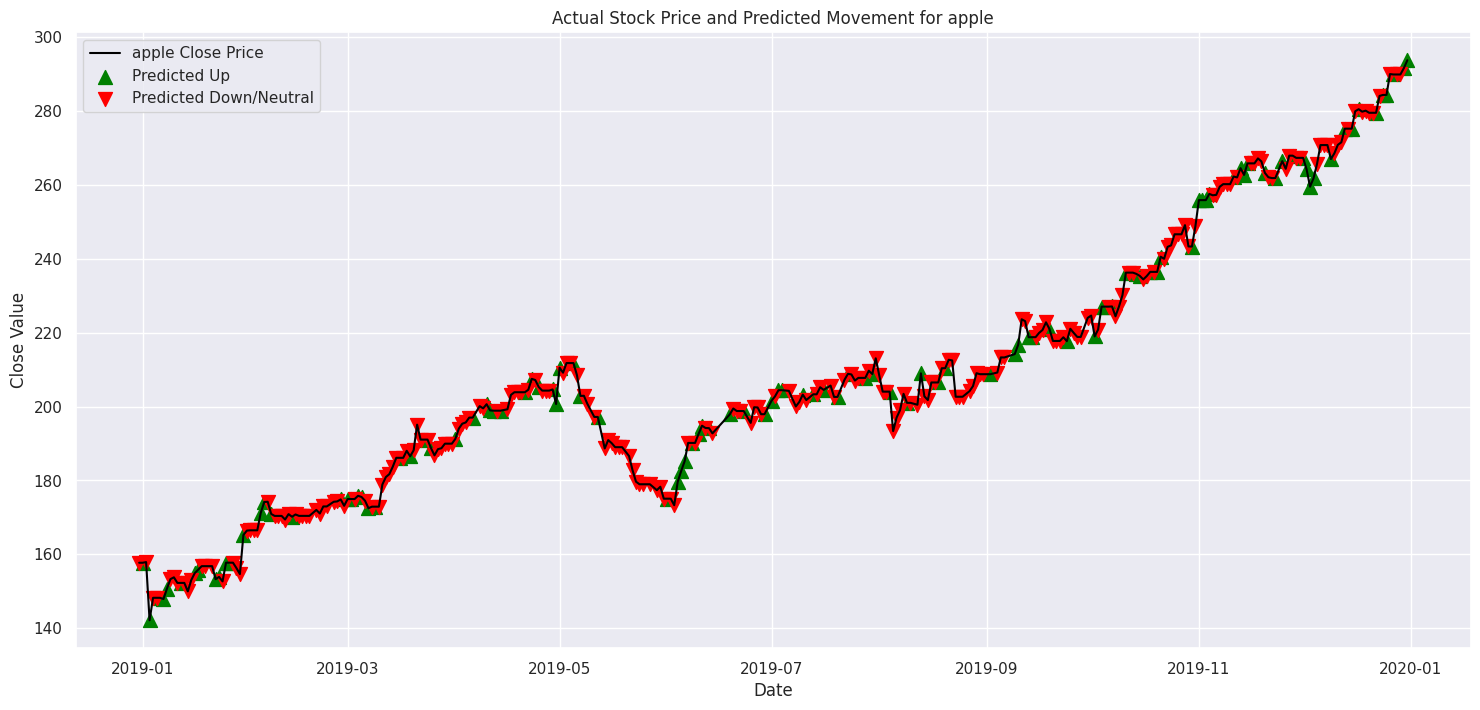

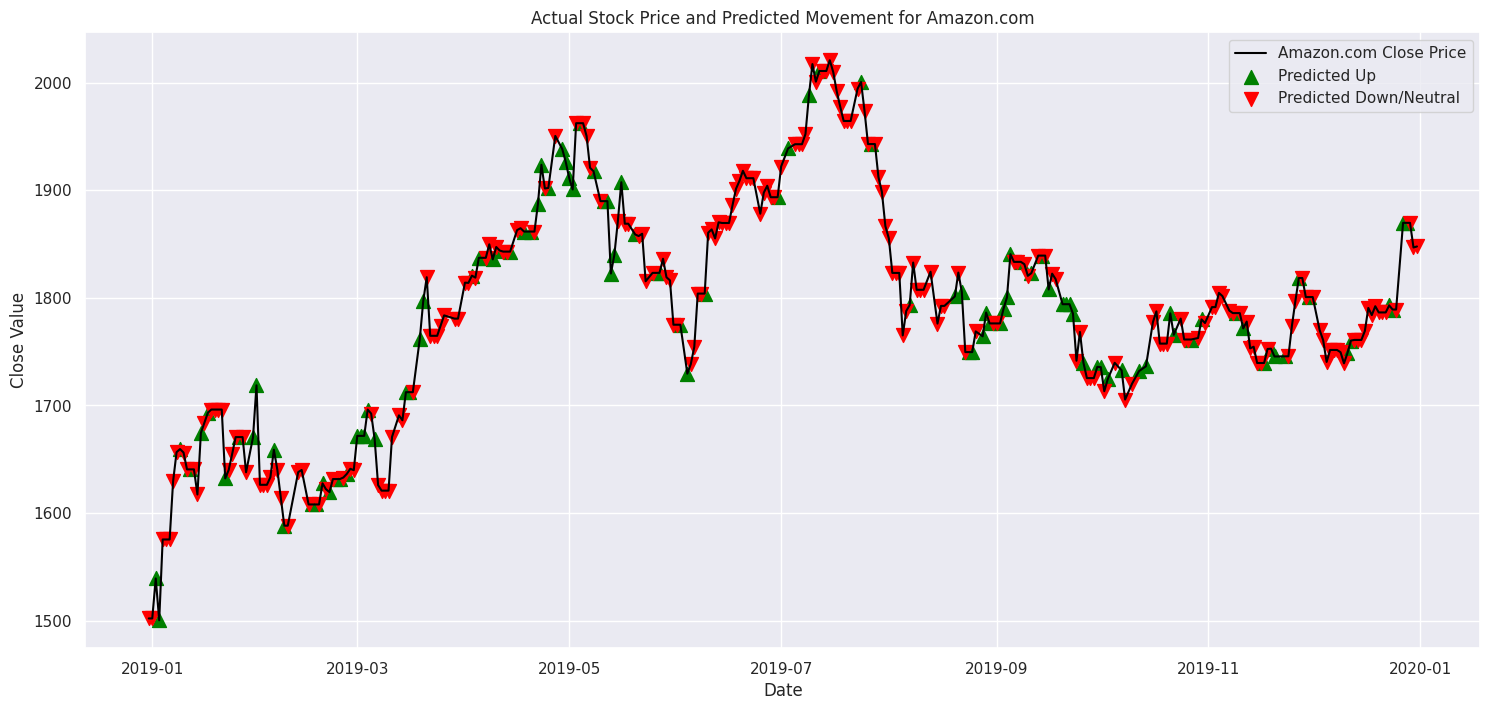

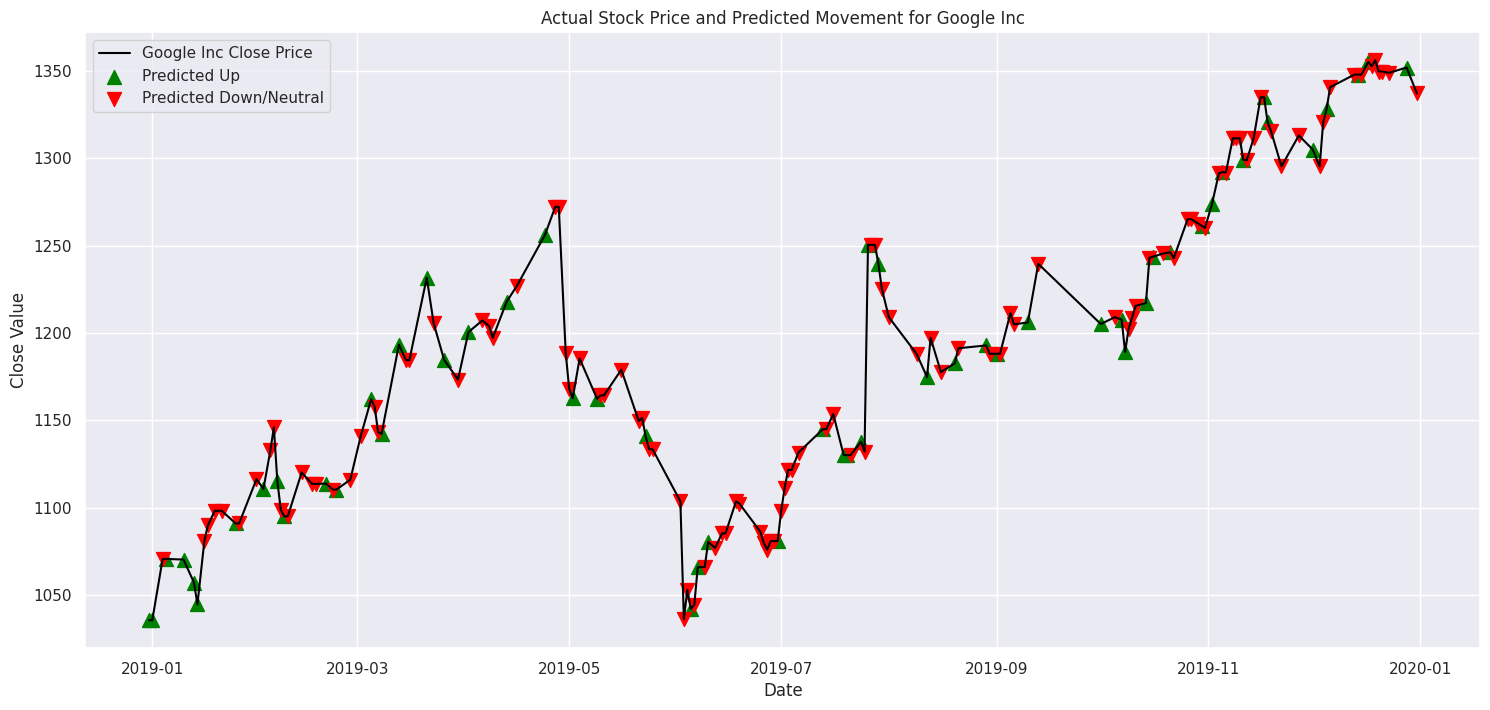

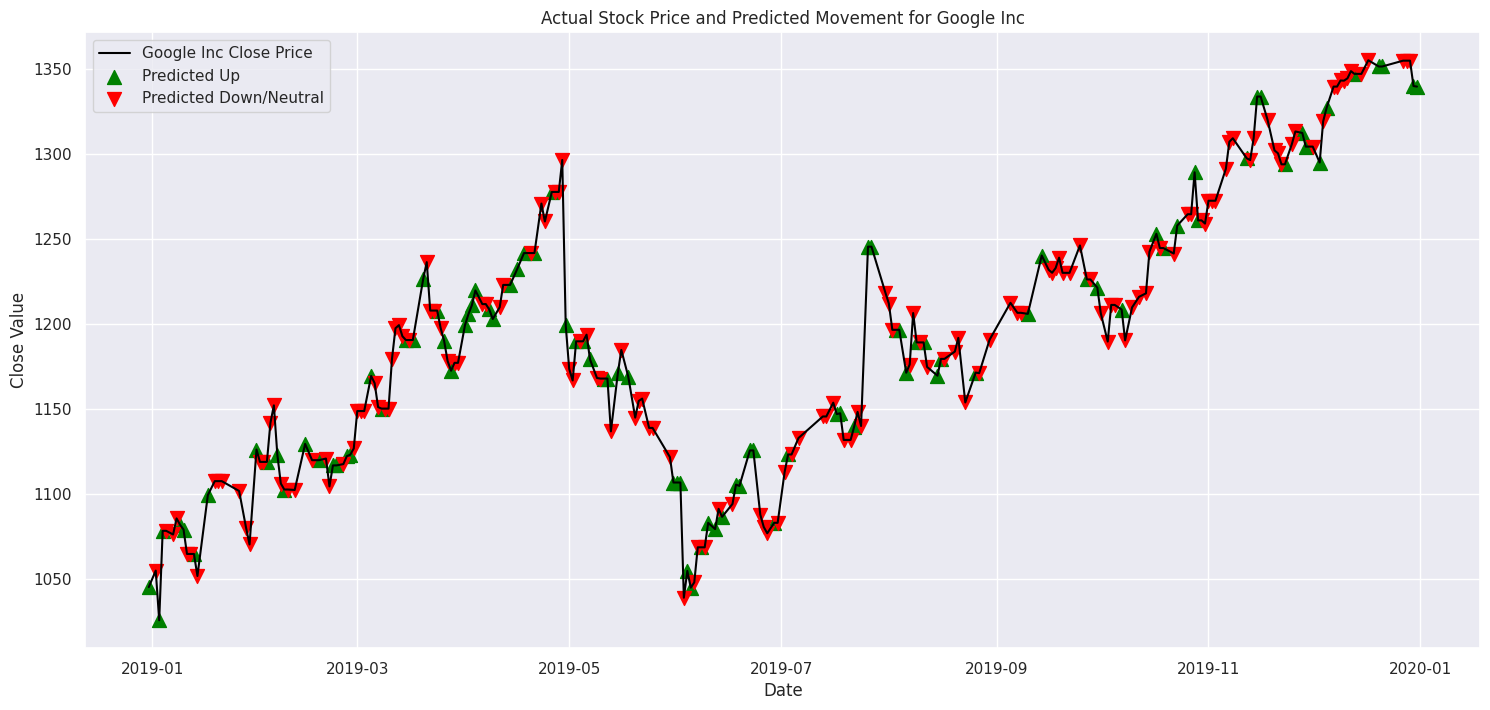

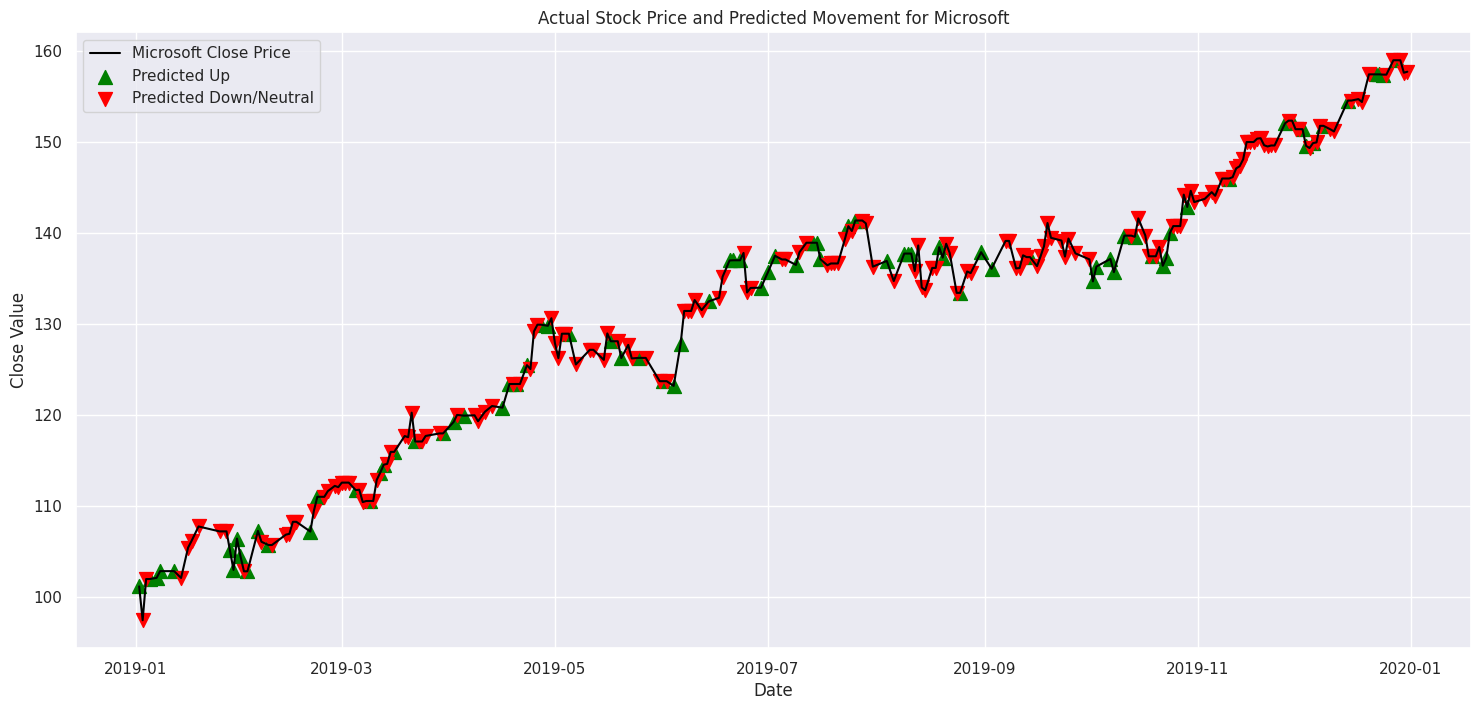

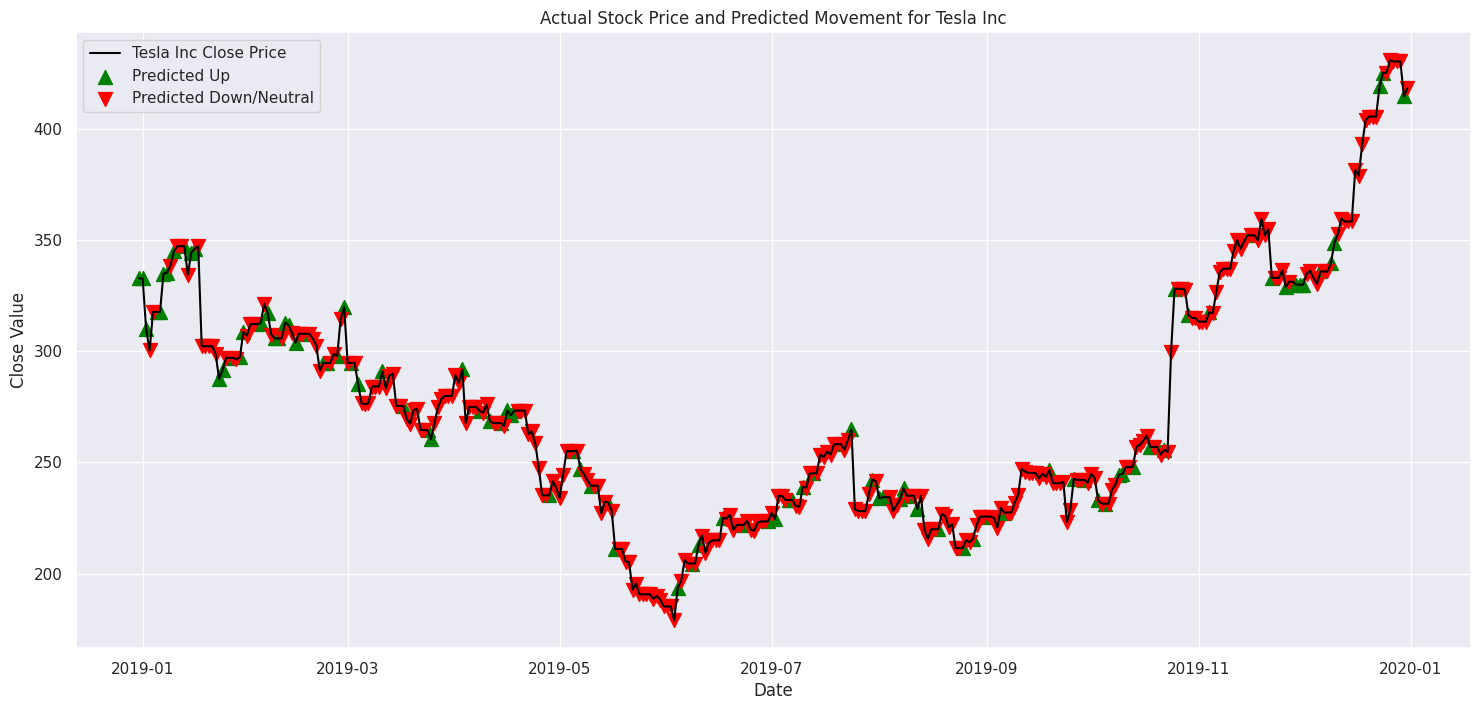

In [ ]:
# Assuming you have stored the predictions and corresponding data from the last split
# You might need to modify your TimeSeriesSplit loop to store these for each split
# or run the prediction on the full merged_df after training a final model.

# For simplicity, let's assume you ran the loop and have the last split's test data and predictions:
# X_test_last_split = X_sorted.iloc[test_index_last_split]
# y_test_last_split = y_sorted.iloc[test_index_last_split]
# y_pred_last_split = model_trained_on_last_split.predict(X_test_scaled_last_split)
# test_dates_last_split = merged_df_sorted.iloc[test_index_last_split]['sentiment_date'] # This is the sentiment date

# To plot against the *prediction* date (which is the stock date),
# you need to recover the prediction_date from the merged_df for the test index
test_prediction_dates = merged_df_sorted.iloc[test_index]['prediction_date']
test_ticker_symbols = merged_df_sorted.iloc[test_index]['ticker_symbol']


# Create a DataFrame to hold the predictions and dates
prediction_results = pd.DataFrame({
    'prediction_date': test_prediction_dates,
    'ticker_symbol': test_ticker_symbols,
    'predicted_movement': y_pred,  # Use y_pred from the last model trained (e.g., XGBoost)
    'actual_movement': y_test # Include actual for comparison if needed
})

# Merge predictions with the original stock data to get close values
plot_df = pd.merge(
    stock_df,
    prediction_results,
    left_on=['day_date', 'ticker_symbol'],
    right_on=['prediction_date', 'ticker_symbol'],
    how='inner'
)

# Drop the redundant prediction_date column
plot_df = plot_df.drop(columns=['prediction_date'])

# Sort by date for plotting
plot_df = plot_df.sort_values(by=['ticker_symbol', 'day_date'])

# Plotting for each ticker symbol
for ticker in plot_df['ticker_symbol'].unique():
    sub_plot_df = plot_df[plot_df['ticker_symbol'] == ticker].copy()
    company_name = company[company["ticker_symbol"] == ticker]["company_name"].iloc[0]

    plt.figure(figsize=(18, 8))
    ax1 = plt.gca() # Get current axes

    # Plot actual stock price
    ax1.plot(sub_plot_df['day_date'], sub_plot_df['close_value'], label=f'{company_name} Close Price', color='black')

    # Plot predicted movements
    # Filter for 'Up' predictions (price_movement == 1)
    up_predictions = sub_plot_df[sub_plot_df['predicted_movement'] == 1]
    if not up_predictions.empty:
        ax1.scatter(up_predictions['day_date'], up_predictions['close_value'], color='green', marker='^', s=100, label='Predicted Up')

    # Filter for 'Down/Neutral' predictions (price_movement == 0)
    down_predictions = sub_plot_df[sub_plot_df['predicted_movement'] == 0]
    if not down_predictions.empty:
         ax1.scatter(down_predictions['day_date'], down_predictions['close_value'], color='red', marker='v', s=100, label='Predicted Down/Neutral')


    ax1.set_title(f'Actual Stock Price and Predicted Movement for {company_name}')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close Value')
    ax1.legend()
    plt.grid(True)
    plt.show()

### Discussion

In general, the prices of shares of the two big companies Microsoft and Tesla are affected by Twitter if they tend to be positive or negative. The remaining 3 stocks of Apple, Amazon and Google have no or very little volatility compared to the news.

This can be seen on the chart as the popularity of the social network Twitter has affected the value of the stock.
If there isn't a lot of engagement or the Twitter page isn't active, Twitter doesn't affect pricing either.

##Conclusion
Twitter has *an* impact on the stock market, but it occurs that if your tweet becomes viral, stock prices will rise or fall​